<a href="https://colab.research.google.com/github/chandan110791/diarization_imp/blob/main/Cluserturing3_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and Config

## Install Packages

In [ ]:
# ===== HARD RESET HF STACK (keep torch/pyannote/numpy as-is) =====
import sys, subprocess, pkgutil

def sh(cmd):
    print(">>>", cmd)
    return subprocess.check_call(cmd, shell=True)

print("Removing HF packages that commonly drift...")
sh("pip -q uninstall -y transformers tokenizers safetensors huggingface_hub accelerate peft optimum bitsandbytes")

print("Installing a mutually compatible pinned HF stack...")
# This set is known to work together:
# transformers 4.42.4 requires huggingface-hub < 1.0
sh("""pip -q install --no-cache-dir --force-reinstall \
  "huggingface_hub==0.23.4" \
  "tokenizers==0.19.1" \
  "safetensors==0.4.3" \
  "accelerate==0.31.0" \
  "transformers==4.42.4"
""")

print("Sanity check: pip check (should be clean)")
sh("pip -q check || true")

# --- Fix torchaudio lib mismatch: reinstall torch+torchaudio as a matched pair ---
!pip -q uninstall -y torchaudio torch torchvision

# Install the matched CUDA 12.1 wheels (T4/V100/L4 on Colab)
!pip -q install --no-cache-dir --force-reinstall \
  torch==2.3.1 torchaudio==2.3.1 torchvision==0.18.1 \
  --index-url https://download.pytorch.org/whl/cu121

# --- Fix: force numpy<2.0 (do NOT touch torch/torchaudio) ---
!pip -q uninstall -y numpy
!pip -q install --no-cache-dir --force-reinstall "numpy==1.26.4"

import numpy as np
print("numpy:", np.__version__)

Removing HF packages that commonly drift...
>>> pip -q uninstall -y transformers tokenizers safetensors huggingface_hub accelerate peft optimum bitsandbytes
Installing a mutually compatible pinned HF stack...
>>> pip -q install --no-cache-dir --force-reinstall   "huggingface_hub==0.23.4"   "tokenizers==0.19.1"   "safetensors==0.4.3"   "accelerate==0.31.0"   "transformers==4.42.4"

Sanity check: pip check (should be clean)
>>> pip -q check || true
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 143.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 118.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 301.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 158.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 189.0 MB

In [ ]:
import os
print("   ...Installing Pyannote & Helpers...")
if os.path.exists("requirements.txt"):
    # We ignore the torch lines in requirements.txt since we just installed it above
    !grep -v "torch" requirements.txt > temp_reqs.txt
    !pip install -r temp_reqs.txt -q
    !rm temp_reqs.txt
else:
    # Fallback if file missing
    !pip install pyannote.audio==3.3.1 pyannote.metrics==3.2.1 pyannote.core==5.0.0 "numpy<2.0" "sympy==1.12" torch-geometric transformers==4.42.4 -q

# C. Verify
import torch
import pyannote.audio
from torch.library import get_ctx  # This should work
print(f"✅ Environment Fixed: Torch {torch.__version__} | Pyannote {pyannote.audio.__version__}")


   ...Installing Pyannote & Helpers...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━

## Libraries

In [ ]:
import os, torch, numpy as np
from pyannote.audio import Pipeline, Model
from pyannote.database import get_protocol, FileFinder
from pyannote.metrics.diarization import DiarizationErrorRate
from pyannote.core import Segment, Timeline, Annotation
import numpy as np
import torch, torch.nn as nn, torch.nn.functional as F
from pyannote.core import Annotation, Segment
from pyannote.audio import Audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
from sklearn.neighbors import NearestNeighbors
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.neighbors import NearestNeighbors
from pyannote.core import Annotation, Segment
from pyannote.audio import Audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
# Use ourr existing HYP_FN (pipe_base or pipe). Assumes already set.
import torch
from pyannote.audio import Model, Inference
import numpy as np
import torch
import torch.nn.functional as F
from pyannote.core import Segment, Timeline, Annotation
from pyannote.audio import Audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
import torch
import torch.nn.functional as F
from pyannote.core import Segment, Timeline, Annotation
from pyannote.audio import Audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
import os, math
import numpy as np
import pandas as pd
import torch

from pyannote.audio import Pipeline, Audio
from pyannote.core import Segment, Timeline, Annotation
from pyannote.metrics.diarization import DiarizationErrorRate

from datasets import load_dataset

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


##  Variable Decleration

In [ ]:
# 3. PULL CODE (From ourr GitHub)
REPO_URL = "https://github.com/chandan110791/diarization_imp.git"
REPO_DIR = "/content/diarization_imp"

In [ ]:

if not os.path.exists(REPO_DIR):
    print("📥 Cloning Public Repository...")
    !git clone $REPO_URL $REPO_DIR
else:
    print("🔄 Pulling Latest Changes...")
    %cd $REPO_DIR
    !git pull

🔄 Pulling Latest Changes...
/content/diarization_imp
Already up to date.


In [ ]:
# 4. INSTALL DEPENDENCIES
# 4. ROBUST DEPENDENCY INSTALL (The "Clean Slate" Fix)
print("🔧 Configuring Environment...")
%cd $REPO_DIR

🔧 Configuring Environment...
/content/diarization_imp


In [ ]:
# DAILY SETUP: Mounts Drive, Unzips Data, Pulls Code, Installs Deps
import shutil
from google.colab import drive, userdata

print("🚀 INITIALIZING DAILY WORKFLOW...")

# 1. MOUNT DRIVE (To access ourr Zipped Data)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')


🚀 INITIALIZING DAILY WORKFLOW...


In [ ]:

# 5. AUTHENTICATE HUGGING FACE (Required for WavLM download)
try:
    from google.colab import userdata
    os.environ["HF_TOKEN"] = userdata.get('hf_token')
    HF_TOKEN = os.environ["HF_TOKEN"]
    print("✅ Hugging Face Token Loaded.")
except:
    print("⚠️ HF_TOKEN not found in Secrets! Please add it in the sidebar.")

print("\n✨ SYSTEM READY. our can now run '!python src/train.py'")

✅ Hugging Face Token Loaded.

✨ SYSTEM READY. You can now run '!python src/train.py'


## Env Setup

In [ ]:
%env PYANNOTE_DATABASE_CONFIG=$(pwd)/database.yml

env: PYANNOTE_DATABASE_CONFIG=$(pwd)/database.yml


In [ ]:
import os
from pathlib import Path
from pyannote.database import registry, get_protocol, FileFinder
import os, numpy as np, pandas as pd, torch
from pyannote.database import registry, FileFinder
from pyannote.audio import Pipeline
from pyannote.metrics.diarization import DiarizationErrorRate

DATABASE_YML = "/content/diarization_imp/database.yml"
os.environ["PYANNOTE_DATABASE_CONFIG"] = str(Path(DATABASE_YML).resolve())

if "audio" not in globals():
    audio = Audio(sample_rate=16000, mono=True)

print("[CHK] exists:", Path(DATABASE_YML).exists(), os.environ["PYANNOTE_DATABASE_CONFIG"])

# Force registry load
registry.load_database(os.environ["PYANNOTE_DATABASE_CONFIG"])
print("[CHK] registry.load_database OK")

# Now directly try to load the protocol (this is the real test)
protocol_name = "AMI.SpeakerDiarization.mini"
protocol = get_protocol(protocol_name, preprocessors={"audio": FileFinder()})

# Smoke test: count files
dev_files = list(protocol.development())
test_files = list(protocol.test())
print("[OK] Loaded:", protocol_name)
print("[OK] dev:", len(dev_files), "test:", len(test_files))
print("[OK] dev uris:", [f["uri"] for f in dev_files])
print("[OK] test uris:", [f["uri"] for f in test_files])


# ============================================================
# DEV tune, then TEST report
# ============================================================
DEV_URIS = ['TS3010a', 'TS3006a', 'IS1007a', 'ES2005a', 'IS1009a']
TEST_URIS = ['ES2006a', 'TS3009a', 'TS3012a', 'IS1003a', 'ES2003a', 'ES2009a']
DEV_FILES  = [f for f in protocol.development() if f["uri"] in set(DEV_URIS)]
TEST_FILES = [f for f in protocol.test()        if f["uri"] in set(TEST_URIS)]
DEBUG_URI = "TS3010a"


[CHK] exists: True /content/diarization_imp/database.yml
'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
[CHK] registry.load_database OK
[OK] Loaded: AMI.SpeakerDiarization.mini
[OK] dev: 5 test: 6
[OK] dev uris: ['TS3010a', 'TS3006a', 'IS1007a', 'ES2005a', 'IS1009a']
[OK] test uris: ['ES2006a', 'TS3009a', 'TS3012a', 'IS1003a', 'ES2003a', 'ES2009a']


## Vox Converse Dataset from Drive

In [ ]:
# =========================================================
# VoxConverse DEV/TEST benchmarking (same DER approach as AMI)
# Expects ourr prepared folder structure:
#   <VOX_ROOT>/
#     dev.jsonl, test.jsonl
#     audio/<uri>.wav
#     rttm/<uri>.rttm
# (created by ourr preparation script: wav_rel/rttm_rel/duration in jsonl)
# =========================================================

import os, json
from pathlib import Path
import pandas as pd

# from pyannote.core import Annotation, Segment, Timeline
# from pyannote.metrics.diarization import DiarizationErrorRate

# ---- Point this to ourr Drive folder ----
VOX_DRIVE_ROOT = "/content/drive/MyDrive/diarization_data/voxconverse_prepared_v_official"
VOX_LOCAL_ROOT = "/content/voxconverse_prepared_v_official"

# Copy only the needed files from Drive -> local (faster reads, less storage). Safe to re-run.
if not Path(VOX_LOCAL_ROOT).exists():
    print("Copying selected VoxConverse prepared data from Drive to local...")
    os.makedirs(VOX_LOCAL_ROOT, exist_ok=True)

    for split, max_files in [('dev', 30), ('test', 10)]:
        manifest_drive = Path(VOX_DRIVE_ROOT) / f"{split}.jsonl"
        if not manifest_drive.exists():
            raise FileNotFoundError(f"Missing manifest on Drive: {manifest_drive}")

        # Copy full manifest temporarily
        manifest_tmp = Path(VOX_LOCAL_ROOT) / f"{split}.jsonl.tmp"
        !cp "{manifest_drive}" "{manifest_tmp}"

        # Read and select first max_files, copy only those audio/rttm
        selected_lines = []
        with open(manifest_tmp, 'r') as f:
            for i, line in enumerate(f):
                if i >= max_files:
                    break
                rec = json.loads(line)
                wav_rel = rec['wav_rel']
                rttm_rel = rec['rttm_rel']

                audio_drive = Path(VOX_DRIVE_ROOT) / wav_rel
                rttm_drive = Path(VOX_DRIVE_ROOT) / rttm_rel

                audio_local_dir = Path(VOX_LOCAL_ROOT) / Path(wav_rel).parent
                rttm_local_dir = Path(VOX_LOCAL_ROOT) / Path(rttm_rel).parent

                os.makedirs(audio_local_dir, exist_ok=True)
                os.makedirs(rttm_local_dir, exist_ok=True)

                audio_local = Path(VOX_LOCAL_ROOT) / wav_rel
                rttm_local = Path(VOX_LOCAL_ROOT) / rttm_rel

                if not audio_drive.exists():
                    print(f"Warning: Audio missing on Drive for {rec['uri']}: {audio_drive}")
                    continue
                if not rttm_drive.exists():
                    print(f"Warning: RTTM missing on Drive for {rec['uri']}: {rttm_drive}")
                    continue

                !cp "{audio_drive}" "{audio_local}"
                !cp "{rttm_drive}" "{rttm_local}"

                selected_lines.append(line)

        # Write limited manifest
        manifest_local = Path(VOX_LOCAL_ROOT) / f"{split}.jsonl"
        with open(manifest_local, 'w') as f:
            f.writelines(selected_lines)

        # Clean up temp
        os.remove(manifest_tmp)

        print(f"Copied {len(selected_lines)} files for {split} split.")

else:
    print("Local VoxConverse folder exists:", VOX_LOCAL_ROOT)

def _timeline_full_duration(duration_sec: float) -> Timeline:
    return Timeline([Segment(0.0, float(duration_sec))]).support()

def load_rttm_as_annotation(rttm_path: str, uri: str) -> Annotation:
    """
    Minimal RTTM reader for SPEAKER lines:
      SPEAKER <file> <chnl> <tbeg> <tdur> <ortho> <stype> <name> <conf> <slat>
    We'll use:
      start = col[3], dur = col[4], speaker = col[7]
    """
    ann = Annotation(uri=uri)
    with open(rttm_path, "r") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):
                continue
            parts = line.split()
            if parts[0].upper() != "SPEAKER":
                continue
            start = float(parts[3])
            dur   = float(parts[4])
            spk   = str(parts[7])
            if dur <= 0:
                continue
            ann[Segment(start, start + dur)] = spk
    return ann

def voxconverse_files(split: str, max_files=None):
    root = Path(VOX_LOCAL_ROOT)
    manifest = root / f"{split}.jsonl"
    assert manifest.exists(), f"Missing manifest: {manifest}"

    files = []
    with open(manifest, "r") as f:
        for i, line in enumerate(f, 1):
            rec = json.loads(line)
            uri = rec["uri"]
            audio_path = root / rec["wav_rel"]
            rttm_path  = root / rec["rttm_rel"]
            dur        = float(rec["duration"])

            if not audio_path.is_file():
                raise FileNotFoundError(f"[{split}] audio missing for {uri}: {audio_path}")
            if not rttm_path.is_file():
                raise FileNotFoundError(f"[{split}] rttm missing for {uri}: {rttm_path}")

            ref = load_rttm_as_annotation(str(rttm_path), uri=uri)
            annotated = _timeline_full_duration(dur)

            files.append({
                "uri": uri,
                "audio": str(audio_path),
                "annotation": ref,
                "annotated": annotated,   # <-- full [0,duration] UEM
                "duration": dur,          # ✅ ADD THIS (StageB/seg vote needs it)
                "database": "VoxConverse",
                "subset": split,
            })

            if max_files is not None and len(files) >= int(max_files):
                break

    print(f"[VoxConverse] loaded split={split}: {len(files)} files")
    return files

Local VoxConverse folder exists: /content/voxconverse_prepared_v_official


In [ ]:
# import torch
# from pyannote.audio import Pipeline, Model, Inference

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Baseline diarization (kept as-is)
# pipe_base = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=True).to(device)

# # Segmentation model used for multi-scale masks
# seg_model = Model.from_pretrained("pyannote/segmentation-3.0", use_auth_token=True).to(device).eval()

# # Short (2s, 0.5s hop) and Long (8s, 1s hop) inference heads
# infer_short = Inference(seg_model, window="sliding", duration=2.0, step=0.5, batch_size=16, device=device)
# infer_long  = Inference(seg_model, window="sliding", duration=8.0, step=1.0, batch_size=8,  device=device)


# Pillar 3: Memory based Clustering E3 of proposal


In [ ]:
import os
import numpy as np
import torch
import torch.nn.functional as F
from pyannote.core import Segment, Timeline, Annotation
from pyannote.audio import Pipeline, Model, Inference, Audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
from collections import defaultdict, Counter
from dataclasses import dataclass
import numpy as np
from pyannote.core import Segment, Timeline, Annotation
from dataclasses import dataclass
import numpy as np
from pyannote.core import Segment, Timeline, Annotation
import numpy as np
from collections import Counter
from pyannote.core import Segment, Timeline, Annotation
from dataclasses import dataclass
from typing import Tuple
import numpy as np
from collections import Counter
from pyannote.core import Segment, Timeline
from dataclasses import dataclass
import numpy as np
from pyannote.core import Segment, Timeline, Annotation
from dataclasses import dataclass, field
import os
import re
import numpy as np
import torch
import torch.nn.functional as F
from dataclasses import dataclass, field
from pyannote.core import Segment, Timeline, Annotation

# # Optional cache (per file uri) to speed repeated runs
_BANK_CACHE = {}

# # ============================================================
# # CONFIG (defaults copied from ourr Stage0_1 cell)
# # ============================================================
HF_TOKEN = os.environ.get("HF_TOKEN", None)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
AUDIO  = Audio(sample_rate=16000, mono=True)

# # Frame resolution (seconds per frame)
RES = 0.02

# # Stage1 (PyVAD guardrail)
VAD_PAD       = 0.25
VAD_MERGE_GAP = 0.10
VAD_MIN_ON    = 0.20

# # Stage0 defaults (promote-only overlap recovery)
TOPK_SECONDS_DEFAULT = 10.0
VOTE_THR_DEFAULT     = 0.18
SIM2_THR_DEFAULT     = 0.28
M23_THR_DEFAULT      = 0.06

MIN_OV_DUR   = 0.12
MERGE_GAP    = 0.06
SHIFT_FRAC   = 0.10
RESTRICT_NEAR_SEC = 0.25
SMOOTH_SEC   = 0.30

# # Anchors / centroids
MIN_ANCHOR_DUR   = 1.0
BANK_MAX_PER_LAB = 12
EMBED_WIN_SEC    = 1.5

# # Label filters
MIN_ANCHOR_KEEP_SEC = 2.5  # tune 3..10
DROP_DIGIT_LABELS   = True

# # SEG3 vote
SEG3_MODEL_ID = "pyannote/segmentation-3.0"
SEG3_WIN_DUR  = 10.0
SEG3_STEP     = 0.10
SEG3_BATCH    = 32
SEG3_ACTIVITY_THR = 0.35

BASELINE_DIAR_MODEL_ID = "pyannote/speaker-diarization-3.1"
VAD_MODEL_ID = "pyannote/voice-activity-detection"
EMBED_MODEL_ID = "pyannote/embedding"
OSD_MODEL_ID  = "pyannote/overlapped-speech-detection"

# # EMBED_MODEL_ID = "pyannote/wespeaker-voxceleb-resnet34-LM"

# # ============================================================
# # LOAD ONCE (lazy init)
# # ============================================================
PIPE_BASE = None
VAD_PIPE = None
EMBEDDER = None
_SEG3_INFER = None

_VAD_CACHE  = {}
_SEG3_CACHE = {}
_BASE_CACHE = {}


##New Functions

In [ ]:
# ============================================================
# UTILS (DEDUPED + VOX-SAFE)
# Single canonical version of shared helpers used by StageA/B/C/D
# ============================================================

import os
import re
import numpy as np
import torch
import torch.nn.functional as F
from dataclasses import dataclass, field
from pyannote.core import Segment, Timeline, Annotation

import gc
import torch
import numpy as np

# ------------------------------------------------------------
# Deep cache clear (not just notebook globals)
# ------------------------------------------------------------
def clear_all_caches_deep(reset_models: bool = False, verbose: bool = True):
    """
    Clears caches in:
      1) notebook globals()
      2) stage function globals (STAGEA/STAGEB/STAGE3/STAGED if present)
    Optionally resets heavy models (PIPE_BASE/VAD_PIPE/EMBEDDER).
    """

    # 1) clear caches in this notebook globals
    cleared = []
    for k, v in list(globals().items()):
        if isinstance(v, dict) and ("CACHE" in k or k.endswith("_CACHE")):
            v.clear()
            cleared.append(k)

    # 2) clear caches living inside stage function globals (module-level)
    stage_fns = []
    for name in [
        "STAGEA_PYVAD",
        "STAGEB_OVERLAP_ONLY",
        "STAGE3_MEMORYBANK_KNN_REFINEMENT",
        "run_stageD",
    ]:
        fn = globals().get(name, None)
        if callable(fn):
            stage_fns.append(fn)

    for fn in stage_fns:
        g = getattr(fn, "__globals__", {})
        for k, v in list(g.items()):
            if isinstance(v, dict) and ("CACHE" in k or k.endswith("_CACHE")):
                v.clear()
                cleared.append(f"{fn.__name__}::{k}")

    # 3) optional: reset heavy models so init_models() rebuilds them
    if reset_models:
        for name in ["PIPE_BASE", "VAD_PIPE", "EMBEDDER", "_SEG3_INFER"]:
            if name in globals():
                globals()[name] = None
                cleared.append(f"RESET::{name}")

    # torch cleanup
    try:
        torch.cuda.empty_cache()
    except Exception:
        pass

    gc.collect()

    if verbose:
        uniq = sorted(set(cleared))
        print(f"[OK] cleared {len(uniq)} caches/objects")
        for x in uniq[:30]:
            print("  -", x)
        if len(uniq) > 30:
            print(f"  ... +{len(uniq)-30} more")

# ----------------------------
# Global caches (safe init)
# ----------------------------
for _name in ["_VAD_CACHE","_SEG3_CACHE","_BASE_CACHE","_EMB_CACHE","_BANK_CACHE"]:
    if _name not in globals():
        globals()[_name] = {}

def clear_all_caches():
    for name in ["_VAD_CACHE","_SEG3_CACHE","_BASE_CACHE","_EMB_CACHE","_BANK_CACHE"]:
        if name in globals() and hasattr(globals()[name], "clear"):
            globals()[name].clear()
            print("[OK] cleared", name)

def _label_present_nearby(hyp: Annotation, label: str, center: float, radius_sec: float) -> bool:
    """Continuity gate: label must exist within +/- radius_sec around center in hyp."""
    win = Segment(max(0.0, float(center) - float(radius_sec)), float(center) + float(radius_sec))
    for seg, trk, lab in hyp.itertracks(yield_label=True):
        if str(lab) != str(label):
            continue
        inter = seg & win
        if inter and inter.duration > 0:
            return True
    return False

def _stable_best_nonbase(
    sims_per_subwin: list,
    labels_candidates: list,
    base_label,
    repeat_k: int,
    margin: float,
):
    """
    sims_per_subwin: list of dict[label->sim] for each subwindow.
    Return best label if it repeats repeat_k times AND has margin over 2nd best.
    """
    if not sims_per_subwin:
        return None, 0.0, 0.0

    winners = []
    margins = []
    scores = []

    for sd in sims_per_subwin:
        # remove base label
        items = [(lab, float(sd.get(lab, -1e9))) for lab in labels_candidates if lab != base_label]
        items.sort(key=lambda x: x[1], reverse=True)
        if not items:
            continue
        top1_lab, top1 = items[0]
        top2 = items[1][1] if len(items) > 1 else -1e9
        winners.append(top1_lab)
        margins.append(float(top1 - top2))
        scores.append(float(top1))

    if not winners:
        return None, 0.0, 0.0

    # most frequent winner
    uniq, counts = np.unique(np.asarray(winners, dtype=object), return_counts=True)
    best_idx = int(np.argmax(counts))
    best_lab = uniq[best_idx]
    best_count = int(counts[best_idx])

    # gating: repeats + margin
    if best_count < int(repeat_k):
        return None, best_count, float(np.median(margins)) if margins else 0.0
    med_margin = float(np.median(margins)) if margins else 0.0
    if med_margin < float(margin):
        return None, best_count, med_margin

    # return score proxy as median top1 for that label
    lab_scores = [scores[i] for i in range(len(winners)) if winners[i] == best_lab]
    return best_lab, best_count, float(np.median(lab_scores)) if lab_scores else 0.0

def _segments_from_mask(mask: np.ndarray, uem_seg: Segment, res: float, min_dur: float = 0.0):
    """Uses ourr local helper if present; otherwise fallback."""
    if "_mask_to_segments_local" in globals():
        return _mask_to_segments_local(mask, uem_seg, res, min_dur=min_dur)
    # fallback
    mask = np.asarray(mask).astype(bool)
    T = mask.size
    u0 = float(uem_seg.start)
    out = []
    i = 0
    while i < T:
        if not mask[i]:
            i += 1
            continue
        j = i + 1
        while j < T and mask[j]:
            j += 1
        st = u0 + i * float(res)
        en = u0 + j * float(res)
        if (en - st) >= float(min_dur):
            out.append(Segment(st, en))
        i = j
    return out

def _merge_close_segments_local(segs, gap: float):
    if "_merge_close_local" in globals():
        return _merge_close_local(segs, gap=gap)
    if not segs:
        return []
    segs = sorted(segs, key=lambda s: (float(s.start), float(s.end)))
    out = [segs[0]]
    for s in segs[1:]:
        last = out[-1]
        if float(s.start) - float(last.end) <= float(gap):
            out[-1] = Segment(float(last.start), max(float(last.end), float(s.end)))
        else:
            out.append(s)
    return out

def _timeline_support_segments(hyp: Annotation):
    """Exact (non-quantized) support segments of hyp (union over all speakers)."""
    tl = hyp.get_timeline().support()
    return sorted(list(tl), key=lambda s: (float(s.start), float(s.end)))

import numpy as np
from pyannote.core import Segment
from pyannote.audio import Inference

# Cache to avoid recompute
_STAGEB_SEG_VOTE_CACHE = {}
import numpy as np
from pyannote.core import Timeline, Annotation, Segment

def _timeline_to_frame_vote(tl: Timeline, uem_seg: Segment, res: float, T: int):
    """Convert a Timeline into a float32 frame vote array (1.0 inside TL, else 0.0)."""
    vote = np.zeros((T,), dtype=np.float32)
    if tl is None:
        return vote
    for s in tl:
        a = int(np.floor((float(s.start) - float(uem_seg.start)) / res))
        b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / res))
        a = max(0, min(T, a))
        b = max(0, min(T, b))
        if b > a:
            vote[a:b] = 1.0
    return vote

def _compute_overlap_vote_from_segmentation(
    file,
    uem_seg: Segment,
    res: float,
    seg_thr: float = 0.5,
    count_thr: int = 2,
    dilate_sec: float = 0.10,
):
    """
    Robust overlap vote:
      1) Try segmentation-based multi-speaker overlap vote IF it truly exposes multi-speaker channels
      2) Otherwise fall back to OSD pipeline: pyannote/overlapped-speech-detection
    """
    # frame count on our RES grid
    T = int(np.ceil((float(uem_seg.end) - float(uem_seg.start)) / float(res)))
    if T <= 0:
        return np.zeros((0,), dtype=np.float32)

    # ------------------------------
    # (A) Try segmentation-based overlap (often unavailable / unreliable)
    # ------------------------------
    if "SEG3_MODEL" in globals() and SEG3_MODEL is not None:
        try:
            from pyannote.audio import Inference

            # NOTE: segmentation model output dims vary by task; this may NOT be multi-speaker.
            infer = Inference(SEG3_MODEL, device=globals().get("DEVICE", None))
            swf = infer(file)  # SlidingWindowFeature

            data = getattr(swf, "data", None)
            if data is not None and data.ndim == 2:
                # data: (frames, channels)
                n_ch = int(data.shape[1])

                # Only meaningful if channels >= 2 (multi-speaker activations)
                if n_ch >= 2:
                    # count active speakers per seg-frame
                    active_cnt = (data >= float(seg_thr)).sum(axis=1)
                    is_ov = (active_cnt >= int(count_thr)).astype(np.float32)

                    # map seg-frame grid -> RES grid by timestamping each seg-frame
                    # (simple conservative rasterization)
                    tl = Timeline()
                    sw = swf.sliding_window
                    for i in range(len(is_ov)):
                        if is_ov[i] > 0:
                            # segment covering this frame
                            seg_i = sw[i]
                            tl.add(seg_i)

                    tl = tl.support()

                    # dilate
                    if dilate_sec and dilate_sec > 0:
                        pad = float(dilate_sec)
                        tl = Timeline([Segment(s.start - pad, s.end + pad) for s in tl]).support()

                    vote_seg = _timeline_to_frame_vote(tl, uem_seg, res, T)
                    if float(np.max(vote_seg)) > 1e-6:
                        return vote_seg
        except Exception:
            pass  # fall through to OSD

    # ------------------------------
    # (B) Fallback: TRUE overlap detector (OSD)
    # ------------------------------
    if "OSD_PIPE" in globals() and OSD_PIPE is not None:
        try:
            osd_out = OSD_PIPE(file)

            # osd_out can be Timeline or Annotation depending on version
            if isinstance(osd_out, Annotation):
                tl = osd_out.get_timeline().support()
            elif isinstance(osd_out, Timeline):
                tl = osd_out.support()
            else:
                tl = Timeline()

            # crop to UEM
            tl = tl.crop(uem_seg)

            # dilate
            if dilate_sec and dilate_sec > 0:
                pad = float(dilate_sec)
                tl = Timeline([Segment(s.start - pad, s.end + pad) for s in tl]).support()

            return _timeline_to_frame_vote(tl, uem_seg, res, T)

        except Exception:
            pass

    # nothing worked
    return np.zeros((T,), dtype=np.float32)


def _add_segments_intersect_support(out: Annotation, segs_to_add, support_segs, track_id, label):
    """Add segs_to_add but clipped to support_segs (guarantees no union expansion)."""
    for s in segs_to_add:
        # clip s by each support segment (support_segs usually small)
        for sup in support_segs:
            inter = s & sup
            if inter and inter.duration > 0:
                out[inter, track_id] = label


def _viterbi_decode(log_emit: np.ndarray, *, switch_penalty: float):
    """
    Viterbi over states with constant penalty for switching states.
    log_emit: [N, S] log-prob emissions
    return: best_state_idx [N]
    """
    N, S = log_emit.shape
    dp = np.full((N, S), -1e18, dtype=np.float32)
    bp = np.zeros((N, S), dtype=np.int32)

    dp[0] = log_emit[0]
    for t in range(1, N):
        prev = dp[t - 1]  # [S]
        best_prev = int(np.argmax(prev))
        best_prev_val = float(prev[best_prev])

        for s in range(S):
            stay = float(prev[s])
            switch = float(best_prev_val - float(switch_penalty)) if best_prev != s else best_prev_val
            if switch > stay:
                dp[t, s] = float(log_emit[t, s] + switch)
                bp[t, s] = best_prev
            else:
                dp[t, s] = float(log_emit[t, s] + stay)
                bp[t, s] = s

    last = int(np.argmax(dp[N - 1]))
    path = [last]
    for t in range(N - 1, 0, -1):
        last = int(bp[t, last])
        path.append(last)
    path.reverse()
    return np.array(path, dtype=np.int32)


def _rms_db_per_res_frame(file, seg: Segment, res: float):
    """
    Compute RMS(dB) per RES-sized frame for audio inside seg.
    Requires global AUDIO from pyannote.audio.
    """
    crop_out = AUDIO.crop(file, seg)
    wav, sr = crop_out[0], int(crop_out[1])

    # wav can be torch or np
    try:
        import torch
        if torch.is_tensor(wav):
            w = wav.detach().cpu().float()
            if w.dim() == 3:
                w = w.mean(dim=0).squeeze(0)  # (T,)
            elif w.dim() == 2:
                w = w.mean(dim=0)             # (T,)
            else:
                w = w.reshape(-1)
            w = w.numpy()
        else:
            w = np.asarray(wav, dtype=np.float32).reshape(-1)
    except Exception:
        w = np.asarray(wav, dtype=np.float32).reshape(-1)

    spf = max(1, int(round(float(res) * float(sr))))
    nF = int(np.ceil(len(w) / spf))
    if nF <= 0:
        return np.zeros((0,), dtype=np.float32)

    out = np.empty((nF,), dtype=np.float32)
    eps = 1e-9
    for i in range(nF):
        a = i * spf
        b = min(len(w), (i + 1) * spf)
        if b <= a:
            out[i] = -120.0
            continue
        x = w[a:b]
        rms = float(np.sqrt(np.mean(x * x) + eps))
        out[i] = 20.0 * np.log10(rms + eps)
    return out

def _apply_add_gate(file, uem_seg, a, b, frames_mask, res, *,
                    pad_sec=0.10, min_ratio=0.30, min_rms_db=-45.0):
    """
    Gate additions by audio energy:
      - compute RMS(dB) per RES frame over [a,b)
      - require >= min_ratio of frames in frames_mask to be >= min_rms_db
    """
    if frames_mask is None or not np.any(frames_mask):
        return frames_mask

    # segment corresponding to [a,b)
    st = float(uem_seg.start) + float(a) * float(res)
    en = float(uem_seg.start) + float(b) * float(res)
    seg = Segment(max(0.0, st - float(pad_sec)), en + float(pad_sec))

    rms_db = _rms_db_per_res_frame(file, seg, res=float(res))

    # map rms_db back to [a,b): seg includes pad; align by offset
    # simplest: recompute without pad for indexing stability
    seg0 = Segment(st, en)
    rms_db0 = _rms_db_per_res_frame(file, seg0, res=float(res))
    if rms_db0.size == 0:
        return frames_mask * False

    m = frames_mask.astype(bool)
    n = min(int(rms_db0.size), int(m.size))
    if n <= 0:
        return frames_mask * False

    good = (rms_db0[:n] >= float(min_rms_db)) & m[:n]
    ratio = float(np.sum(good)) / float(max(1, np.sum(m[:n])))

    if ratio < float(min_ratio):
        # reject the whole addition (conservative)
        return m * False
    return m

import numpy as np

def _softmax_stable(x: np.ndarray, alpha: float = 1.0):
    x = np.asarray(x, dtype=np.float32) * float(alpha)
    x = x - np.max(x)
    ex = np.exp(x)
    s = float(np.sum(ex)) + 1e-12
    return ex / s


def _multi_view_fuse_probs(
    file,
    center_t: float,
    cand_labels: list,
    protos: dict,
    *,
    win_list=(0.8, 1.0, 1.2),
    shifts=(0.0, 0.10),
    use_znorm=True,
    znorm_topM=10,
    znorm_min_cohort=6,
    znorm_eps=1e-6,
    softmax_alpha=3.0,
):
    """
    Multi-view scoring + geometric-mean fusion (Vox-safe):
      - for each view (win, shift), score embedding against prototypes
      - optional within-recording Z-norm (cheap S-norm-like)
      - per-view -> probabilities via softmax(alpha * score)
      - fuse probabilities via geometric mean (log-mean)
      - HARD SAFETY: any view that fails (bounds/etc.) is skipped

    Returns:
      fused_probs: dict[label] -> fused probability
      per_view: list of tuples (best_lab, best_score, second_score, margin)
              (ONLY for valid views)
    """

    # ---- validate candidates that exist in protos
    cand_labels = [lab for lab in cand_labels if lab in protos and len(protos[lab]) > 0]
    if len(cand_labels) == 0:
        return {}, []

    # ---- flatten prototypes for cohort scoring
    # proto_vecs: [P, D], proto_owner: [P] label indices
    proto_vecs = []
    proto_owner = []
    for lab in cand_labels:
        for p in protos[lab]:
            proto_vecs.append(np.asarray(p, dtype=np.float32))
            proto_owner.append(lab)

    proto_vecs = np.stack(proto_vecs, axis=0) if len(proto_vecs) else None
    proto_owner = np.asarray(proto_owner, dtype=object)

    if proto_vecs is None or proto_vecs.shape[0] == 0:
        return {}, []

    # L2 normalize prototypes (safe)
    proto_vecs = proto_vecs / (np.linalg.norm(proto_vecs, axis=1, keepdims=True) + 1e-9)

    # ---- store log-probs for fusion
    logP_accum = []
    per_view = []

    # ---- iterate views
    for win_sec in win_list:
        win_sec = float(win_sec)
        for sh in shifts:
            t = float(center_t) + float(sh)

            # build embedding window segment
            half = 0.5 * win_sec
            seg = Segment(t - half, t + half)

            # IMPORTANT: rely on ourr boundary-safe embed_segment_3d wrapper
            try:
                e = embed_segment_3d(file, seg, win_sec=win_sec)
            except Exception:
                continue

            if e is None:
                continue

            e = np.asarray(e, dtype=np.float32).reshape(-1)
            e = e / (np.linalg.norm(e) + 1e-9)

            # ---- similarity to all prototypes (cosine = dot for l2n)
            sims_all = proto_vecs @ e  # [P]

            # ---- speaker score = max prototype similarity per speaker
            S = np.zeros((len(cand_labels),), dtype=np.float32)
            for i, lab in enumerate(cand_labels):
                mask = (proto_owner == lab)
                if not np.any(mask):
                    S[i] = -1e9
                else:
                    S[i] = float(np.max(sims_all[mask]))

            # ---- optional Z-norm per recording (cohort = other speakers in this file)
            if bool(use_znorm):
                Z = np.zeros_like(S)
                for i, lab in enumerate(cand_labels):
                    cohort = sims_all[(proto_owner != lab)]
                    if cohort.shape[0] < int(znorm_min_cohort):
                        # not enough cohort -> fallback to raw
                        Z[i] = S[i]
                        continue

                    M = min(int(znorm_topM), int(cohort.shape[0]))
                    # topM cohort sims
                    top = np.partition(cohort, -M)[-M:]
                    mu = float(np.mean(top))
                    sd = float(np.std(top))
                    Z[i] = (float(S[i]) - mu) / (sd + float(znorm_eps))

                scores = Z
            else:
                scores = S

            # ---- per-view decision stats
            order = np.argsort(-scores)
            i1 = int(order[0])
            i2 = int(order[1]) if len(order) > 1 else i1

            best_lab = cand_labels[i1]
            bestS = float(scores[i1])
            secS  = float(scores[i2])
            marS  = float(bestS - secS)

            per_view.append((best_lab, bestS, secS, marS))

            # ---- convert to probabilities for fusion (positive)
            p = _softmax_stable(scores, alpha=float(softmax_alpha))
            logP_accum.append(np.log(p + 1e-12))

    # ---- if all views failed, return empty
    if len(logP_accum) == 0:
        return {}, []

    # ---- geometric mean fusion over views: exp(mean(log p))
    logP_accum = np.stack(logP_accum, axis=0)  # [V, K]
    logp = np.mean(logP_accum, axis=0)         # [K]
    fused = np.exp(logp)
    fused = fused / (np.sum(fused) + 1e-12)

    fused_probs = {lab: float(fused[i]) for i, lab in enumerate(cand_labels)}
    return fused_probs, per_view


def _gap_fill_mask(mask: np.ndarray, max_gap_frames: int):
    """Fill short 0-gaps inside 1-runs."""
    m = mask.astype(np.uint8).copy()
    T = m.size
    if T == 0 or max_gap_frames <= 0:
        return mask.astype(bool)
    i = 0
    while i < T:
        if m[i] == 1:
            j = i
            while j < T and m[j] == 1:
                j += 1
            k = j
            while k < T and m[k] == 0:
                k += 1
            gap = k - j
            if gap > 0 and gap <= max_gap_frames and k < T and m[k] == 1:
                m[j:k] = 1
            i = k
        else:
            i += 1
    return m.astype(bool)

def _score_with_prototypes(e: np.ndarray, protos: dict):
    out = {}
    e = _l2n(e)
    for lab, plist in protos.items():
        if not plist:
            continue
        out[lab] = max(float(np.dot(p, e)) for p in plist)
    return out

def _znorm_scores_all_labels(
    e: np.ndarray,
    raw_scores: dict,
    protos: dict,
    *,
    topM: int = 10,
    min_cohort: int = 6,
    eps: float = 1e-6,
):
    """
    Z-norm per label using cohort = prototypes from OTHER labels.
    mu/std computed via arithmetic mean/std on top-M cohort similarities.
    If cohort too small -> fall back to raw for that label.
    """
    # precompute per-label prototype sims for speed
    sims_by_lab = {}
    for lab, plist in protos.items():
        if not plist:
            continue
        sims_by_lab[lab] = [float(_cos_sim(p, e)) for p in plist]

    out = {}
    for lab, raw in raw_scores.items():
        cohort = []
        for other_lab, sims in sims_by_lab.items():
            if other_lab == lab:
                continue
            cohort.extend(sims)

        if len(cohort) < int(min_cohort):
            out[lab] = float(raw)
            continue

        cohort.sort(reverse=True)
        top = cohort[: max(1, min(int(topM), len(cohort)))]
        mu = float(np.mean(top))
        sd = float(np.std(top))
        out[lab] = float((float(raw) - mu) / (sd + float(eps)))

    return out


def _kmedoids_indices(X, K, n_swap=1):
    C = X @ X.T
    D = 1.0 - C
    n = X.shape[0]
    K = min(int(K), n)
    if K <= 1:
        return [int(np.argmin(D.sum(axis=1)))]

    m = [int(np.argmin(D.sum(axis=1)))]
    for _ in range(1, K):
        dist_to_m = np.min(D[:, m], axis=1)
        m.append(int(np.argmax(dist_to_m)))

    def cost(meds):
        return float(np.sum(np.min(D[:, meds], axis=1)))

    best = m[:]
    best_cost = cost(best)
    for _ in range(int(n_swap)):
        improved = False
        for mi in range(len(best)):
            for cand in range(n):
                if cand in best:
                    continue
                trial = best[:]
                trial[mi] = cand
                c = cost(trial)
                if c + 1e-8 < best_cost:
                    best, best_cost = trial, c
                    improved = True
        if not improved:
            break
    return best


def _l2n(x):
    x = np.asarray(x, dtype=np.float32)
    return x / (float(np.linalg.norm(x)) + 1e-9)

def _build_kmedoids_prototypes(
    file,
    anchors_by_lab,
    *,
    max_anchors_per_spk=120,
    K_min=2,
    K_max=4,
    win_sec=1.2,
    pam_swaps=1,
):
    protos = {}
    for lab, segs in anchors_by_lab.items():
        if not segs:
            continue
        segs = segs[:int(max_anchors_per_spk)]
        X = []
        for s in segs:
            X.append(_l2n(embed_segment_3d(file, s, win_sec=float(win_sec))))
        if not X:
            continue
        X = np.stack(X, axis=0)
        n = X.shape[0]
        if n == 1:
            protos[lab] = [X[0]]
            continue
        K = min(int(K_max), max(int(K_min), 2 if n >= 6 else 1))
        meds = _kmedoids_indices(X, K=K, n_swap=int(pam_swaps))
        protos[lab] = [X[i] for i in meds]
    return protos

def _select_precision_local_anchors(
    hyp: Annotation,
    uem_seg: Segment,
    labels: list,
    res: float,
    speech_mask: np.ndarray,
    vote: np.ndarray,
    osd_mask: np.ndarray,
    *,
    center: float,
    radius_sec: float,
    min_dur: float,
    anchor_ov_vote_max: float = 0.15,
    stable_ctx_sec: float = 1.5,
):
    """
    High-precision anchors:
      - within speech_mask
      - single-speaker in hyp
      - low overlap evidence (vote small, no osd)
      - stable label in +/- stable_ctx_sec
    """
    M = frame_matrix_from_annotation_local(hyp, uem_seg, labels, res)
    T, K = M.shape
    speech_mask = _align_1d(speech_mask, T, fill=False, dtype=bool)
    vote        = _align_1d(vote,        T, fill=0.0,  dtype=np.float32)
    osd_mask    = _align_1d(osd_mask,    T, fill=False, dtype=bool)

    if speech_mask is None:
        speech_mask = np.ones((T,), dtype=bool)
    if vote is None:
        vote = np.zeros((T,), dtype=np.float32)
    if osd_mask is None:
        osd_mask = np.zeros((T,), dtype=bool)


    act = (M.sum(axis=1) >= 1.0)
    single = (M.sum(axis=1) == 1.0)
    ok = act & single & speech_mask & (vote <= float(anchor_ov_vote_max)) & (~osd_mask)

    # restrict to local window frames
    u0 = float(uem_seg.start)
    a0 = int(np.floor((float(center) - float(radius_sec) - u0) / float(res)))
    b0 = int(np.ceil ((float(center) + float(radius_sec) - u0) / float(res)))
    a0 = max(0, min(T, a0))
    b0 = max(0, min(T, b0))
    win_mask = np.zeros(T, dtype=bool)
    win_mask[a0:b0] = True
    ok &= win_mask

    # stability check
    ctx = int(round(float(stable_ctx_sec) / float(res)))
    primary = np.argmax(M, axis=1)
    stable = np.zeros(T, dtype=bool)
    for t in range(a0, b0):
        if not ok[t]:
            continue
        lo = max(0, t - ctx)
        hi = min(T, t + ctx + 1)
        ctx_ok = ok[lo:hi]
        if np.sum(ctx_ok) < 3:
            continue
        agree = (primary[lo:hi] == primary[t]) & ctx_ok
        if (np.sum(agree) / max(1, np.sum(ctx_ok))) >= 0.8:
            stable[t] = True
    ok &= stable

    anchors_by_lab = {}
    for j, lab in enumerate(labels):
        mj = ok & (M[:, j] >= 0.5)
        segs = _mask_to_segments_local(mj, uem_seg, res, min_dur=float(min_dur))
        if segs:
            anchors_by_lab[lab] = segs
    return anchors_by_lab

def _call_filtered(fn, file, **kwargs):
    """
    Call fn(file, **kwargs) but only keep kwargs that the function accepts.
    Prevents TypeError when stage signatures differ.
    """
    try:
        sig = inspect.signature(fn)
        allowed = set(sig.parameters.keys())
        filt = {k: v for k, v in kwargs.items() if k in allowed}
        return fn(file, **filt)
    except Exception:
        return fn(file, **kwargs)

# ----------------------------
# Model wrappers
# ----------------------------
def run_pyannote_standard(file, pipe=None):
    """Baseline pyannote diarization (no VAD masking)."""
    if pipe is None:
        pipe = PIPE_BASE
    return pipe(file)

def _get_audio_obj():
    """Return global AUDIO if available, else create one."""
    if "AUDIO" in globals() and globals()["AUDIO"] is not None:
        return globals()["AUDIO"]
    try:
        from pyannote.audio import Audio
        globals()["AUDIO"] = Audio(sample_rate=16000, mono=True)
        return globals()["AUDIO"]
    except Exception:
        return None


def _micro_rollback_restore(M_before, M_after, file, uem_seg, labels, res,
                           *, max_dur=0.20, pad_sec=0.05, min_ratio=0.35, min_rms_db=-60.0):
    """
    If cleanup deleted tiny speech spikes, restore them if they look like real speech by energy gate.
    Restoration copies the original speaker activity from M_before.
    """
    Mb = np.asarray(M_before, dtype=np.float32)
    Ma = np.asarray(M_after, dtype=np.float32)

    sb = (Mb.sum(axis=1) >= 1.0)
    sa = (Ma.sum(axis=1) >= 1.0)
    deleted = sb & (~sa)

    if not np.any(deleted):
        return Ma

    # find contiguous deleted runs
    idx = np.where(deleted)[0]
    runs = []
    start = idx[0]
    prev = idx[0]
    for i in idx[1:]:
        if i == prev + 1:
            prev = i
        else:
            runs.append((start, prev + 1))
            start = i
            prev = i
    runs.append((start, prev + 1))

    maxF = int(round(float(max_dur) / float(res)))

    Ma2 = Ma.copy()
    for a, b in runs:
        if (b - a) <= 0:
            continue
        if (b - a) > maxF:
            continue

        # energy gate on this run
        frames = np.ones((b - a,), dtype=bool)
        frames = _apply_add_gate(
            file, uem_seg, a, b, frames, res,
            pad_sec=float(pad_sec), min_ratio=float(min_ratio), min_rms_db=float(min_rms_db)
        )
        if not np.any(frames):
            continue

        # restore original speaker activity for these frames
        Ma2[a:b][frames] = Mb[a:b][frames]

    return Ma2


def _dominant_label_in_ctx(M: np.ndarray, labels: list, a: int, b: int):
    """Return label with maximum mean activity in [a:b)."""
    if b <= a:
        return None
    frac = M[a:b].mean(axis=0)
    j = int(np.argmax(frac))
    if float(frac[j]) <= 1e-6:
        return None
    return labels[j]


def _ensure_stage3cfg(cfg: "Stage3Config"):
    """Attach missing fields to Stage3Config instances created before this patch."""
    # Local anchors
    if not hasattr(cfg, "local_anchor_sec"):
        cfg.local_anchor_sec = 20.0
    if not hasattr(cfg, "local_anchor_min_dur"):
        cfg.local_anchor_min_dur = 0.15
    if not hasattr(cfg, "max_prototypes_per_spk"):
        cfg.max_prototypes_per_spk = 5
    # Multi-window probing
    if not hasattr(cfg, "probe_win_list"):
        cfg.probe_win_list = (0.8, 1.0, 1.2)
    if not hasattr(cfg, "score_agg"):
        cfg.score_agg = "median"  # or "topq"
    # Reject option thresholds
    if not hasattr(cfg, "min_accept_score"):
        cfg.min_accept_score = 0.10
    if not hasattr(cfg, "min_accept_margin"):
        cfg.min_accept_margin = 0.06
    # Promotion caps
    if not hasattr(cfg, "min_promote_dur"):
        cfg.min_promote_dur = 0.20
    if not hasattr(cfg, "max_promote_per_min"):
        cfg.max_promote_per_min = 1.5
    # Stabilization
    if not hasattr(cfg, "gap_fill_max_gap"):
        cfg.gap_fill_max_gap = 0.06
    # Cleanup
    if not hasattr(cfg, "cleanup_min_on"):
        cfg.cleanup_min_on = 0.10
    if not hasattr(cfg, "cleanup_merge_gap"):
        cfg.cleanup_merge_gap = 0.04
    return cfg

# SEG3_MODEL_ID = "pyannote/segmentation-3.0"

def init_models(hf_token=None, device=None):
    global HF_TOKEN, DEVICE, PIPE_BASE, VAD_PIPE, EMBEDDER
    global SEG_MODEL, OSD_PIPE  # ✅ NEW

    if hf_token is not None:
        HF_TOKEN = hf_token
    if device is not None:
        DEVICE = device

    _get_audio_obj()

    from pyannote.audio import Pipeline, Model
    from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
    from pyannote.audio.pipelines import OverlappedSpeechDetection

    if "PIPE_BASE" not in globals() or PIPE_BASE is None:
        PIPE_BASE = Pipeline.from_pretrained(BASELINE_DIAR_MODEL_ID, use_auth_token=HF_TOKEN).to(DEVICE)

    if "VAD_PIPE" not in globals() or VAD_PIPE is None:
        VAD_PIPE = Pipeline.from_pretrained(VAD_MODEL_ID, use_auth_token=HF_TOKEN).to(DEVICE)

    if "EMBEDDER" not in globals() or EMBEDDER is None:
        EMBEDDER = PretrainedSpeakerEmbedding(EMBED_MODEL_ID, device=DEVICE)
        print("[OK] EMBEDDER init:", EMBED_MODEL_ID)

    # ✅ segmentation model for overlap evidence
    if "SEG_MODEL" not in globals() or SEG_MODEL is None:
        SEG_MODEL = Model.from_pretrained(SEG3_MODEL_ID, use_auth_token=HF_TOKEN).to(DEVICE)
        print("[OK] SEG_MODEL init:", SEG3_MODEL_ID)

    # ✅ OSD pipeline tuned (start safe; our can make it more sensitive for Vox only)
    if "OSD_PIPE" not in globals() or OSD_PIPE is None:
        OSD_PIPE = OverlappedSpeechDetection(segmentation=SEG_MODEL)

        # These hyperparams are commonly used knobs (and VoxConverse has different best values)
        OSD_PIPE.instantiate({
            "onset": 0.5,
            "offset": 0.5,
            "min_duration_on": 0.0,
            "min_duration_off": 0.0,
        })
        print("[OK] OSD_PIPE init (OverlappedSpeechDetection)")





import numpy as np

def _compute_anchor_mask_from_matrix(
    M: np.ndarray,
    labels: list,                 # kept for compatibility (not required)
    speech_mask: np.ndarray,
    vote: np.ndarray,
    osd_mask: np.ndarray,
    *,
    res: float,
    anchor_ov_vote_max: float = 0.15,
    stable_ctx_sec: float = 1.5,
    min_ctx_ok_frames: int = 3,
    agree_ratio: float = 0.8,
):
    """
    Anchor frames = high-confidence single-speaker frames that MUST NOT change.

    Definition:
      - inside speech_mask
      - exactly one speaker active (single-speaker)
      - low overlap evidence: vote small + no OSD
      - stable label in +/- stable_ctx_sec window:
          among context frames that are also 'ok', dominant label must agree
          with center frame >= agree_ratio, with at least min_ctx_ok_frames.

    Inputs:
      M: (T, K) activity matrix (float or bool). Values usually 0/1.
      speech_mask: (T,) bool (or scalar/shorter -> aligned)
      vote: (T,) float overlap vote score (or scalar/shorter -> aligned)
      osd_mask: (T,) bool overlap detector output (or scalar/shorter -> aligned)

    Returns:
      anchor_mask: (T,) bool
    """
    M = np.asarray(M)
    if M.ndim != 2:
        raise ValueError(f"_compute_anchor_mask_from_matrix: expected M (T,K), got shape={M.shape}")

    T, K = M.shape
    if T == 0 or K == 0:
        return np.zeros((T,), dtype=bool)

    # ---- robust aligners (use ourr existing _align_1d / _align_1d_safe if present)
    def _align_local(x, T, fill=0.0, dtype=None):
        if " _align_1d_safe" in globals():   # unlikely spacing, ignore
            pass
        if "_align_1d_safe" in globals() and callable(globals()["_align_1d_safe"]):
            return globals()["_align_1d_safe"](x, T, fill=fill, dtype=dtype)
        if "_align_1d" in globals() and callable(globals()["_align_1d"]):
            return globals()["_align_1d"](x, T, fill=fill, dtype=dtype)

        # fallback if neither exists
        if x is None:
            arr = np.zeros((T,), dtype=np.float32)
            if dtype is not None:
                arr = arr.astype(dtype)
            return arr
        arr = np.asarray(x)
        if arr.ndim == 0:
            arr = np.full((T,), float(arr), dtype=np.float32)
        arr = arr.reshape(-1)
        if dtype is not None:
            arr = arr.astype(dtype)
        if arr.shape[0] >= T:
            return arr[:T]
        pad = T - arr.shape[0]
        if arr.dtype == bool:
            return np.pad(arr, (0, pad), constant_values=False)
        return np.pad(arr, (0, pad), constant_values=float(fill))

    speech_mask = _align_local(speech_mask, T, fill=False, dtype=bool)
    vote        = _align_local(vote,        T, fill=0.0,  dtype=np.float32)
    osd_mask    = _align_local(osd_mask,    T, fill=False, dtype=bool)

    # ---- binarize activity safely (float->bool)
    A = (M >= 0.5).astype(np.uint8)  # (T,K)

    # active frames = at least one speaker
    active_count = A.sum(axis=1)     # (T,)
    act    = (active_count >= 1)
    single = (active_count == 1)

    # primary label index for stability voting
    primary = np.argmax(M, axis=1)

    # base anchor eligibility
    ok = act & single & speech_mask & (vote <= float(anchor_ov_vote_max)) & (~osd_mask)

    # ---- stability gating
    ctx_frames = int(round(float(stable_ctx_sec) / float(res)))
    if ctx_frames <= 0:
        return ok.astype(bool)

    stable = np.zeros((T,), dtype=bool)
    idx = np.where(ok)[0]
    if idx.size == 0:
        return stable  # all False

    for t in idx:
        lo = max(0, t - ctx_frames)
        hi = min(T, t + ctx_frames + 1)

        ctx_ok = ok[lo:hi]
        n_ok = int(np.sum(ctx_ok))
        if n_ok < int(min_ctx_ok_frames):
            continue

        # agreement among eligible frames in context
        agree = (primary[lo:hi] == primary[t]) & ctx_ok
        ratio = float(np.sum(agree)) / float(max(1, n_ok))
        if ratio >= float(agree_ratio):
            stable[t] = True

    return (ok & stable).astype(bool)



def _get_osd_timeline(
    file,
    *,
    model_id: str = "pyannote/overlapped-speech-detection",
    use_auth_token=True,
    hf_token=None,
    cache: bool = True,
    pad: float = 0.0,
    merge_gap: float = 0.0,
    min_on: float = 0.0,
    debug: bool = False,
):
    """
    Return overlapped-speech timeline (Timeline) for the full file.

    Uses pyannote/overlapped-speech-detection pipeline:
      overlap_detector(file) -> Annotation
      annotation.get_timeline().support() -> Timeline

    Notes:
      - If anything fails (missing token, model not available), returns empty Timeline().
      - Optional postprocessing: pad / merge_gap / min_on (in seconds).
      - Caches per (uri, model_id, pad, merge_gap, min_on).

    This is used by Stage0 when use_osd=True. :contentReference[oaicite:2]{index=2}
    """
    global _OSD_PIPE, _OSD_CACHE, HF_TOKEN

    uri = str(file.get("uri", ""))
    tok = HF_TOKEN if hf_token is None else hf_token

    key = (uri, str(model_id), float(pad), float(merge_gap), float(min_on))
    if cache and key in _OSD_CACHE:
        return _OSD_CACHE[key]

    try:
        # Lazy import to avoid forcing dependency when not used
        from pyannote.audio import Pipeline as PyannotePipeline

        if _OSD_PIPE is None:
            _OSD_PIPE = PyannotePipeline.from_pretrained(
                model_id,
                use_auth_token=(tok if use_auth_token else None),
            )

        ann = _OSD_PIPE(file)  # Annotation
        tl = ann.get_timeline().support()

        # Optional postprocessing (pad + merge + min_on)
        segs = []
        for s in tl:
            st = float(s.start) - float(pad)
            en = float(s.end) + float(pad)
            if en > st:
                segs.append(Segment(max(0.0, st), en))
        tl2 = Timeline(segs).support()

        if float(merge_gap) > 0:
            segs2 = sorted(list(tl2), key=lambda x: float(x.start))
            merged = []
            for s in segs2:
                if not merged:
                    merged.append(s)
                    continue
                last = merged[-1]
                if float(s.start) <= float(last.end) + float(merge_gap):
                    merged[-1] = Segment(float(last.start), max(float(last.end), float(s.end)))
                else:
                    merged.append(s)
            tl2 = Timeline(merged).support()

        if float(min_on) > 0:
            tl2 = Timeline([s for s in tl2 if float(s.duration) >= float(min_on)]).support()

        if cache:
            _OSD_CACHE[key] = tl2
        return tl2

    except Exception as e:
        if debug:
            print(f"[OSD] failed for uri={uri}: {e}")
        empty = Timeline()
        if cache:
            _OSD_CACHE[key] = empty
        return empty



def _prune_tiny_low_energy_segments_matrix(
    M: np.ndarray,
    uem_seg: Segment,
    labels: list,
    res: float,
    min_on: float,
    merge_gap: float,
):
    """Coarse prune: remove segments shorter than min_on after merging close gaps."""
    T, K = M.shape
    for j in range(K):
        mask = M[:, j] >= 0.5
        segs = _mask_to_segments_local(mask, uem_seg, res, min_dur=0.0)
        segs = _merge_close_local(segs, gap=float(merge_gap))
        keep = np.zeros(T, dtype=np.uint8)
        for s in segs:
            if (float(s.end) - float(s.start)) < float(min_on):
                continue
            a = int(np.floor((float(s.start) - float(uem_seg.start)) / float(res)))
            b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / float(res)))
            a = max(a, 0); b = min(b, T)
            if b > a:
                keep[a:b] = 1
        M[:, j] = keep.astype(np.float32)
    return M

def _get_osd_mask_if_available(file, uem_seg, T):
    """
    Return boolean mask of length T for overlap regions, or None if OSD not available.
    """
    # Preferred: use ourr robust OSD timeline getter (cached)
    try:
        tl = _get_osd_timeline(file, debug=False)
    except Exception:
        tl = None

    if tl is None:
        return None


    # Convert tl -> mask using ourr local helper if exists
    if "_timeline_to_mask" in globals():
        return _timeline_to_mask(tl, uem_seg, RES, T).astype(bool)

    # fallback: build mask via segments
    T = int(np.ceil((float(uem_seg.end) - float(uem_seg.start)) / float(RES)))
    m = np.zeros(T, dtype=bool)
    for s in tl:
        a = int(np.floor((float(s.start) - float(uem_seg.start)) / float(RES)))
        b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / float(RES)))
        a = max(a, 0); b = min(b, T)
        if b > a:
            m[a:b] = True
    return m
# ============================================================
# Robust 1D alignment (THIS fixes Vox scalar crash)
# ============================================================
def _align_1d_safe(x, T, *, fill=0.0, dtype=None):
    """
    Always returns 1D array of length T.
    Handles scalar/0-d arrays safely.
    """
    if x is None:
        arr = np.zeros((T,), dtype=np.float32)
        if dtype is not None:
            arr = arr.astype(dtype)
        return arr

    arr = np.asarray(x)
    if arr.ndim == 0:
        arr = np.full((T,), float(arr), dtype=np.float32)

    arr = arr.reshape(-1)
    if dtype is not None:
        arr = arr.astype(dtype)

    if arr.shape[0] >= T:
        return arr[:T]

    pad = T - arr.shape[0]
    if arr.dtype == bool:
        return np.pad(arr, (0, pad), constant_values=False)
    return np.pad(arr, (0, pad), constant_values=float(fill))

# Backward-compat alias (some parts of ourr notebook call _align_1d)
def _align_1d(x, T, *, fill=0.0, dtype=None):
    return _align_1d_safe(x, int(T), fill=fill, dtype=dtype)


# ============================================================
# Segment/mask utilities
# ============================================================
def _pad_bool_mask(mask: np.ndarray, pad_frames: int):
    if pad_frames <= 0:
        return mask.astype(bool)
    x = mask.astype(np.int32)
    kernel = np.ones(2 * pad_frames + 1, dtype=np.int32)
    y = np.convolve(x, kernel, mode="same")
    return (y > 0)

def _binary_dilate_1d(mask_u8: np.ndarray, radius_frames: int):
    mask_u8 = np.asarray(mask_u8).astype(np.uint8)
    if radius_frames <= 0:
        return mask_u8
    T = mask_u8.size
    out = np.zeros(T, dtype=np.uint8)
    idx = np.where(mask_u8 > 0)[0]
    for i in idx:
        a = max(0, i - radius_frames)
        b = min(T, i + radius_frames + 1)
        out[a:b] = 1
    return out


def _mask_to_segments(mask: np.ndarray, uem_seg: Segment, res: float, min_dur: float = 0.0):
    mask = np.asarray(mask).astype(bool)
    if mask.size == 0:
        return []
    idx = np.where(mask)[0]
    if idx.size == 0:
        return []
    segs = []
    start = idx[0]
    prev = idx[0]
    for i in idx[1:]:
        if i == prev + 1:
            prev = i
        else:
            a = float(uem_seg.start) + float(start) * float(res)
            b = float(uem_seg.start) + float(prev + 1) * float(res)
            if (b - a) >= float(min_dur):
                segs.append(Segment(a, b))
            start = i
            prev = i
    a = float(uem_seg.start) + float(start) * float(res)
    b = float(uem_seg.start) + float(prev + 1) * float(res)
    if (b - a) >= float(min_dur):
        segs.append(Segment(a, b))
    return segs

# local alias used in some older code
def _mask_to_segments_local(mask, uem_seg, res, min_dur=0.0):
    return _mask_to_segments(mask, uem_seg, res, min_dur=min_dur)

def _merge_close_segments(segs, gap: float):
    if not segs:
        return []
    segs = sorted(segs, key=lambda s: (float(s.start), float(s.end)))
    out = [segs[0]]
    for s in segs[1:]:
        last = out[-1]
        if float(s.start) - float(last.end) <= float(gap):
            out[-1] = Segment(float(last.start), max(float(last.end), float(s.end)))
        else:
            out.append(s)
    return out

# local alias used in some cells
def _merge_close_local(segs, gap=0.05):
    return _merge_close_segments(segs, gap=float(gap))

def _segments_to_mask(segs, uem_seg: Segment, res: float, T: int):
    mask = np.zeros((T,), dtype=bool)
    u0 = float(uem_seg.start)
    for s in segs:
        a = int(np.floor((float(s.start) - u0) / float(res)))
        b = int(np.ceil ((float(s.end)   - u0) / float(res)))
        a = max(0, min(T, a))
        b = max(0, min(T, b))
        if b > a:
            mask[a:b] = True
    return mask


def timeline_to_mask(tl: Timeline, uem_seg: Segment, res=0.02, T=None):
    if tl is None:
        return np.zeros((0,), dtype=bool)
    if T is None:
        T = int(np.ceil((float(uem_seg.end) - float(uem_seg.start)) / float(res)))
    mask = np.zeros((T,), dtype=bool)
    for s in tl.support():
        a = int(np.floor((float(s.start) - float(uem_seg.start)) / float(res)))
        b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / float(res)))
        a = max(a, 0); b = min(b, T)
        if b > a:
            mask[a:b] = True
    return mask

# alias expected by some of ourr older code
def _timeline_to_mask(tl: Timeline, uem_seg: Segment, res: float, T: int):
    return timeline_to_mask(tl, uem_seg, res=res, T=T)


# ============================================================
# Annotation <-> Frame-matrix (ONE canonical version)
# ============================================================
def _iter_seg_lab_any(ann: Annotation):
    """Yield (Segment, label) whether itertracks returns (seg, trk, lab) or (seg, lab)."""
    for item in ann.itertracks(yield_label=True):
        if isinstance(item, tuple) and len(item) == 3:
            seg, _trk, lab = item
            yield seg, lab
        elif isinstance(item, tuple) and len(item) == 2:
            seg, lab = item
            yield seg, lab

def frame_matrix_from_annotation_local(
    ann: Annotation,
    uem_seg: Segment,
    labels: list,
    res: float,
    *,
    debug: bool = False,
    dbg_prefix: str = "[FM]",
    max_examples: int = 3,
):
    """
    Binary frame matrix (T x K) inside uem_seg.
    ✅ Correct unpacking for itertracks(yield_label=True).
    """
    if isinstance(ann, tuple):  # accidental (hyp,dbg)
        ann = ann[0]
    if not isinstance(ann, Annotation):
        raise TypeError(f"{dbg_prefix} expected Annotation, got {type(ann)}")

    u0 = float(uem_seg.start)
    u1 = float(uem_seg.end)
    if u1 <= u0:
        return np.zeros((0, len(labels)), dtype=np.float32)

    T = int(np.ceil((u1 - u0) / float(res)))
    K = int(len(labels))
    M = np.zeros((T, K), dtype=np.float32)

    idx = {labels[j]: j for j in range(K)}
    shown = 0

    for seg, lab in _iter_seg_lab_any(ann):
        j = idx.get(lab, None)
        if j is None:
            continue
        st = max(float(seg.start), u0)
        en = min(float(seg.end),   u1)
        if en <= st:
            continue
        a = int(np.floor((st - u0) / float(res)))
        b = int(np.ceil ((en - u0) / float(res)))
        a = max(0, min(T, a))
        b = max(0, min(T, b))
        if b > a:
            M[a:b, j] = 1.0

        if debug and shown < int(max_examples):
            print(f"{dbg_prefix} seg=[{float(seg.start):.2f},{float(seg.end):.2f}] "
                  f"-> frames[{a}:{b}] lab={lab}")
            shown += 1

    if debug:
        active = int((M.sum(axis=1) >= 1.0).sum()) if T > 0 else 0
        print(f"{dbg_prefix} M.shape={M.shape} active_frames={active}/{T}")

    return M

def _frame_matrix_robust(ann: Annotation, uem_seg: Segment, labels: list, res: float):
    return frame_matrix_from_annotation_local(ann, uem_seg, labels, res, debug=False)

def _matrix_to_annotation(M: np.ndarray, uem_seg: Segment, labels: list, res: float, thr: float = 0.5):
    """
    Convert T x K matrix into Annotation.
    Uses stable track ids d0,d1,... (important for reproducibility).
    """
    out = Annotation()
    T, K = M.shape
    for j, lab in enumerate(labels):
        m = (M[:, j] >= float(thr))
        segs = _mask_to_segments(m, uem_seg, res, min_dur=0.0)
        for seg in segs:
            out[seg, f"d{j}"] = lab
    return out

# Local alias used in some debug cells
def _matrix_to_annotation_local(M, uem_seg, labels, res, thr=0.5):
    return _matrix_to_annotation(M, uem_seg, labels, res, thr=thr)


# ============================================================
# UEM helpers (full-duration)
# ============================================================
def _wav_duration_sec(path):
    try:
        import soundfile as sf
        info = sf.info(path)
        return float(info.frames) / float(info.samplerate)
    except Exception:
        try:
            import torchaudio
            info = torchaudio.info(path)
            return float(info.num_frames) / float(info.sample_rate)
        except Exception:
            import wave
            with wave.open(path, "rb") as w:
                return float(w.getnframes()) / float(w.getframerate())

def _full_uem_from_duration(duration_sec: float):
    return Timeline([Segment(0.0, float(duration_sec))]).support()

def _get_audio_path(f):
    a = f.get("audio", None)
    if isinstance(a, str):
        return a
    if isinstance(a, dict) and "path" in a:
        return a["path"]
    if isinstance(a, dict):
        for k in ["wav", "uri", "file"]:
            if k in a and isinstance(a[k], str):
                return a[k]
    return None

def get_uem_full(f):
    """
    Full-duration UEM preference order:
      1) f['annotated'] or f['uem']
      2) infer from audio path duration
      3) Audio.get_duration(...)
      4) last resort: ref.support() with warning
    """
    ref = f["annotation"]

    if "annotated" in f and f["annotated"] is not None:
        return f["annotated"]
    if "uem" in f and f["uem"] is not None:
        return f["uem"]

    ap = _get_audio_path(f)
    if ap and os.path.exists(ap):
        return _full_uem_from_duration(_wav_duration_sec(ap))

    A = _get_audio_obj()
    try:
        if A is not None:
            dur = A.get_duration(f["audio"])
            if dur is not None and float(dur) > 0:
                return _full_uem_from_duration(float(dur))
    except Exception:
        pass

    print(f"[WARN] uri={f.get('uri')}: cannot build full UEM; using speech-only ref.support()")
    return ref.get_timeline().support()

def _get_uem_tl_safe(file):
    try:
        return get_uem_full(file)
    except Exception:
        dur = float(file.get("duration", 0.0) or 0.0)
        return _full_uem_from_duration(max(0.0, dur))

def _uem_seg_from_tl(uem_tl: Timeline):
    ext = uem_tl.extent()
    return Segment(float(ext.start), float(ext.end))


# ============================================================
# VAD helpers (PyVAD pipeline -> Timeline)
# ============================================================
def _vad_out_to_timeline(vad_out) -> Timeline:
    if vad_out is None:
        return Timeline()
    if isinstance(vad_out, Timeline):
        return vad_out.support()
    if isinstance(vad_out, Annotation):
        return vad_out.get_timeline().support()
    if hasattr(vad_out, "get_timeline"):
        try:
            return vad_out.get_timeline().support()
        except Exception:
            pass
    return Timeline()

def _postprocess_timeline(tl: Timeline, pad=0.0, merge_gap=0.0, min_on=0.0, clip_end=None) -> Timeline:
    if tl is None:
        return Timeline()
    segs = []
    for s in tl.support():
        st = float(s.start) - float(pad)
        en = float(s.end) + float(pad)
        if clip_end is not None:
            en = min(en, float(clip_end))
        st = max(0.0, st)
        if en > st:
            segs.append(Segment(st, en))
    tl2 = Timeline(segments=segs).support()
    tl2 = Timeline(segments=_merge_close_segments(list(tl2), gap=float(merge_gap))).support()
    if float(min_on) > 0:
        segs2 = [s for s in tl2 if s.duration >= float(min_on)]
        tl2 = Timeline(segments=segs2).support()
    return tl2

def _safe_file_duration_sec(file, fallback=0.0):
    # 1) direct duration field (best)
    d = float(file.get("duration", 0.0) or 0.0)
    if d > 0:
        return d

    # 2) infer from annotated timeline if present
    ann = file.get("annotated", None)
    if ann is not None:
        try:
            ext = ann.extent()
            if ext is not None and float(ext.end) > 0:
                return float(ext.end)
        except Exception:
            pass

    return float(fallback)

def _timeline_duration_sec(tl):
    """Safe duration getter for pyannote Timeline across versions."""
    if tl is None:
        return 0.0
    d = getattr(tl, "duration", None)
    try:
        # pyannote.core Timeline: duration() is a method in many versions
        if callable(d):
            return float(d())
        return float(d)
    except Exception:
        # fallback: sum segment durations
        try:
            return float(sum(seg.duration for seg in tl))
        except Exception:
            print("_timeline_duration_sec is 0.0")
            return 0.0


def get_speech_timeline_pyvad(
    file,
    pad: float = 0.25,
    merge_gap: float = 0.10,
    min_on: float = 0.20,
    cache: bool = True,
    debug: bool = False,
) -> Timeline:
    init_models()
    uri = str(file.get("uri", ""))

    # clip_end from full uem
    try:
        uem_tl = get_uem_full(file)
        clip_end = float(uem_tl.extent().end)
    except Exception:
        clip_end = None

    key = (uri, float(pad), float(merge_gap), float(min_on), float(clip_end) if clip_end else None)
    if cache and key in _VAD_CACHE:
        return _VAD_CACHE[key]

    vad_out = VAD_PIPE(file)
    tl = _vad_out_to_timeline(vad_out)

    tl_pp = _postprocess_timeline(
        tl,
        pad=float(pad),
        merge_gap=float(merge_gap),
        min_on=float(min_on),
        clip_end=clip_end,
    )

    if cache:
        _VAD_CACHE[key] = tl_pp

    if debug:
        dur_sec = _timeline_duration_sec(tl_pp)
        print(f"[PyVAD] uri={uri} speech_dur={dur_sec:.2f}s")


    return tl_pp

def apply_vad_mask_to_diarization(hyp: Annotation, speech_tl: Timeline) -> Annotation:
    if speech_tl is None:
        return hyp
    out = Annotation()
    speech_tl = speech_tl.support()
    for seg, trk, lab in hyp.itertracks(yield_label=True):
        for s in speech_tl:
            inter = seg & s
            if inter and inter.duration > 0:
                out[inter, trk] = lab
    return out


# ============================================================
# Embeddings (canonical)
# ============================================================
def embed_segment_3d(
    file,
    seg: Segment,
    win_sec=0.80,
    debug: bool = False,
    debug_prefix: str = "[EMB]",
):
    """
    Returns L2-normalized speaker embedding for a segment-centered window.
    """
    init_models()
    A = _get_audio_obj()
    if A is None:
        raise RuntimeError("Audio object unavailable; cannot crop audio for embeddings.")

    mid = 0.5 * (float(seg.start) + float(seg.end))
    half = 0.5 * float(win_sec)
    s = Segment(max(0.0, mid - half), max(0.0, mid + half))

    wav, sr = A.crop(file, s)[0], A.crop(file, s)[1]
    if not torch.is_tensor(wav):
        wav = torch.tensor(wav)

    # normalize shape -> [B=1, C=1, T]
    if wav.dim() == 1:
        wav = wav[None, None, :]
    elif wav.dim() == 2:
        if wav.shape[0] > 1:
            wav = wav.mean(dim=0, keepdim=True)
        wav = wav[:, None, :]
    elif wav.dim() == 3:
        pass
    else:
        wav = wav.reshape(1, 1, -1)

    sr = int(sr)
    min_samples = int(0.5 * sr)
    if wav.shape[-1] < min_samples:
        wav = F.pad(wav, (0, min_samples - wav.shape[-1]))

    wav = wav.to(DEVICE).float()

    if debug:
        uri = file.get("uri", "<no-uri>")
        print(f"{debug_prefix} uri={uri} win_sec={float(win_sec):.2f} crop=[{s.start:.2f},{s.end:.2f}] "
              f"sr={sr} wav={tuple(wav.shape)} dev={DEVICE} embedder={EMBED_MODEL_ID}")

    with torch.no_grad():
        e = EMBEDDER(wav)
        if isinstance(e, np.ndarray):
            e = torch.from_numpy(e)
        e = e.to(DEVICE).float()
        if e.dim() == 2:
            e = F.normalize(e, dim=1).squeeze(0)
        else:
            e = F.normalize(e.reshape(1, -1), dim=1).squeeze(0)

    return e.detach().cpu().numpy().astype(np.float32)


from pyannote.core import Segment
from pyannote.audio import Audio

_AUDIO_DUR_HELPER = Audio()

def _get_file_duration_sec_safe(file):
    d = file.get("duration", None)
    if d is not None:
        try:
            return float(d)
        except:
            pass
    try:
        return float(_AUDIO_DUR_HELPER.get_duration(file))
    except Exception:
        return None

# keep original
_EMBED_SEGMENT_3D_ORIG = embed_segment_3d

def embed_segment_3d(file, seg, win_sec=1.2):
    """
    Safe wrapper:
      - clamps the embedding window so it never exceeds [0, duration]
      - prevents "requested chunk lies outside file bounds" crashes
    """
    dur = _get_file_duration_sec_safe(file)
    win_sec = float(win_sec)

    # If duration unknown, just call original
    if dur is None or dur <= 0:
        return _EMBED_SEGMENT_3D_ORIG(file, seg, win_sec)

    # If win is longer than file, just embed whole file
    if win_sec >= dur - 1e-3:
        safe_seg = Segment(0.0, max(0.0, dur))
        return _EMBED_SEGMENT_3D_ORIG(file, safe_seg, win_sec=min(win_sec, dur))

    half = 0.5 * win_sec
    c = 0.5 * (float(seg.start) + float(seg.end))

    # clamp center so [c-half, c+half] stays within [0, dur]
    c = min(max(c, half + 1e-3), dur - half - 1e-3)

    safe_seg = Segment(c - half, c + half)
    return _EMBED_SEGMENT_3D_ORIG(file, safe_seg, win_sec)


# ============================================================
# StageD required helpers (rollback + metrics)
# ============================================================
def _ensure_tuple_ann_dbg(out):
    """
    Always return exactly (hyp, dbg_dict).
    Supports:
      - hyp
      - (hyp, dbg)
      - (hyp, dbg, extra...)
      - ((hyp, dbg), extra...)
    """
    if not isinstance(out, (tuple, list)):
        return out, {}
    if len(out) == 0:
        return out, {}

    first = out[0]
    if isinstance(first, (tuple, list)) and len(first) >= 2:
        hyp = first[0]
        dbg = first[1] if isinstance(first[1], dict) else {}
        return hyp, dbg

    hyp = out[0]
    dbg = out[1] if (len(out) >= 2 and isinstance(out[1], dict)) else {}
    return hyp, dbg

def _unwrap_output(out):
    """Allows stages to return hyp OR (hyp, dbg) OR (hyp, dbg, extra...)."""
    hyp, dbg = _ensure_tuple_ann_dbg(out)
    return hyp, dbg

def _active_speaker_seconds(M, res: float):
    M = np.asarray(M)
    if M.ndim != 2:
        return 0.0
    return float(np.sum(M.sum(axis=1)) * float(res))

def _speech_seconds(speech_mask, res: float):
    speech_mask = np.asarray(speech_mask).astype(bool).reshape(-1)
    return float(np.sum(speech_mask) * float(res))

def _extract_add_actions(dbg: dict, stage_tag: str):
    """
    Supports both:
      - StageB: dbg["actions"]
      - StageC: dbg["promote_actions"] or dbg["actions"]
    Returns list sorted lowest-confidence first.
    """
    out = []
    if not isinstance(dbg, dict):
        return out

    cand_lists = []
    if isinstance(dbg.get("actions"), list):
        cand_lists.append(dbg["actions"])
    if isinstance(dbg.get("promote_actions"), list):
        cand_lists.append(dbg["promote_actions"])

    for actions in cand_lists:
        for a in actions:
            if not isinstance(a, dict):
                continue
            if str(a.get("decision", "")).lower() != "promote_add_only":
                continue

            seg = a.get("seg", None)
            chosen = a.get("chosen", None)
            if seg is None or chosen is None:
                continue

            top1 = float(a.get("top1", a.get("best", 0.0)))
            top2 = float(a.get("top2", a.get("second", 0.0)))
            margin = float(top1 - top2)

            add_sec = float(a.get("add_sec", 0.0))
            if add_sec <= 0 and isinstance(seg, (tuple, list)) and len(seg) == 2:
                add_sec = max(0.0, float(seg[1]) - float(seg[0]))

            out.append({
                "stage": str(stage_tag),
                "seg": (float(seg[0]), float(seg[1])),
                "chosen": str(chosen),
                "mass": float(margin),
                "add_sec": float(add_sec),
            })

    out.sort(key=lambda x: (float(x["mass"]), -float(x["add_sec"])))
    return out



# ============================================================
# Small helpers used across stages
# ============================================================
_DIGIT_RE = re.compile(r"^[0-9]+$")

def _is_digit_like(lbl: str) -> bool:
    try:
        return bool(_DIGIT_RE.match(str(lbl)))
    except Exception:
        return False

def _cos_sim(a: np.ndarray, b: np.ndarray) -> float:
    a = np.asarray(a, dtype=np.float32).reshape(-1)
    b = np.asarray(b, dtype=np.float32).reshape(-1)
    na = np.linalg.norm(a) + 1e-8
    nb = np.linalg.norm(b) + 1e-8
    return float(np.dot(a, b) / (na * nb))

def _softmax_probs(vec: np.ndarray):
    x = np.asarray(vec, dtype=np.float32)
    x = x - float(np.max(x))
    e = np.exp(x)
    s = float(np.sum(e)) + 1e-12
    return e / s

def _boundary_band_mask(M, pad_frames):
    primary = np.argmax(M, axis=1)
    change = np.zeros(M.shape[0], dtype=bool)
    change[1:] = (primary[1:] != primary[:-1])
    return _pad_bool_mask(change, int(pad_frames))


In [ ]:
init_models(HF_TOKEN, DEVICE)

print("seg_model:", type(globals().get("SEG_MODEL", None)), "is None?", globals().get("SEG_MODEL", None) is None)


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.1.3 to v2.6.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../root/.cache/torch/pyannote/models--pyannote--segmentation/snapshots/059e96f964841d40f1a5e755bb7223f76666bba4/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.7.1, yours is 2.3.1+cu121. Bad things might happen unless you revert torch to 1.x.


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.6.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../root/.cache/torch/pyannote/models--pyannote--embedding/snapshots/4db4899737a38b2d618bbd74350915aa10293cb2/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.3.1+cu121. Bad things might happen unless you revert torch to 1.x.
[OK] EMBEDDER init: pyannote/embedding
seg_model: <class 'pyannote.audio.models.segmentation.PyanNet.PyanNet'> is None? False


## StageA :: VAD with Frame-level speech mask

In [ ]:



# ------------------------------------------------------------
# Stage A (PyVAD guardrail)
# ------------------------------------------------------------
def STAGEA_PYVAD(
    file,
    cfgA: StageAConfig = None,
    baseline_fn=None,
    return_debug: bool = False,
    debug: bool = False,
    **kwargs,
):
    """
    Stage A:
      1) Build full-duration UEM (for consistent frame axis)
      2) Compute PyVAD speech timeline from VAD_PIPE
      3) Run baseline diarization (PIPE_BASE) and mask it by speech timeline (reduces FA)
      4) Return hypA (+debug: uem_tl, uem_seg, speech_tl, speech_mask, labels)
    """
    init_models()
    cfgA = StageAConfig() if cfgA is None else cfgA
    if baseline_fn is None:
        baseline_fn = PIPE_BASE

    # --- UEM ---
    try:
        uem_tl = get_uem_full(file)
    except Exception:
        # fallback: if UEM not available, use ref-support or full duration if present
        ref = file.get("annotation", None)
        if ref is not None:
            uem_tl = ref.get_timeline().support()
        else:
            dur = float(file.get("duration", 0.0))
            uem_tl = Timeline([Segment(0.0, max(0.0, dur))]).support()

    ext = uem_tl.extent()
    uem_seg = Segment(float(ext.start), float(ext.end))

    # --- Speech timeline via PyVAD (VAD_PIPE) ---
    speech_tl = get_speech_timeline_pyvad(
        file,
        pad=float(cfgA.vad_pad),
        merge_gap=float(cfgA.vad_merge_gap),
        min_on=float(cfgA.vad_min_on),
        cache=bool(cfgA.cache),
        debug=bool(debug),
    )

    # --- Baseline diarization ---
    hyp_base = baseline_fn(file)

    # --- Apply VAD mask to diarization ---
    if bool(cfgA.apply_vad_mask_to_diarization):
        hypA = apply_vad_mask_to_diarization(hyp_base, speech_tl)
    else:
        hypA = hyp_base

    # Always crop to UEM for safety/consistency
    hypA = hypA.crop(uem_tl)

    # Frame-level speech mask (for downstream stages)
    # Uses ourr existing helper (timeline_to_mask) or provide a tiny fallback
    if "timeline_to_mask" in globals():
        speech_mask = timeline_to_mask(speech_tl, uem_seg, res=float(RES))
    else:
        # minimal fallback
        T = int(np.ceil((float(uem_seg.end) - float(uem_seg.start)) / float(RES)))
        speech_mask = np.zeros((T,), dtype=bool)
        u0 = float(uem_seg.start)
        for s in speech_tl.support():
            a = int(np.floor((float(s.start) - u0) / float(RES)))
            b = int(np.ceil ((float(s.end)   - u0) / float(RES)))
            a = max(0, a); b = min(T, b)
            if b > a:
                speech_mask[a:b] = True

    labels = list(hypA.labels())

    dbg = {
        "stage": "A",
        "cfgA": dict(vars(cfgA)),
        "uem_tl": uem_tl,
        "uem_seg": uem_seg,
        "speech_tl": speech_tl,
        "speech_mask": speech_mask.astype(bool),
        "labels": labels,
        # placeholders: StageB/StageC can overwrite when they compute them
        "vote": None,
        "osd_mask": None,
    }

    if debug:
        print(
            f"[A] uri={file.get('uri')} uem=[{uem_seg.start:.2f},{uem_seg.end:.2f}] "
            f"speech_dur={float(speech_tl.duration()):.2f}s labels={len(labels)}"

        )

    return (hypA, dbg) if return_debug else hypA

## StageB : Overlap Add-Only Adds a second speaker only in strong overlap zones (from OSD / segmentation vote). Uses multi-view scoring, local candidates, energy gates, and strict budgets. Never removes existing labels or expands speech. → Goal: Recover missed overlaps safely. Often neutral on clean data.


In [ ]:


import numpy as np
from pyannote.core import Segment, Timeline, Annotation


# ============================================================
# DROP-IN PATCH: Safe StageB + missing anchor-mask helper
# Paste at END of notebook
# ============================================================

import numpy as np
from pyannote.core import Segment, Timeline, Annotation

# ---- 0) Unify align helper (our have many versions; force 1) ----
if "_align_1d_safe" in globals():
    _align_1d = _align_1d_safe  # canonical
elif "_align_1d" not in globals():
    def _align_1d(x, T, *, fill=0.0, dtype=None):
        if x is None:
            arr = np.zeros((T,), dtype=np.float32)
            return arr.astype(dtype) if dtype is not None else arr
        arr = np.asarray(x)
        if arr.ndim == 0:
            arr = np.full((T,), float(arr), dtype=np.float32)
        arr = arr.reshape(-1)
        if dtype is not None:
            arr = arr.astype(dtype)
        if arr.shape[0] >= T:
            return arr[:T]
        pad = T - arr.shape[0]
        if arr.dtype == bool:
            return np.pad(arr, (0, pad), constant_values=False)
        return np.pad(arr, (0, pad), constant_values=float(fill))

# ---- 2) Small helpers used by StageB gating ----
def _dominant_label_in_ctx(M: np.ndarray, labels: list, a: int, b: int):
    if b <= a:
        return None
    frac = M[a:b].mean(axis=0)
    j = int(np.argmax(frac))
    if float(frac[j]) <= 1e-6:
        return None
    return labels[j]

def _label_present_nearby(hyp: Annotation, label: str, center: float, radius_sec: float) -> bool:
    """Continuity gate: label must exist within +/- radius_sec around center in hyp."""
    win = Segment(max(0.0, float(center) - float(radius_sec)), float(center) + float(radius_sec))
    for seg, trk, lab in hyp.itertracks(yield_label=True):
        if str(lab) != str(label):
            continue
        inter = seg & win
        if inter and inter.duration > 0:
            return True
    return False

def _segments_from_mask(mask: np.ndarray, uem_seg: Segment, res: float, min_dur: float = 0.0):
    """Uses ourr local helper if present; otherwise fallback."""
    if "_mask_to_segments_local" in globals():
        return _mask_to_segments_local(mask, uem_seg, res, min_dur=min_dur)
    # fallback
    mask = np.asarray(mask).astype(bool)
    T = mask.size
    u0 = float(uem_seg.start)
    out = []
    i = 0
    while i < T:
        if not mask[i]:
            i += 1
            continue
        j = i + 1
        while j < T and mask[j]:
            j += 1
        st = u0 + i * float(res)
        en = u0 + j * float(res)
        if (en - st) >= float(min_dur):
            out.append(Segment(st, en))
        i = j
    return out

def _merge_close_segments_local(segs, gap: float):
    if "_merge_close_local" in globals():
        return _merge_close_local(segs, gap=gap)
    if not segs:
        return []
    segs = sorted(segs, key=lambda s: (float(s.start), float(s.end)))
    out = [segs[0]]
    for s in segs[1:]:
        last = out[-1]
        if float(s.start) - float(last.end) <= float(gap):
            out[-1] = Segment(float(last.start), max(float(last.end), float(s.end)))
        else:
            out.append(s)
    return out

def _timeline_support_segments(hyp: Annotation):
    """Exact (non-quantized) support segments of hyp (union over all speakers)."""
    tl = hyp.get_timeline().support()
    return sorted(list(tl), key=lambda s: (float(s.start), float(s.end)))

def _add_segments_intersect_support(out: Annotation, segs_to_add, support_segs, track_id, label):
    """Add segs_to_add but clipped to support_segs (guarantees no union expansion)."""
    for s in segs_to_add:
        # clip s by each support segment (support_segs usually small)
        for sup in support_segs:
            inter = s & sup
            if inter and inter.duration > 0:
                out[inter, track_id] = label


# ============================================================
# 3) REPLACE StageB: strict add-only, anchor-protected, union-preserving
# ============================================================
import numpy as np
from pyannote.core import Segment, Timeline, Annotation
import numpy as np
from pyannote.core import Segment, Timeline, Annotation

# ------------------------------------------------------------
# helper: accept/abstain using per_view tuples from _multi_view_fuse_probs
# per_view: list[(best_lab, bestS, secS, marS)]
# bestS/secS/marS are in COS space or Z space depending on use_znorm flag.
# ------------------------------------------------------------
import numpy as np
from collections import Counter

def _accept_from_per_view(per_view, abs_thr, margin_thr, min_votes, min_margin_votes):
    stats = {"votes": 0, "margin_votes": 0, "best_max": -1e9, "best_med": -1e9}

    if not per_view:
        return False, None, stats

    pv_list = []
    for pv in per_view:
        if isinstance(pv, dict):
            best_lab = pv.get("best_lab", None)
            bestS = pv.get("bestS", pv.get("best_score", None))
            secondS = pv.get("secondS", pv.get("second_score", None))
            margin = pv.get("margin", None)
        else:
            try:
                best_lab, bestS, secondS, margin = pv
            except Exception:
                continue

        if best_lab is None or bestS is None or secondS is None or margin is None:
            continue

        pv_list.append({
            "best_lab": str(best_lab),
            "bestS": float(bestS),
            "secondS": float(secondS),
            "margin": float(margin),
        })

    if not pv_list:
        return False, None, stats

    labels = [p["best_lab"] for p in pv_list]
    cnt = Counter(labels)
    best_lab, votes = cnt.most_common(1)[0]
    stats["votes"] = int(votes)

    best_scores = [p["bestS"] for p in pv_list if p["best_lab"] == best_lab]
    if best_scores:
        stats["best_max"] = float(np.max(best_scores))
        stats["best_med"] = float(np.median(best_scores))

    if votes < int(min_votes):
        return False, best_lab, stats

    margin_votes = sum(
        1 for p in pv_list
        if (p["best_lab"] == best_lab and p["margin"] >= float(margin_thr))
    )
    stats["margin_votes"] = int(margin_votes)

    if margin_votes < int(min_margin_votes):
        return False, best_lab, stats

    if stats["best_max"] < float(abs_thr):
        return False, best_lab, stats

    return True, best_lab, stats




# ============================================================
# DROP-IN: StageB overlap zone detection + add-only promotion
# ============================================================
def STAGEB_OVERLAP_ONLY(
    file,
    baseline_fn=None,
    cfgA=None,
    cfgB=None,
    return_debug: bool = False,
    debug: bool = False,
    **kwargs,
):
    """
    StageB (Overlap-only, Add-only, Vox-safe) — COS + Ratio/Margin gating (NO ZNORM)

    Key changes vs ourr current code:
      ✅ Hard-disable Z-norm (no cohort, no fallback)
      ✅ Scale-free acceptance (probability ratio + margin) across views
      ✅ Fix base_label sometimes being an index (e.g., base=6)
      ✅ Continuity becomes SOFT: if anchors exist for chosen speaker, don't block
      ✅ Better debug counters: accepted, blocked_by_continuity, added_sec
    """

    import numpy as np
    from collections import Counter
    from pyannote.core import Annotation

    # ---------------------------
    # Setup configs
    # ---------------------------
    cfgA = StageAConfig() if cfgA is None else cfgA
    cfgB = StageBConfig() if cfgB is None else cfgB
    cfgB = _ensure_stageBcfg(cfgB)

    res = float(globals().get("RES", 0.02))

    # ---------------------------
    # Gating knobs (SCALE-FREE, VOX-SAFE)
    # ---------------------------
    gate_p_min        = float(getattr(cfgB, "gate_p_min", 0.60))
    gate_ratio_min    = float(getattr(cfgB, "gate_ratio_min", 1.60))
    gate_margin_p_min = float(getattr(cfgB, "gate_margin_p_min", 0.15))

    gate_vote_frac    = float(getattr(cfgB, "gate_vote_frac", 0.67))  # rep fraction
    gate_conf_frac    = float(getattr(cfgB, "gate_conf_frac", 0.50))  # confident views fraction

    # Multi-view settings
    prefer_two_of_three = bool(getattr(cfgB, "prefer_two_of_three", True))
    auto_three_views    = bool(getattr(cfgB, "auto_three_views", True))
    shadow_pad_sec      = float(getattr(cfgB, "shadow_pad_sec", 0.30))  # 300ms edges
    softmax_alpha       = float(getattr(cfgB, "softmax_alpha", 3.0))

    # continuity
    continuity_sec    = float(getattr(cfgB, "continuity_sec", 8.0))
    continuity_enable = bool(getattr(cfgB, "continuity_enable", True))

    # embed windows/shifts
    win_list = list(getattr(cfgB, "win_list", [float(getattr(cfgB, "score_embed_win_sec", 0.8))]))
    shifts   = list(getattr(cfgB, "shifts", [0.0]))

    # ensure 3 views (center ±0.16s) unless user explicitly provided more
    if auto_three_views and (len(win_list) * len(shifts) < 3):
        shifts = [-0.16, 0.0, 0.16]

    # ---------------------------
    # Helper: 2-class softmax gate from (bestS, secS)
    # ---------------------------
    def _view_ok_from_top2(bestS: float, secS: float):
        # stable 2-class softmax
        a = np.array([float(bestS), float(secS)], dtype=np.float32)
        a = a - np.max(a)
        p = np.exp(softmax_alpha * a)
        p = p / (np.sum(p) + 1e-12)
        p1 = float(p[0])
        p2 = float(p[1])
        ratio = float(p1 / max(p2, 1e-12))
        marginp = float(p1 - p2)
        ok = (p1 >= gate_p_min) and (ratio >= gate_ratio_min) and (marginp >= gate_margin_p_min)
        return ok, p1, p2, ratio, marginp

    def _accept_ratio_gate(per_view):
        """
        per_view expected: [(best_lab, bestS, secS, marS), ...]  (scores are COS-like)
        Returns: accepted(bool), chosen(label), stats(dict)
        """
        if not per_view:
            return False, None, {"reason": "no_views"}

        best_labs = []
        ok_flags  = []
        p1s = []
        ratios = []
        mp = []

        for pv in per_view:
            try:
                best_lab = pv[0]
                bestS    = float(pv[1])
                secS     = float(pv[2])
            except Exception:
                continue

            ok, p1, p2, ratio, marginp = _view_ok_from_top2(bestS, secS)
            best_labs.append(best_lab)
            ok_flags.append(ok)
            p1s.append(p1)
            ratios.append(ratio)
            mp.append(marginp)

        n = len(best_labs)
        if n == 0:
            return False, None, {"reason": "bad_views"}

        chosen, rep = Counter(best_labs).most_common(1)[0]

        # vote requirements
        if prefer_two_of_three and n == 3:
            vote_req = 2
        else:
            vote_req = max(2, int(np.ceil(gate_vote_frac * n)))

        conf_req = max(2, int(np.ceil(gate_conf_frac * n)))

        # confident views supporting chosen
        conf_ok = 0
        for lab, ok in zip(best_labs, ok_flags):
            if (lab == chosen) and ok:
                conf_ok += 1

        accepted = (rep >= vote_req) and (conf_ok >= conf_req)

        stats = {
            "n_views": n,
            "chosen": str(chosen),
            "rep": int(rep),
            "vote_req": int(vote_req),
            "conf_ok": int(conf_ok),
            "conf_req": int(conf_req),
            "p1_med": float(np.median(p1s)) if p1s else 0.0,
            "ratio_med": float(np.median(ratios)) if ratios else 0.0,
            "marginp_med": float(np.median(mp)) if mp else 0.0,
        }
        return accepted, chosen, stats

    # ---------------------------
    # Run StageA
    # ---------------------------
    hypA, dbgA = _ensure_tuple_ann_dbg(
        STAGEA_PYVAD(
            file,
            cfgA=cfgA,
            baseline_fn=baseline_fn,
            return_debug=True,
            debug=debug,
            **kwargs,
        )
    )

    uem_tl  = dbgA.get("uem_tl", None) or _get_uem_tl_safe(file)
    uem_seg = dbgA.get("uem_seg", None) or _uem_seg_from_tl(uem_tl)
    labels  = list(dbgA.get("labels", [])) or list(hypA.labels())

    MA = _frame_matrix_robust(hypA, uem_seg, labels, res) if "_frame_matrix_robust" in globals() else \
         frame_matrix_from_annotation_local(hypA, uem_seg, labels, res)

    T, K = MA.shape
    if T == 0:
        if return_debug:
            return hypA, {"actions": [], "added_sec_total": 0.0, "zone_frames_sec": 0.0, "cand_frames_sec": 0.0}
        return hypA

    activeA = (MA.sum(axis=1) >= 1.0)

    speech_mask = dbgA.get("speech_mask", None)
    if speech_mask is not None:
        speech_mask = _align_1d(speech_mask, T, dtype=bool, fill=False)
        activeA = activeA & speech_mask

    osd_mask = _align_1d(dbgA.get("osd_mask", None), T, dtype=bool, fill=False)

    # ---------------------------
    # Anchor mask
    # ---------------------------
    if "_compute_anchor_mask_from_matrix" in globals():
        anchor_mask = _compute_anchor_mask_from_matrix(
            MA, labels,
            speech_mask=activeA,
            vote=_align_1d(dbgA.get("vote", None), T, dtype=np.float32, fill=0.0),
            osd_mask=osd_mask,
            res=res,
            anchor_ov_vote_max=float(getattr(cfgB, "anchor_ov_vote_max", 0.15)),
            stable_ctx_sec=float(getattr(cfgB, "anchor_stable_ctx_sec", 1.5)),
            min_ctx_ok_frames=int(getattr(cfgB, "anchor_min_ctx_ok_frames", 3)),
            agree_ratio=float(getattr(cfgB, "anchor_agree_ratio", 0.8)),
        )
    else:
        anchor_mask = np.zeros((T,), dtype=bool)

    two_spk = (MA.sum(axis=1) >= 2.0) & activeA

    # ---------------------------
    # SegVote overlap evidence
    # ---------------------------
    vote_overlap = None
    if "_compute_overlap_vote_from_segmentation" in globals():
        vote_overlap = _compute_overlap_vote_from_segmentation(
            file, uem_seg, res,
            seg_thr=float(getattr(cfgB, "seg_overlap_thr", 0.5)),
            count_thr=int(getattr(cfgB, "seg_overlap_count_thr", 2)),
            dilate_sec=float(getattr(cfgB, "seg_overlap_dilate_sec", 0.10)),
        )
    if vote_overlap is None:
        vote_overlap = np.zeros((T,), dtype=np.float32)
    vote_overlap = _align_1d(vote_overlap, T, dtype=np.float32, fill=0.0)

    ov_vote_thr = float(getattr(cfgB, "ov_vote_thr", 0.55))

    # ---------------------------
    # Zone mask
    # ---------------------------
    zone_mask = activeA & (~anchor_mask)
    zone_mask = zone_mask & (
        (bool(getattr(cfgB, "ov_from_multi_speaker_frames", True)) and two_spk)
        | (vote_overlap >= ov_vote_thr)
        | (bool(getattr(cfgB, "use_osd", True)) and osd_mask)
    )

    # ---------------------------
    # Promotion mask (missed overlap)
    # ---------------------------
    missed_overlap = (vote_overlap >= ov_vote_thr) & activeA & (MA.sum(axis=1) == 1.0)
    promote_mask = missed_overlap & (~anchor_mask)

    # Shadow fallback (if seg_vote dead)
    used_shadow = False
    if float(np.max(vote_overlap)) <= 1e-9:
        used_shadow = True
        padF = int(round(shadow_pad_sec / res))
        shadow = np.zeros(T, dtype=bool)
        idx = np.where(two_spk)[0]
        for i in idx:
            a0 = max(0, i - padF)
            b0 = min(T, i + padF + 1)
            shadow[a0:b0] = True
        single = (MA.sum(axis=1) == 1.0)
        promote_mask = (shadow & activeA & single & (~anchor_mask))

    cand_segs = _segments_from_mask(promote_mask, uem_seg, res, min_dur=float(cfgB.ov_min_dur))
    cand_segs = _merge_close_segments_local(cand_segs, gap=float(cfgB.ov_merge_gap))

    # budget
    file_dur = float(uem_seg.end) - float(uem_seg.start)
    budget_sec = float(cfgB.max_promote_per_min) * max(0.5, file_dur / 60.0)

    # ---------------------------
    # Output begins as hypA
    # ---------------------------
    out = Annotation()
    for seg, trk, lab in hypA.itertracks(yield_label=True):
        out[seg, trk] = lab

    supportA = _timeline_support_segments(hypA)
    lab_to_j = {str(lab): j for j, lab in enumerate(labels)}  # force string keys

    # global prototypes
    global_mid = 0.5 * (float(uem_seg.start) + float(uem_seg.end))
    anchors_global = _select_precision_local_anchors(
        hypA, uem_seg, labels, res,
        speech_mask=activeA,
        vote=vote_overlap,
        osd_mask=osd_mask,
        center=global_mid,
        radius_sec=1e9,
        min_dur=float(cfgB.ov_min_dur),
        anchor_ov_vote_max=float(getattr(cfgB, "anchor_ov_vote_max", 0.15)),
        stable_ctx_sec=float(getattr(cfgB, "anchor_stable_ctx_sec", 1.5)),
    )
    protos_global = _build_kmedoids_prototypes(
        file, anchors_global,
        win_sec=float(getattr(cfgB, "proto_win_sec", 1.2)),
        K_min=int(getattr(cfgB, "proto_K_min", 1)),
        K_max=int(getattr(cfgB, "proto_K_max", 3)),
        max_anchors_per_spk=int(getattr(cfgB, "max_anchors_per_spk", 60)),
        pam_swaps=int(getattr(cfgB, "proto_pam_swaps", 1)),
    )

    actions = []
    added_sec_total = 0.0

    # debug counters
    n_seen = 0
    n_gate_ok = 0
    n_cont_block = 0
    n_added = 0

    if debug:
        uri_val = file.get("uri") if isinstance(file, dict) else getattr(file, "uri", str(file))
        print("=" * 110)
        print(f"[StageB DEBUG] uri={uri_val}  RES={res:.3f}")
        print("=" * 110)
        print(f"[StageA output] T={T} K={K} labels={len(labels)}  uem=[{uem_seg.start:.2f},{uem_seg.end:.2f}]")
        print(f"  activeA(speech)   : {int(np.sum(activeA)):>8d} frames {np.sum(activeA)*res:>9.2f}s")
        print(f"  two_spk(hypA)     : {int(np.sum(two_spk)):>8d} frames {np.sum(two_spk)*res:>9.2f}s")
        print(f"  anchor_mask       : {int(np.sum(anchor_mask)):>8d} frames {np.sum(anchor_mask)*res:>9.2f}s")
        print("")
        print(f"[SegVote] max={float(np.max(vote_overlap)):.6f} nonzero={int(np.sum(vote_overlap>0))} frames  >=thr={np.sum(vote_overlap>=ov_vote_thr)*res:.2f}s")
        if used_shadow:
            print("  ⚠️ seg_vote is dead -> using SHADOW promote candidates around two_spk edges.")
        print("")
        print(f"[Masks] zone_sec={np.sum(zone_mask)*res:.2f}s  cand_sec={np.sum(promote_mask)*res:.2f}s  used_shadow={used_shadow}")
        print(f"[Candidates] cand_segs={len(cand_segs)} (min_dur={cfgB.ov_min_dur}s merge_gap={cfgB.ov_merge_gap}s)")
        print(f"[Views] win_list={win_list} shifts={shifts} => views={len(win_list)*len(shifts)}")
        print(f"[Gate] p_min={gate_p_min:.2f} ratio_min={gate_ratio_min:.2f} marginp_min={gate_margin_p_min:.2f} alpha={softmax_alpha:.1f}")
        print(f"[Budget] budget_sec={budget_sec:.2f}")
        print("")

    # ---------------------------
    # Main loop
    # ---------------------------
    max_print = 8
    for idx_seg, seg_u in enumerate(cand_segs):
        if added_sec_total >= budget_sec - 1e-9:
            break

        n_seen += 1

        mid = 0.5 * (float(seg_u.start) + float(seg_u.end))
        a = int(np.floor((float(seg_u.start) - float(uem_seg.start)) / res))
        b = int(np.ceil ((float(seg_u.end)   - float(uem_seg.start)) / res))
        a = max(0, min(T, a))
        b = max(0, min(T, b))
        if b <= a:
            continue

        step = {"seg": (float(seg_u.start), float(seg_u.end)), "mid": float(mid)}

        base_label = _dominant_label_in_ctx(MA, labels, a, b)
        # ✅ FIX: base_label sometimes comes back as index (e.g., 6). Map it.
        if isinstance(base_label, (int, np.integer)) and 0 <= int(base_label) < len(labels):
            base_label = labels[int(base_label)]
        base_label = str(base_label)

        if base_label is None:
            step.update({"decision": "skip", "reason": "base_label_none"})
            actions.append(step)
            continue

        # local prototypes
        anchors_by_lab = _select_precision_local_anchors(
            hypA, uem_seg, labels, res,
            speech_mask=activeA,
            vote=vote_overlap,
            osd_mask=osd_mask,
            center=mid,
            radius_sec=float(getattr(cfgB, "local_anchor_sec", 30.0)),
            min_dur=float(cfgB.ov_min_dur),
            anchor_ov_vote_max=float(getattr(cfgB, "anchor_ov_vote_max", 0.15)),
            stable_ctx_sec=float(getattr(cfgB, "anchor_stable_ctx_sec", 1.5)),
        )
        protos = _build_kmedoids_prototypes(
            file, anchors_by_lab,
            win_sec=float(getattr(cfgB, "proto_win_sec", 1.2)),
            K_min=int(getattr(cfgB, "proto_K_min", 1)),
            K_max=int(getattr(cfgB, "proto_K_max", 3)),
            max_anchors_per_spk=int(getattr(cfgB, "max_anchors_per_spk", 60)),
            pam_swaps=int(getattr(cfgB, "proto_pam_swaps", 1)),
        )
        if (not protos) or (len(protos.keys()) < 2):
            protos = protos_global
        if (not protos) or (len(protos.keys()) < 2):
            step.update({"decision": "skip", "reason": "no_protos"})
            actions.append(step)
            continue

        # candidates = NON-base
        cand_labels_all = list(protos.keys())
        cand_labels_nb = [str(lab) for lab in cand_labels_all if str(lab) != base_label]
        if not cand_labels_nb:
            step.update({"decision": "skip", "reason": "cand_labels_nb_empty"})
            actions.append(step)
            continue

        # ---- IMPORTANT: enforce NO znorm here ----
        use_znorm = False

        try:
            fused_nb, per_view_nb = _multi_view_fuse_probs(
                file=file,
                center_t=mid,
                cand_labels=cand_labels_nb,
                protos=protos,
                win_list=win_list,
                shifts=shifts,
                use_znorm=use_znorm,          # ✅ always False
                znorm_topM=0,
                znorm_min_cohort=0,
                znorm_eps=1e-6,
                softmax_alpha=softmax_alpha,
            )
        except Exception as e:
            step.update({"decision": "skip", "reason": f"fuse_fail:{type(e).__name__}"})
            actions.append(step)
            continue

        if not per_view_nb:
            step.update({"decision": "skip", "reason": "no_views"})
            actions.append(step)
            continue

        accepted, chosen, stats = _accept_ratio_gate(per_view_nb)
        chosen = str(chosen) if chosen is not None else None

        if accepted:
            n_gate_ok += 1

        # continuity gate (SOFT)
        has_cont = True
        if continuity_enable and chosen is not None:
            has_cont = _label_present_nearby(hypA, chosen, mid, continuity_sec)
            # ✅ SOFT FIX: if anchors exist for chosen, treat as continuity OK
            if not has_cont:
                if (chosen in anchors_by_lab) and (len(anchors_by_lab[chosen]) > 0):
                    has_cont = True

        if continuity_enable and (not has_cont):
            n_cont_block += 1

        if debug and idx_seg < max_print:
            print(
                f"[cand#{idx_seg}] seg=({seg_u.start:.2f},{seg_u.end:.2f}) base={base_label} "
                f"| views={stats.get('n_views',0)} chosen={chosen} rep={stats.get('rep',0)}/{stats.get('n_views',0)} "
                f"conf_ok={stats.get('conf_ok',0)}/{stats.get('n_views',0)} "
                f"p1_med={stats.get('p1_med',0):.3f} ratio_med={stats.get('ratio_med',0):.2f} "
                f"marginp_med={stats.get('marginp_med',0):.3f} "
                f"-> accepted={accepted} cont={has_cont}"
            )
            if per_view_nb:
                print("    per_view[0] =", per_view_nb[0])

        # ---------------------------
        # Apply add-only promotion
        # ---------------------------
        decision = "skip"
        reason = ""

        if accepted and has_cont and chosen is not None:
            j = lab_to_j.get(str(chosen), None)
            if j is None:
                decision, reason = "skip", "unknown_label_index"
            else:
                # only add where current is single-speaker and chosen isn't active
                single_here = (MA[a:b].sum(axis=1) == 1.0)
                add_mask = promote_mask[a:b] & single_here & (MA[a:b, j] < 0.5)

                max_gapF = int(round(float(getattr(cfgB, "gap_fill_max_gap", 0.06)) / res))
                if max_gapF > 0:
                    add_mask = _gap_fill_mask(add_mask, max_gapF)

                min_add_dur = float(getattr(cfgB, "promote_min_dur", 0.20))
                # local segment corresponding to [a:b] slice
                base_local = Segment(
                    float(uem_seg.start) + float(a) * float(res),
                    float(uem_seg.start) + float(b) * float(res),
                )

                add_segs = _segments_from_mask(add_mask, base_local, res, min_dur=min_add_dur)
                add_segs = _merge_close_segments_local(add_segs, gap=float(getattr(cfgB, "promote_merge_gap", 0.10)))

                if not add_segs:
                    decision, reason = "skip", "no_new_frames_after_addmask"
                else:
                    remaining = budget_sec - added_sec_total
                    if remaining <= 1e-9:
                        decision, reason = "skip", "budget_exhausted"
                    else:
                        track_id = f"__B_add_{len(actions)}"
                        added_here = 0.0

                        for s_add in add_segs:
                            for sup in supportA:
                                inter = s_add & sup
                                if inter is None:
                                    continue
                                dur = float(getattr(inter, "duration", 0.0) or 0.0)
                                if dur <= 0:
                                    continue
                                out[inter, track_id] = str(chosen)
                                added_here += dur
                                if added_here >= remaining:
                                    break
                            if added_here >= remaining:
                                break

                        if added_here > 0:
                            added_sec_total += float(added_here)
                            n_added += 1
                            decision, reason = "promote_add_only", "ok"
                        else:
                            decision, reason = "skip", "clip_removed_all"
        else:
            bits = []
            if not accepted:
                bits.append("gate_fail")
            if not has_cont:
                bits.append("no_continuity")
            reason = ",".join(bits) if bits else "skip"

        step.update({
            "base": base_label,
            "chosen": chosen,
            "accepted": bool(accepted),
            "has_continuity": bool(has_cont),
            "decision": decision,
            "reason": reason,
            "gate_stats": stats,
        })
        actions.append(step)

    out = out.crop(uem_tl)

    dbg = {
        "uem_tl": uem_tl,
        "uem_seg": uem_seg,
        "labels": labels,
        "actions": actions,
        "added_sec_total": float(added_sec_total),

        "zone_frames_sec": float(np.sum(zone_mask) * res),
        "cand_frames_sec": float(np.sum(promote_mask) * res),

        "two_spk_frames_sec": float(np.sum(two_spk) * res),
        "osd_true_sec": float(np.sum(osd_mask) * res),
        "vote_max": float(np.max(vote_overlap)) if vote_overlap is not None and vote_overlap.size > 0 else 0.0,
        "vote_ge_thr_sec": float(np.sum((vote_overlap >= ov_vote_thr) & activeA) * res),
        "budget_sec": float(budget_sec),

        "used_shadow": bool(used_shadow),
        "views_used": int(len(win_list) * len(shifts)),

        # gate info
        "gate_p_min": gate_p_min,
        "gate_ratio_min": gate_ratio_min,
        "gate_margin_p_min": gate_margin_p_min,
        "softmax_alpha": softmax_alpha,

        # counters
        "n_seen": int(n_seen),
        "n_gate_ok": int(n_gate_ok),
        "n_cont_block": int(n_cont_block),
        "n_added": int(n_added),
    }

    if debug:
        n_promoted = sum(1 for a in actions if a.get("decision") == "promote_add_only")
        print("")
        print(
            f"[StageB SUMMARY] zone_sec={dbg['zone_frames_sec']:.2f}s cand_sec={dbg['cand_frames_sec']:.2f}s "
            f"used_shadow={dbg['used_shadow']} views={dbg['views_used']} "
            f"added={added_sec_total:.2f}s promoted={n_promoted}/{len(actions)} vote_max={dbg['vote_max']:.6f}"
        )
        print(
            f"             seen={n_seen} gate_ok={n_gate_ok} cont_block={n_cont_block} added_steps={n_added}"
        )
        print("=" * 110)

    if return_debug:
        return out, dbg
    return out



## StageC :: Identity Stabilizer Fixes label swaps, hopping, and micro-islands using context dominance, anchor similarity, and Viterbi smoothing (high switch penalty). Relabels suspect regions but protects Stage-B overlaps. → Reduces fragmentation and MISS, but can increase confusion if wrong speaker is chosen.

In [ ]:
import numpy as np
from collections import Counter
from pyannote.core import Segment, Timeline, Annotation



# ============================================================
# ✅ STAGEC (UPDATED / SPEC-COMPLIANT / VOX-SAFE)
#   - add-only overlap promotion
#   - fill 0->1 only inside U
#   - NEW: hard clamp to StageA speech_mask
#   - NEW: freeze anchors
#   - NEW: abs-confidence votes required
#   - NEW: anchors excluded from promote/fill
#   - NEW: constrained temporal smoothing (Viterbi-lite) inside U
#   - NEW: protect anchors during prune/rollback
# ============================================================
import numpy as np
from collections import Counter
from pyannote.core import Segment, Timeline, Annotation

# def STAGE3_MEMORYBANK_KNN_REFINEMENT(
#     file,
#     baseline_fn=None,
#     start_from_promoted=True,
#     cfg: "Stage3Config" = None,
#     stageA_fn=None,
#     stageB_fn=None,
#     debug=False,
#     return_debug=False,
#     **kwargs,
# ):
#     """
#     StageC (Overlap refinement + Fill + Relabel, Vox-safe)

#     Debug additions:
#       ✅ StageA/StageB summaries
#       ✅ Mask stats (speech/ov/U/anchors)
#       ✅ Promote/fill/relabel/cleanup deltas
#       ✅ Anchor blocking ratio (ov∩anchor)
#       ✅ Accepted-but-add0 counters
#       ✅ Invariant checks (speech clamp + anchor freeze)
#     """
#     init_models()
#     if baseline_fn is None:
#         baseline_fn = PIPE_BASE

#     cfg = _ensure_stage3cfg(cfg or Stage3Config())

#     if stageA_fn is None:
#         raise RuntimeError("StageC: stageA_fn is required.")
#     if stageB_fn is None:
#         raise RuntimeError("StageC: stageB_fn is required.")

#     # --------------------------
#     # Safe URI
#     # --------------------------
#     uri = None
#     try:
#         uri = file.get("uri", None)
#     except Exception:
#         uri = getattr(file, "uri", None)
#     if uri is None:
#         uri = str(file)

#     # --------------------------
#     # Local helpers (debug only)
#     # --------------------------
#     def _sec(mask, res):
#         return float(np.sum(mask) * float(res))

#     def _mat_summary(M, res, speech_mask=None, name="M"):
#         # M is frame x speaker {0,1}
#         active = (M.sum(axis=1) > 0.0)
#         one    = (M.sum(axis=1) == 1.0)
#         two    = (M.sum(axis=1) >= 2.0)

#         if speech_mask is not None:
#             active &= speech_mask
#             one    &= speech_mask
#             two    &= speech_mask

#         out = {
#             f"{name}_active_sec": _sec(active, res),
#             f"{name}_1spk_sec":   _sec(one, res),
#             f"{name}_2spk_sec":   _sec(two, res),
#         }
#         if speech_mask is not None:
#             out[f"{name}_0spk_sec"] = _sec((~active) & speech_mask, res)
#         return out

#     # --------------------------
#     # Z-norm knobs
#     # --------------------------
#     use_znorm        = bool(getattr(cfg, "use_znorm", True))
#     znorm_topM       = int(getattr(cfg, "znorm_topM", 10))
#     znorm_min_cohort = int(getattr(cfg, "znorm_min_cohort", 6))
#     znorm_eps        = float(getattr(cfg, "znorm_eps", 1e-6))
#     softmax_alpha    = float(getattr(cfg, "softmax_alpha", 3.0))

#     # Multi-view
#     win_list = tuple(getattr(cfg, "probe_win_list", (0.8, 1.0, 1.2)))
#     shifts   = tuple(getattr(cfg, "probe_shifts", (0.0, 0.10)))
#     n_views_cfg = max(1, len(win_list) * len(shifts))

#     # --- SAFE improvement: adaptive per-segment vote requirements (prevents impossible accept)
#     adaptive_vote_req = bool(getattr(cfg, "adaptive_vote_req", True))

#     vote_req         = int(getattr(cfg, "vote_req", max(2, int(np.ceil(0.67 * n_views_cfg)))))
#     margin_votes_req = int(getattr(cfg, "margin_votes_req", max(2, int(np.ceil(0.50 * n_views_cfg)))))
#     abs_votes_req    = int(getattr(cfg, "abs_votes_req", max(2, int(np.ceil(0.50 * n_views_cfg)))))

#     # Thresholds
#     promote_abs_thr = float(getattr(cfg, "promote_abs_thr_z", 1.5)) if use_znorm else float(cfg.min_accept_score)
#     promote_mar_thr = float(getattr(cfg, "promote_margin_thr_z", 0.5)) if use_znorm else float(cfg.min_accept_margin)

#     fill_abs_thr = float(getattr(cfg, "fill_abs_thr_z", 1.2)) if use_znorm else float(cfg.fill_sim1_thr)
#     fill_mar_thr = float(getattr(cfg, "fill_margin_thr_z", 0.4)) if use_znorm else float(cfg.fill_margin_thr)

#     # --------------------------
#     # StageA
#     # --------------------------
#     outA = _call_filtered(stageA_fn, file, return_debug=True, debug=debug, **kwargs)
#     hypA, dbgA = _ensure_tuple_ann_dbg(outA)

#     uem_seg = dbgA.get("uem_seg", None)
#     uem_tl  = dbgA.get("uem_tl", None)
#     labels  = list(dbgA.get("labels", [])) or list(hypA.labels())

#     if uem_seg is None:
#         tl = hypA.get_timeline().support()
#         if len(tl) == 0:
#             return (hypA, {}) if return_debug else hypA
#         ext = tl.extent()
#         uem_seg = Segment(float(ext.start), float(ext.end))
#     if uem_tl is None:
#         uem_tl = Timeline([uem_seg]).support()

#     # --------------------------
#     # StageB
#     # --------------------------
#     kwargsB = dict(kwargs)
#     if "baseline_fn" in kwargsB:
#         kwargsB.pop("baseline_fn")

#     outB = _call_filtered(
#         stageB_fn,
#         file,
#         baseline_fn=baseline_fn,
#         start_from_promoted=bool(start_from_promoted),
#         return_debug=True,
#         debug=debug,
#         **kwargsB,
#     )
#     hypB, dbgB = _ensure_tuple_ann_dbg(outB)
#     hypB = hypB.subset(set(labels)).crop(uem_tl)

#     # --------------------------
#     # Frame matrix (StageB hyp)
#     # --------------------------
#     res = float(globals().get("RES", 0.02))
#     M = frame_matrix_from_annotation_local(hypB, uem_seg, labels, res)
#     T, K = M.shape

#     speech_mask = dbgA.get("speech_mask", None)
#     vote        = dbgA.get("vote", None)
#     osd_mask    = dbgA.get("osd_mask", None)

#     speech_mask = _align_1d(speech_mask if speech_mask is not None else (M.sum(axis=1) >= 1.0), T, dtype=bool)
#     vote        = _align_1d(vote, T, dtype=np.float32)
#     osd_mask    = _align_1d(osd_mask, T, dtype=bool)

#     # HARD CONTRACT: never keep anything outside StageA speech_mask
#     M[~speech_mask, :] = 0.0

#     # --------------------------
#     # Uncertainty mask U
#     # --------------------------
#     ov_cand = ((vote >= float(cfg.promote_vote_thr)) | osd_mask | (M.sum(axis=1) >= 2.0)) & speech_mask

#     boundary_pad_sec = float(getattr(cfg, "boundary_pad_sec", 0.30))
#     single = (M.sum(axis=1) == 1.0) & speech_mask
#     arg = np.argmax(M, axis=1)

#     chg = np.zeros(T, dtype=bool)
#     idx = np.where(single)[0]
#     for i in idx[1:]:
#         j = i - 1
#         if single[j] and arg[i] != arg[j]:
#             chg[i] = True
#             chg[j] = True

#     padF = int(round(boundary_pad_sec / res))
#     if padF > 0:
#         for i in np.where(chg)[0]:
#             a = max(0, i - padF)
#             b = min(T, i + padF + 1)
#             chg[a:b] = True

#     U = (ov_cand | chg) & speech_mask

#     # --------------------------
#     # diag
#     # --------------------------
#     diag = {
#         "ov_segs": [],
#         "fill_segs": [],
#         "promote_actions": [],
#         "fill_actions": [],
#         "relabel_actions": [],
#         "promote_budget_sec": None,
#         "added_sec_total": 0.0,
#         "anchors_sec": 0.0,
#         "use_znorm": bool(use_znorm),
#         "abs_votes_req": int(abs_votes_req),
#         "vote_req": int(vote_req),
#         "margin_votes_req": int(margin_votes_req),
#         "win_list": tuple(win_list),
#         "shifts": tuple(shifts),

#         # extra debug
#         "promote_stats": {},
#         "fill_stats": {},
#         "relabel_stats": {},
#         "cleanup_stats": {},
#     }

#     # --------------------------
#     # Budgets
#     # --------------------------
#     file_dur = float(uem_seg.end) - float(uem_seg.start)
#     budget_sec = float(cfg.max_promote_per_min) * max(0.5, file_dur / 60.0)
#     used_sec = 0.0

#     # --------------------------
#     # Add-gate knobs
#     # --------------------------
#     add_gate_enable     = bool(getattr(cfg, "add_gate_enable", False))
#     add_gate_pad        = float(getattr(cfg, "add_gate_pad", 0.10))
#     add_gate_min_ratio  = float(getattr(cfg, "add_gate_min_ratio", 0.30))
#     add_gate_min_rms_db = float(getattr(cfg, "add_gate_min_rms_db", -45.0))

#     # --------------------------
#     # Prototype/anchor knobs
#     # --------------------------
#     anchor_ov_vote_max     = float(getattr(cfg, "anchor_ov_vote_max", 0.15))
#     anchor_stable_ctx_sec  = float(getattr(cfg, "anchor_stable_ctx_sec", 1.5))

#     max_anchors_per_spk   = int(getattr(cfg, "max_anchors_per_spk", 200))
#     kmedoids_k_min        = int(getattr(cfg, "kmedoids_k_min", 2))
#     kmedoids_k_max        = int(getattr(cfg, "kmedoids_k_max", 4))
#     kmedoids_pam_swaps    = int(getattr(cfg, "kmedoids_pam_swaps", 1))
#     anchor_embed_win      = float(getattr(cfg, "anchor_embed_win", 1.0))

#     # --------------------------
#     # Freeze anchors
#     # --------------------------
#     freeze_anchors_enable = bool(getattr(cfg, "freeze_anchors_enable", True))
#     freeze_anchor_outside_U_only = bool(getattr(cfg, "freeze_anchor_outside_U_only", True))  # ✅ safe improvement

#     anchor_mask = np.zeros(T, dtype=bool)
#     if freeze_anchors_enable:
#         anchor_mask = _compute_anchor_mask_from_matrix(
#             M, labels, speech_mask, vote, osd_mask,
#             res=res,
#             anchor_ov_vote_max=anchor_ov_vote_max,
#             stable_ctx_sec=anchor_stable_ctx_sec,
#         )
#         # ✅ freeze only OUTSIDE U so uncertainty regions remain editable
#         if freeze_anchor_outside_U_only:
#             anchor_mask = anchor_mask & (~U)

#         diag["anchors_sec"] = float(np.sum(anchor_mask) * res)

#     M_upd = M.copy()
#     M_anchor_ref = M.copy()

#     # --------------------------
#     # Debug header
#     # --------------------------
#     if debug:
#         print("\n" + "=" * 118)
#         print(f"[StageC DEBUG] uri={uri}  RES={res:.3f}")
#         print("=" * 118)

#         print("[Matrix BEFORE] ", _mat_summary(M_upd, res, speech_mask, "M0"))

#         b_vote = float(dbgB.get("vote_max", 0.0) or 0.0) if isinstance(dbgB, dict) else 0.0
#         b_added = float(dbgB.get("added_sec_total", 0.0) or 0.0) if isinstance(dbgB, dict) else 0.0

#         print(f"[StageA] speech_sec={_sec(speech_mask,res):.2f}s labels={K}  T={T}")
#         print(f"[StageB] added_sec_total={b_added:.2f}s vote_max={b_vote:.3f} used_shadow={dbgB.get('used_shadow', None) if isinstance(dbgB, dict) else None}")

#         print("\n[Masks]")
#         print(f"  speech_mask  : {_sec(speech_mask,res):8.2f}s")
#         print(f"  ov_cand      : {_sec(ov_cand,res):8.2f}s  (vote>=thr OR osd OR >=2spk)")
#         print(f"  boundary_chg : {_sec(chg,res):8.2f}s")
#         print(f"  U total      : {_sec(U,res):8.2f}s")
#         print(f"  anchors(frozen): {_sec(anchor_mask,res):8.2f}s  freeze={freeze_anchors_enable} outside_U_only={freeze_anchor_outside_U_only}")

#         if np.sum(ov_cand) > 0 and np.any(anchor_mask):
#             inter = ov_cand & anchor_mask
#             print(f"  [AnchorBlock] ov∩anchor={_sec(inter,res):.2f}s  blocked_ratio={float(np.sum(inter)/max(1,np.sum(ov_cand))):.3f}")

#         print("\n[Views + thresholds]")
#         print(f"  use_znorm={use_znorm} n_views_cfg={n_views_cfg} win_list={win_list} shifts={shifts}")
#         print(f"  adaptive_vote_req={adaptive_vote_req}")
#         print(f"  vote_req={vote_req} abs_votes_req={abs_votes_req} margin_votes_req={margin_votes_req}")
#         print(f"  promote_abs_thr={promote_abs_thr} promote_mar_thr={promote_mar_thr}")
#         print(f"  fill_abs_thr={fill_abs_thr} fill_mar_thr={fill_mar_thr}")
#         print(f"  budget_sec={budget_sec:.2f}\n")

#     # ============================================================
#     # (3A) Promote 1->2 inside overlap (add-only)
#     # ============================================================
#     ov_segs = _merge_close_local(
#         _mask_to_segments_local(ov_cand, uem_seg, res, min_dur=float(cfg.promote_min_dur)),
#         gap=float(cfg.promote_merge_gap),
#     )
#     diag["ov_segs"] = [(float(s.start), float(s.end)) for s in ov_segs]

#     # Promote stats counters
#     prom_seen = 0
#     prom_accept = 0
#     prom_add0 = 0
#     prom_reject_votes = 0
#     prom_skip_no_protos = 0
#     prom_skip_no_views = 0
#     prom_skip_budget = 0
#     prom_anchor_cut_frames = 0
#     prom_added_sec = 0.0

#     if debug:
#         print(f"[Promote] ov_segs={len(ov_segs)}  promote_vote_thr={float(cfg.promote_vote_thr):.3f}")

#     max_print = int(getattr(cfg, "debug_max_print", 8))

#     for i_seg, s in enumerate(ov_segs):
#         prom_seen += 1

#         a = int(np.floor((float(s.start) - float(uem_seg.start)) / res))
#         b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / res))
#         a = max(a, 0); b = min(b, T)
#         if b <= a:
#             continue

#         base_label = _dominant_label_in_ctx(M_upd, labels, a, b)
#         if base_label is None:
#             diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_base_none"})
#             continue

#         mid = 0.5 * (float(s.start) + float(s.end))

#         anchors_by_lab = _select_precision_local_anchors(
#             hypB, uem_seg, labels, res,
#             speech_mask=speech_mask, vote=vote, osd_mask=osd_mask,
#             center=mid,
#             radius_sec=float(cfg.local_anchor_sec),
#             min_dur=float(cfg.local_anchor_min_dur),
#             anchor_ov_vote_max=anchor_ov_vote_max,
#             stable_ctx_sec=anchor_stable_ctx_sec,
#         )
#         protos = _build_kmedoids_prototypes(
#             file, anchors_by_lab,
#             max_anchors_per_spk=max_anchors_per_spk,
#             K_min=kmedoids_k_min,
#             K_max=kmedoids_k_max,
#             win_sec=anchor_embed_win,
#             pam_swaps=kmedoids_pam_swaps,
#         )
#         if not protos or len(protos.keys()) < 2:
#             prom_skip_no_protos += 1
#             diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "base": str(base_label), "decision": "skip_no_protos"})
#             continue

#         cand_labels = list(protos.keys())
#         fused_probs, per_view = _multi_view_fuse_probs(
#             file, mid, cand_labels, protos,
#             win_list=win_list, shifts=shifts,
#             use_znorm=use_znorm,
#             znorm_topM=znorm_topM, znorm_min_cohort=znorm_min_cohort, znorm_eps=znorm_eps,
#             softmax_alpha=softmax_alpha,
#         )
#         if not per_view:
#             prom_skip_no_views += 1
#             diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "base": str(base_label), "decision": "skip_no_views"})
#             continue

#         n_used = len(per_view)

#         # Effective vote requirements (prevents impossible accept when n_used < vote_req)
#         if adaptive_vote_req:
#             vote_req_eff = max(2, int(np.ceil(0.67 * n_used)))
#             abs_req_eff  = max(1, int(np.ceil(0.50 * n_used)))
#             mar_req_eff  = max(1, int(np.ceil(0.50 * n_used)))
#         else:
#             vote_req_eff = int(vote_req)
#             abs_req_eff  = int(abs_votes_req)
#             mar_req_eff  = max(2, int(np.ceil(0.50 * n_used)))

#         # vote for best non-base
#         best_nonbase = []
#         abs_ok = 0
#         margin_ok = 0
#         for (best_lab, bestS, secS, marS) in per_view:
#             if best_lab == base_label:
#                 continue
#             best_nonbase.append(best_lab)
#             if float(bestS) >= float(promote_abs_thr):
#                 abs_ok += 1
#             if float(marS) >= float(promote_mar_thr):
#                 margin_ok += 1

#         if not best_nonbase:
#             diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "base": str(base_label), "decision": "reject_no_nonbase"})
#             continue

#         chosen, rep = Counter(best_nonbase).most_common(1)[0]

#         if debug and i_seg < max_print:
#             bestS_vals = [float(x[1]) for x in per_view]
#             mar_vals   = [float(x[3]) for x in per_view]
#             print(
#                 f"  [P#{i_seg}] seg=({s.start:.2f},{s.end:.2f}) base={base_label} "
#                 f"nviews={n_used} chosen={chosen} rep={rep} abs_ok={abs_ok} margin_ok={margin_ok} | "
#                 f"req(v={vote_req_eff},a={abs_req_eff},m={mar_req_eff}) "
#                 f"bestS_max={np.max(bestS_vals):.3f} mar_max={np.max(mar_vals):.3f}"
#             )

#         if (rep < vote_req_eff) or (abs_ok < abs_req_eff) or (margin_ok < mar_req_eff):
#             prom_reject_votes += 1
#             diag["promote_actions"].append({
#                 "seg": (float(s.start), float(s.end)),
#                 "base": str(base_label),
#                 "decision": "reject_votes",
#                 "chosen": str(chosen),
#                 "rep": int(rep),
#                 "abs_ok": int(abs_ok),
#                 "margin_ok": int(margin_ok),
#                 "vote_req_eff": int(vote_req_eff),
#                 "abs_req_eff": int(abs_req_eff),
#                 "mar_req_eff": int(mar_req_eff),
#                 "n_views_used": int(n_used),
#             })
#             continue

#         # frames where we add (still overlap-only)
#         # ✅ NEW: use ov_cand as the primary "add region"
#         # This fixes add0=0 issues when overlap came from (>=2spk) not from vote>=thr
#         frames = ov_cand[a:b].copy() & speech_mask[a:b]

#         # optional: add only where at least 1 speaker already exists (avoid adding on silence)
#         frames &= (M_upd[a:b].sum(axis=1) >= 1.0)

#         # if still empty (rare), fall back to original strict mask
#         if not np.any(frames):
#             frames = ((vote[a:b] >= float(cfg.promote_vote_thr)) | osd_mask[a:b]) & speech_mask[a:b]

#         frames = _gap_fill_mask(frames, max_gap_frames=int(round(float(cfg.gap_fill_max_gap) / res)))


#         # never modify anchors
#         if freeze_anchors_enable and np.any(anchor_mask):
#             before = int(np.sum(frames))
#             frames &= (~anchor_mask[a:b])
#             after = int(np.sum(frames))
#             prom_anchor_cut_frames += int(max(0, before - after))

#         if add_gate_enable and (np.sum(frames) * res) >= 0.30:
#             frames = _apply_add_gate(
#                 file, uem_seg, a, b, frames, res,
#                 pad_sec=add_gate_pad, min_ratio=add_gate_min_ratio, min_rms_db=add_gate_min_rms_db
#             )

#         add_sec = float(np.sum(frames) * res)
#         if add_sec <= 0:
#             prom_add0 += 1
#             diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_add_zero"})
#             continue
#         if (used_sec + add_sec) > budget_sec:
#             prom_skip_budget += 1
#             diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "reject_budget", "add_sec": float(add_sec)})
#             continue

#         if chosen not in labels:
#             diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_chosen_not_in_labels", "chosen": str(chosen)})
#             continue

#         bj = labels.index(chosen)
#         M_upd[a:b, bj][frames] = 1.0
#         used_sec += add_sec
#         prom_accept += 1
#         prom_added_sec += add_sec

#         diag["promote_actions"].append({
#             "seg": (float(s.start), float(s.end)),
#             "base": str(base_label),
#             "decision": "promote_add_only",
#             "chosen": str(chosen),
#             "add_sec": float(add_sec),
#             "used_sec": float(used_sec),
#             "budget_sec": float(budget_sec),
#             "n_views_used": int(n_used),
#         })

#     diag["promote_stats"] = {
#         "seen": int(prom_seen),
#         "accepted": int(prom_accept),
#         "add0": int(prom_add0),
#         "reject_votes": int(prom_reject_votes),
#         "skip_no_protos": int(prom_skip_no_protos),
#         "skip_no_views": int(prom_skip_no_views),
#         "reject_budget": int(prom_skip_budget),
#         "anchor_cut_frames": int(prom_anchor_cut_frames),
#         "added_sec": float(prom_added_sec),
#     }

#     # ============================================================
#     # (3B) Fill 0->1 gaps INSIDE speech_mask (only inside U)
#     # ============================================================
#     fill_only_in_U = bool(getattr(cfg, "fill_only_in_U", True))
#     gap0 = speech_mask & (M_upd.sum(axis=1) < 1.0)
#     if fill_only_in_U:
#         gap0 &= U

#     fill_segs = _merge_close_local(
#         _mask_to_segments_local(gap0, uem_seg, res, min_dur=float(cfg.fill_min_dur_sec)),
#         gap=float(cfg.fill_merge_gap),
#     )
#     diag["fill_segs"] = [(float(s.start), float(s.end)) for s in fill_segs]

#     # Fill stats counters
#     fill_seen = 0
#     fill_accept = 0
#     fill_add0 = 0
#     fill_reject_votes = 0
#     fill_skip_no_protos = 0
#     fill_skip_no_views = 0
#     fill_added_sec = 0.0

#     if debug:
#         print(f"\n[Fill] fill_segs={len(fill_segs)} fill_only_in_U={fill_only_in_U} gap0_sec={_sec(gap0,res):.2f}s")

#     for i_seg, s in enumerate(fill_segs):
#         fill_seen += 1

#         a = int(np.floor((float(s.start) - float(uem_seg.start)) / res))
#         b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / res))
#         a = max(a, 0); b = min(b, T)
#         if b <= a:
#             continue

#         mid = 0.5 * (float(s.start) + float(s.end))

#         anchors_by_lab = _select_precision_local_anchors(
#             hypB, uem_seg, labels, res,
#             speech_mask=speech_mask, vote=vote, osd_mask=osd_mask,
#             center=mid,
#             radius_sec=float(cfg.local_anchor_sec),
#             min_dur=float(cfg.local_anchor_min_dur),
#             anchor_ov_vote_max=anchor_ov_vote_max,
#             stable_ctx_sec=anchor_stable_ctx_sec,
#         )
#         protos = _build_kmedoids_prototypes(
#             file, anchors_by_lab,
#             max_anchors_per_spk=max_anchors_per_spk,
#             K_min=kmedoids_k_min,
#             K_max=kmedoids_k_max,
#             win_sec=anchor_embed_win,
#             pam_swaps=kmedoids_pam_swaps,
#         )
#         if not protos:
#             fill_skip_no_protos += 1
#             diag["fill_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_no_protos"})
#             continue

#         cand_labels = list(protos.keys())
#         if len(cand_labels) < 1:
#             diag["fill_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_no_cands"})
#             continue

#         fused_probs, per_view = _multi_view_fuse_probs(
#             file, mid, cand_labels, protos,
#             win_list=win_list, shifts=shifts,
#             use_znorm=use_znorm,
#             znorm_topM=znorm_topM, znorm_min_cohort=znorm_min_cohort, znorm_eps=znorm_eps,
#             softmax_alpha=softmax_alpha,
#         )
#         if not per_view:
#             fill_skip_no_views += 1
#             diag["fill_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_no_views"})
#             continue

#         n_used = len(per_view)

#         if adaptive_vote_req:
#             vote_req_eff = max(2, int(np.ceil(0.67 * n_used)))
#             abs_req_eff  = max(1, int(np.ceil(0.50 * n_used)))
#             mar_req_eff  = max(1, int(np.ceil(0.50 * n_used)))
#         else:
#             vote_req_eff = int(vote_req)
#             abs_req_eff  = int(abs_votes_req)
#             mar_req_eff  = max(2, int(np.ceil(0.50 * n_used)))

#         bests = [x[0] for x in per_view]
#         chosen, rep = Counter(bests).most_common(1)[0]

#         abs_ok = sum(1 for (_, bestS, _, _) in per_view if float(bestS) >= float(fill_abs_thr))
#         margin_ok = sum(1 for (_, _, _, marS) in per_view if float(marS) >= float(fill_mar_thr))

#         if debug and i_seg < max_print:
#             bestS_vals = [float(x[1]) for x in per_view]
#             mar_vals   = [float(x[3]) for x in per_view]
#             print(
#                 f"  [F#{i_seg}] seg=({s.start:.2f},{s.end:.2f}) nviews={n_used} chosen={chosen} "
#                 f"rep={rep} abs_ok={abs_ok} margin_ok={margin_ok} | "
#                 f"req(v={vote_req_eff},a={abs_req_eff},m={mar_req_eff}) "
#                 f"bestS_max={np.max(bestS_vals):.3f} mar_max={np.max(mar_vals):.3f}"
#             )

#         if (rep < vote_req_eff) or (abs_ok < abs_req_eff) or (margin_ok < mar_req_eff):
#             fill_reject_votes += 1
#             diag["fill_actions"].append({
#                 "seg": (float(s.start), float(s.end)),
#                 "decision": "reject_votes",
#                 "chosen": str(chosen),
#                 "rep": int(rep),
#                 "abs_ok": int(abs_ok),
#                 "margin_ok": int(margin_ok),
#                 "vote_req_eff": int(vote_req_eff),
#                 "abs_req_eff": int(abs_req_eff),
#                 "mar_req_eff": int(mar_req_eff),
#                 "n_views_used": int(n_used),
#             })
#             continue

#         frames = gap0[a:b].copy()
#         frames = _gap_fill_mask(frames, max_gap_frames=int(round(float(cfg.bridge_max_gap_sec) / res)))

#         if freeze_anchors_enable and np.any(anchor_mask):
#             frames &= (~anchor_mask[a:b])

#         if add_gate_enable:
#             frames = _apply_add_gate(
#                 file, uem_seg, a, b, frames, res,
#                 pad_sec=add_gate_pad, min_ratio=add_gate_min_ratio, min_rms_db=add_gate_min_rms_db
#             )

#         add_sec = float(np.sum(frames) * res)
#         if add_sec <= 0:
#             fill_add0 += 1
#             diag["fill_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_add_zero"})
#             continue
#         if (used_sec + add_sec) > budget_sec:
#             diag["fill_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "reject_budget", "add_sec": float(add_sec)})
#             continue

#         if chosen not in labels:
#             diag["fill_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_chosen_not_in_labels", "chosen": str(chosen)})
#             continue

#         cj = labels.index(chosen)
#         M_upd[a:b, cj][frames] = 1.0
#         used_sec += add_sec
#         fill_accept += 1
#         fill_added_sec += add_sec

#         diag["fill_actions"].append({
#             "seg": (float(s.start), float(s.end)),
#             "decision": "fill_0to1",
#             "chosen": str(chosen),
#             "add_sec": float(add_sec),
#             "used_sec": float(used_sec),
#             "budget_sec": float(budget_sec),
#             "n_views_used": int(n_used),
#         })

#     diag["fill_stats"] = {
#         "seen": int(fill_seen),
#         "accepted": int(fill_accept),
#         "add0": int(fill_add0),
#         "reject_votes": int(fill_reject_votes),
#         "skip_no_protos": int(fill_skip_no_protos),
#         "skip_no_views": int(fill_skip_no_views),
#         "added_sec": float(fill_added_sec),
#     }

#     # Clamp again (safety)
#     M_upd[~speech_mask, :] = 0.0

#     # ============================================================
#     # Relabel (Viterbi-lite) inside U (anchors frozen)
#     # ============================================================
#     relabel_enable = bool(getattr(cfg, "relabel_enable", True))
#     relabel_only_if_changes = bool(getattr(cfg, "relabel_only_if_changes", True))  # ✅ safe improvement
#     did_any_add = (prom_accept > 0) or (fill_accept > 0)

#     if relabel_enable and (did_any_add or (not relabel_only_if_changes)):
#         M_before_relabel = M_upd.copy()

#         v_hop_sec = float(getattr(cfg, "viterbi_hop_sec", 0.10))
#         v_min_dur = float(getattr(cfg, "viterbi_min_dur", 0.20))
#         v_switch_pen = float(getattr(cfg, "viterbi_switch_penalty", 2.0))
#         v_p_min = float(getattr(cfg, "viterbi_p_min", 0.55))
#         v_ratio_min = float(getattr(cfg, "viterbi_ratio_min", 1.5))
#         v_ctx_sec = float(getattr(cfg, "viterbi_ctx_sec", 20.0))

#         hopF = max(1, int(round(v_hop_sec / res)))

#         target = U & speech_mask & (M_upd.sum(axis=1) == 1.0)
#         if freeze_anchors_enable and np.any(anchor_mask):
#             target &= (~anchor_mask)

#         relabel_segs = _merge_close_local(
#             _mask_to_segments_local(target, uem_seg, res, min_dur=v_min_dur),
#             gap=0.05,
#         )

#         if debug:
#             print(f"\n[Relabel] relabel_segs={len(relabel_segs)} hop_sec={v_hop_sec:.2f} ctx_sec={v_ctx_sec:.1f}")

#         for seg in relabel_segs:
#             a0 = int(np.floor((float(seg.start) - float(uem_seg.start)) / res))
#             b0 = int(np.ceil ((float(seg.end)   - float(uem_seg.start)) / res))
#             a0 = max(0, a0); b0 = min(T, b0)
#             if b0 <= a0:
#                 continue

#             mid = 0.5 * (float(seg.start) + float(seg.end))
#             ctx_s = Segment(max(float(uem_seg.start), mid - v_ctx_sec), min(float(uem_seg.end), mid + v_ctx_sec))
#             ca = int(np.floor((float(ctx_s.start) - float(uem_seg.start)) / res))
#             cb = int(np.ceil ((float(ctx_s.end)   - float(uem_seg.start)) / res))
#             ca = max(0, ca); cb = min(T, cb)
#             if cb <= ca:
#                 continue

#             active_cols = np.where(M_upd[ca:cb].sum(axis=0) > 0.0)[0].tolist()
#             cand_labels = [labels[j] for j in active_cols] if active_cols else list(labels)

#             anchors_by_lab = _select_precision_local_anchors(
#                 _matrix_to_annotation_local(M_upd, uem_seg, labels, res, thr=0.5).crop(uem_tl),
#                 uem_seg, labels, res,
#                 speech_mask=speech_mask, vote=vote, osd_mask=osd_mask,
#                 center=mid,
#                 radius_sec=float(cfg.local_anchor_sec),
#                 min_dur=float(cfg.local_anchor_min_dur),
#                 anchor_ov_vote_max=anchor_ov_vote_max,
#                 stable_ctx_sec=anchor_stable_ctx_sec,
#             )
#             protos = _build_kmedoids_prototypes(
#                 file, anchors_by_lab,
#                 max_anchors_per_spk=max_anchors_per_spk,
#                 K_min=kmedoids_k_min,
#                 K_max=kmedoids_k_max,
#                 win_sec=anchor_embed_win,
#                 pam_swaps=kmedoids_pam_swaps,
#             )

#             cand_labels = [x for x in cand_labels if x in protos]
#             if len(cand_labels) < 2:
#                 continue

#             steps = list(range(a0, b0, hopF))
#             if not steps:
#                 continue

#             log_emit = np.zeros((len(steps), len(cand_labels)), dtype=np.float32)
#             conf_ok = np.zeros((len(steps),), dtype=bool)

#             for ti, t in enumerate(steps):
#                 t_mid = float(uem_seg.start) + (float(t) + 0.5 * hopF) * res
#                 fused_probs, _ = _multi_view_fuse_probs(
#                     file, t_mid, cand_labels, protos,
#                     win_list=win_list, shifts=shifts,
#                     use_znorm=use_znorm,
#                     znorm_topM=znorm_topM, znorm_min_cohort=znorm_min_cohort, znorm_eps=znorm_eps,
#                     softmax_alpha=softmax_alpha,
#                 )
#                 if not fused_probs:
#                     log_emit[ti, :] = -10.0
#                     continue

#                 p = np.array([float(fused_probs.get(lab, 1e-9)) for lab in cand_labels], dtype=np.float32)
#                 p = p / (np.sum(p) + 1e-12)
#                 lp = np.log(p + 1e-12)

#                 order = np.argsort(-p)
#                 i1 = int(order[0])
#                 i2 = int(order[1]) if len(order) > 1 else i1
#                 p1 = float(p[i1])
#                 p2 = float(p[i2])
#                 ratio = float(p1 / max(p2, 1e-12))

#                 conf_ok[ti] = (p1 >= v_p_min) and (ratio >= v_ratio_min)
#                 log_emit[ti, :] = lp

#             path = _viterbi_decode(log_emit, switch_penalty=v_switch_pen)

#             for ti, t in enumerate(steps):
#                 f_a = t
#                 f_b = min(T, t + hopF)
#                 if f_b <= f_a:
#                     continue

#                 frame_sel = target[f_a:f_b].copy()
#                 if not np.any(frame_sel):
#                     continue
#                 if not conf_ok[ti]:
#                     continue

#                 lab = cand_labels[int(path[ti])]
#                 j = labels.index(lab)

#                 block = M_upd[f_a:f_b, :]
#                 ones = (block.sum(axis=1) == 1.0)
#                 apply = frame_sel & ones
#                 if not np.any(apply):
#                     continue

#                 block[apply, :] = 0.0
#                 block[apply, j] = 1.0
#                 M_upd[f_a:f_b, :] = block

#             diag["relabel_actions"].append({
#                 "seg": (float(seg.start), float(seg.end)),
#                 "cand": len(cand_labels),
#                 "hop_sec": float(v_hop_sec),
#             })

#         # Relabel delta debug
#         if debug:
#             one_before = (M_before_relabel.sum(axis=1) == 1.0) & speech_mask
#             one_after  = (M_upd.sum(axis=1) == 1.0) & speech_mask
#             ch = (np.argmax(M_before_relabel, axis=1) != np.argmax(M_upd, axis=1)) & one_before & one_after
#             print(f"[RelabelDelta] changed_1to1_sec={_sec(ch,res):.2f}s frames={int(np.sum(ch))}")

#         diag["relabel_stats"] = {"changed_1to1_sec": float(_sec(ch, res))}

#     else:
#         if debug and relabel_enable:
#             print("\n[Relabel] skipped (relabel_only_if_changes=True and no promote/fill changes)")

#     # ============================================================
#     # Cleanup + rollback (anchors protected)
#     # ============================================================
#     cleanup_only_if_changes = bool(getattr(cfg, "cleanup_only_if_changes", True))  # ✅ safe improvement
#     M_before_cleanup = M_upd.copy()

#     if (not cleanup_only_if_changes) or did_any_add:
#         if bool(getattr(cfg, "prune_tiny_enable", True)):
#             M_upd = _prune_tiny_low_energy_segments_matrix(
#                 M_upd,
#                 uem_seg=uem_seg,
#                 labels=labels,
#                 res=res,
#                 min_on=float(cfg.cleanup_min_on),
#                 merge_gap=float(cfg.cleanup_merge_gap),
#             )

#         if bool(getattr(cfg, "micro_rollback_enable", False)):
#             M_upd = _micro_rollback_restore(
#                 M_before_cleanup, M_upd, file, uem_seg, labels, res,
#                 max_dur=float(getattr(cfg, "micro_rollback_max_dur", 0.20)),
#                 pad_sec=float(getattr(cfg, "micro_rollback_pad", 0.05)),
#                 min_ratio=float(getattr(cfg, "micro_rollback_min_ratio", 0.35)),
#                 min_rms_db=float(getattr(cfg, "micro_rollback_min_rms_db", -60.0)),
#             )
#     else:
#         if debug:
#             print("\n[Cleanup] skipped (cleanup_only_if_changes=True and no promote/fill changes)")

#     # HARD anchor protection (restore anchor frames exactly)
#     if freeze_anchors_enable and np.any(anchor_mask):
#         M_upd[anchor_mask, :] = M_anchor_ref[anchor_mask, :]

#     # clamp again
#     M_upd[~speech_mask, :] = 0.0

#     # Cleanup delta debug
#     if debug:
#         s0 = _mat_summary(M_before_cleanup, res, speech_mask, "preClean")
#         s1 = _mat_summary(M_upd,            res, speech_mask, "postClean")
#         removed = (M_before_cleanup.sum(axis=1) > 0) & (M_upd.sum(axis=1) == 0) & speech_mask
#         added   = (M_before_cleanup.sum(axis=1) == 0) & (M_upd.sum(axis=1) > 0) & speech_mask
#         print("\n[CleanupDelta]", s0, "=>", s1)
#         print(f"[CleanupFrames] removed_sec={_sec(removed,res):.2f}s added_sec={_sec(added,res):.2f}s")

#     # Invariant checks
#     if debug:
#         leak = np.any(M_upd[~speech_mask].sum(axis=1) > 0)
#         print(f"\n[Invariant] outside_speech_nonzero={bool(leak)}")
#         if freeze_anchors_enable and np.any(anchor_mask):
#             anchor_diff = np.any(M_upd[anchor_mask] != M_anchor_ref[anchor_mask])
#             print(f"[Invariant] anchors_modified={bool(anchor_diff)}")

#         print("[Matrix AFTER]  ", _mat_summary(M_upd, res, speech_mask, "M_out"))

#         print("\n[PromoteStats]", diag["promote_stats"])
#         print("[FillStats]   ", diag["fill_stats"])

#     out = _matrix_to_annotation_local(M_upd, uem_seg, labels, res, thr=0.5).crop(uem_tl)

#     if debug:
#         prom_ok = sum(1 for x in diag["promote_actions"] if x.get("decision") == "promote_add_only")
#         fill_ok = sum(1 for x in diag["fill_actions"] if x.get("decision") == "fill_0to1")
#         print("\n[StageC SUMMARY]")
#         print(f"  promoted={prom_ok}/{len(diag['promote_actions'])}  filled={fill_ok}/{len(diag['fill_actions'])}  relabel_segs={len(diag['relabel_actions'])}")
#         print(f"  used_sec={used_sec:.2f}/{budget_sec:.2f}  anchors_sec={diag['anchors_sec']:.2f}  U_sec={_sec(U,res):.2f}")
#         print("=" * 118 + "\n")

#     if return_debug:
#         diag["promote_budget_sec"] = float(budget_sec)
#         diag["added_sec_total"] = float(used_sec)
#         diag["freeze_anchors_enable"] = bool(freeze_anchors_enable)
#         diag["freeze_anchor_outside_U_only"] = bool(freeze_anchor_outside_U_only)
#         diag["relabel_enable"] = bool(relabel_enable)
#         diag["fill_only_in_U"] = bool(fill_only_in_U)
#         diag["adaptive_vote_req"] = bool(adaptive_vote_req)
#         diag["relabel_only_if_changes"] = bool(relabel_only_if_changes)
#         diag["cleanup_only_if_changes"] = bool(cleanup_only_if_changes)
#         return out, diag

#     return out




In [ ]:
# AMI_FILE = dev_files[1]   # change index if needed
# VOX_FILE = vox_dev_files[1]   # change index if needed
# outC_ami, dbgC_ami = STAGE3_MEMORYBANK_KNN_REFINEMENT(
#     AMI_FILE,
#     stageA_fn=STAGEA_PYVAD,
#     stageB_fn=STAGEB_OVERLAP_ONLY,
#     debug=True,
#     return_debug=True,
# )

# outC_vox, dbgC_vox = STAGE3_MEMORYBANK_KNN_REFINEMENT(
#     VOX_FILE,
#     stageA_fn=STAGEA_PYVAD,
#     stageB_fn=STAGEB_OVERLAP_ONLY,
#     debug=True,
#     return_debug=True,
# )


In [ ]:
# ============================================================
# ✅ STAGEC DROP-IN (PATCHED / VOX-SAFE / SPEC-COMPLIANT)
#
# What it does now:
#   - Promote only inside overlap evidence BUT only where current is single-speaker
#   - Never add chosen label where it already exists
#   - Continuity gate (like StageB)
#   - HARD DISABLE Fill (prevents Vox FA speech expansion)
#   - Robust cfg: does NOT require cfg.promote_min_dur to exist
# ============================================================

import numpy as np
from collections import Counter
from pyannote.core import Segment, Timeline, Annotation

def STAGE3_MEMORYBANK_KNN_REFINEMENT(
    file,
    baseline_fn=None,
    start_from_promoted=True,
    cfg=None,                      # accepts Stage3Config or StageCConfig or any object
    stageA_fn=None,
    stageB_fn=None,
    debug=False,
    return_debug=False,
    **kwargs,
):
    """
    StageC (Identity Stabilizer / overlap refinement) -- PATCHED.

    ✅ PATCHES:
      1) Promote only on single-speaker frames inside overlap evidence.
      2) Never add chosen speaker where it already exists.
      3) Add continuity gate (like StageB).
      4) Disable Fill (hard) to avoid Vox/AMI speech expansion FA.
      5) Robust config: no dependency on cfg.promote_min_dur existing.

    Notes:
      - This stage is now "Vox-safe": it will do nothing if no overlap evidence exists.
      - It is also safe when labels < 2 (e.g., Vox file with 1 speaker).
    """
    init_models()
    if baseline_fn is None:
        baseline_fn = PIPE_BASE

    if stageA_fn is None:
        raise RuntimeError("StageC: stageA_fn is required.")
    if stageB_fn is None:
        raise RuntimeError("StageC: stageB_fn is required.")

    # --------------------------
    # Safe URI
    # --------------------------
    uri = None
    try:
        uri = file.get("uri", None)
    except Exception:
        uri = getattr(file, "uri", None)
    if uri is None:
        uri = str(file)

    # --------------------------
    # Config defaults (robust)
    # --------------------------
    # Promote only
    promote_vote_thr  = float(getattr(cfg, "promote_vote_thr", 0.35))
    promote_min_dur   = float(getattr(cfg, "promote_min_dur",
                         getattr(cfg, "cand_min_dur",
                         getattr(cfg, "min_dur", 0.20))))
    promote_merge_gap = float(getattr(cfg, "promote_merge_gap",
                         getattr(cfg, "cand_merge_gap",
                         getattr(cfg, "merge_gap", 0.06))))

    # Budget
    max_promote_per_min = float(getattr(cfg, "max_promote_per_min", 1.8))

    # Views + gating (same spirit as ourr StageB/C)
    softmax_alpha = float(getattr(cfg, "softmax_alpha", 3.0))
    win_list = tuple(getattr(cfg, "probe_win_list", (0.8, 1.0, 1.2)))
    shifts   = tuple(getattr(cfg, "probe_shifts", (0.0, 0.10)))

    gate_p_min        = float(getattr(cfg, "gate_p_min", 0.60))
    gate_ratio_min    = float(getattr(cfg, "gate_ratio_min", 1.60))
    gate_margin_p_min = float(getattr(cfg, "gate_margin_p_min", 0.15))
    gate_vote_frac    = float(getattr(cfg, "gate_vote_frac", 0.67))
    gate_conf_frac    = float(getattr(cfg, "gate_conf_frac", 0.50))
    prefer_two_of_three = bool(getattr(cfg, "prefer_two_of_three", True))

    # Continuity gate (like StageB)
    continuity_enable = bool(getattr(cfg, "continuity_enable", True))
    continuity_ctx_sec = float(getattr(cfg, "continuity_ctx_sec", 1.5))
    continuity_min_sec = float(getattr(cfg, "continuity_min_sec", 0.20))

    # Freeze anchors safety
    freeze_anchors_enable = bool(getattr(cfg, "freeze_anchors_enable", True))
    freeze_anchor_outside_U_only = bool(getattr(cfg, "freeze_anchor_outside_U_only", True))
    anchor_ov_vote_max     = float(getattr(cfg, "anchor_ov_vote_max", 0.15))
    anchor_stable_ctx_sec  = float(getattr(cfg, "anchor_stable_ctx_sec", 1.5))

    # Local anchors + prototypes
    local_anchor_sec = float(getattr(cfg, "local_anchor_sec", 25.0))
    local_anchor_min_dur = float(getattr(cfg, "local_anchor_min_dur", 0.30))

    max_anchors_per_spk   = int(getattr(cfg, "max_anchors_per_spk", 200))
    kmedoids_k_min        = int(getattr(cfg, "kmedoids_k_min", 2))
    kmedoids_k_max        = int(getattr(cfg, "kmedoids_k_max", 4))
    kmedoids_pam_swaps    = int(getattr(cfg, "kmedoids_pam_swaps", 1))
    anchor_embed_win      = float(getattr(cfg, "anchor_embed_win", 1.0))

    # Add-gate (optional)
    add_gate_enable     = bool(getattr(cfg, "add_gate_enable", False))
    add_gate_pad        = float(getattr(cfg, "add_gate_pad", 0.10))
    add_gate_min_ratio  = float(getattr(cfg, "add_gate_min_ratio", 0.30))
    add_gate_min_rms_db = float(getattr(cfg, "add_gate_min_rms_db", -45.0))

    # Debug printing
    debug_max_print = int(getattr(cfg, "debug_max_print", 10))

    # Shadow promote if vote/osd evidence is dead
    shadow_pad_sec = float(getattr(cfg, "shadow_pad_sec", 0.30))

    # Gap fill inside a promote region
    gap_fill_max_gap_sec = float(getattr(cfg, "gap_fill_max_gap", 0.06))

    # --------------------------
    # Local helpers
    # --------------------------
    def _sec(mask, res):
        return float(np.sum(mask) * float(res))

    def _mat_summary(M, res, speech_mask=None, name="M"):
        active = (M.sum(axis=1) > 0.0)
        one    = (M.sum(axis=1) == 1.0)
        two    = (M.sum(axis=1) >= 2.0)
        if speech_mask is not None:
            active &= speech_mask
            one    &= speech_mask
            two    &= speech_mask
        out = {
            f"{name}_active_sec": _sec(active, res),
            f"{name}_1spk_sec":   _sec(one, res),
            f"{name}_2spk_sec":   _sec(two, res),
        }
        if speech_mask is not None:
            out[f"{name}_0spk_sec"] = _sec((~active) & speech_mask, res)
        return out

    def _view_ok_from_top2(bestS: float, secS: float):
        a = np.array([float(bestS), float(secS)], dtype=np.float32)
        a = a - np.max(a)
        p = np.exp(float(softmax_alpha) * a)
        p = p / (np.sum(p) + 1e-12)
        p1 = float(p[0])
        p2 = float(p[1])
        ratio = float(p1 / max(p2, 1e-12))
        marginp = float(p1 - p2)
        ok = (p1 >= gate_p_min) and (ratio >= gate_ratio_min) and (marginp >= gate_margin_p_min)
        return ok, p1, p2, ratio, marginp

    def _accept_ratio_gate(per_view):
        """
        per_view: [(best_lab, bestS, secS, marS), ...]
        """
        if not per_view:
            return False, None, {"reason": "no_views"}

        best_labs = []
        ok_flags  = []
        p1s = []
        ratios = []
        mps = []

        for pv in per_view:
            try:
                best_lab = str(pv[0])
                bestS = float(pv[1])
                secS  = float(pv[2])
            except Exception:
                continue

            ok, p1, p2, ratio, marginp = _view_ok_from_top2(bestS, secS)
            best_labs.append(best_lab)
            ok_flags.append(bool(ok))
            p1s.append(p1)
            ratios.append(ratio)
            mps.append(marginp)

        n = len(best_labs)
        if n == 0:
            return False, None, {"reason": "bad_views"}

        chosen, rep = Counter(best_labs).most_common(1)[0]

        # Vote requirements
        if prefer_two_of_three and n == 3:
            vote_req_eff = 2
            conf_req_eff = 2
        else:
            vote_req_eff = max(2, int(np.ceil(gate_vote_frac * n)))
            conf_req_eff = max(1, int(np.ceil(gate_conf_frac * n)))

        conf_ok = 0
        for lab, ok in zip(best_labs, ok_flags):
            if (lab == chosen) and ok:
                conf_ok += 1

        accepted = (rep >= vote_req_eff) and (conf_ok >= conf_req_eff)

        stats = {
            "n_views": int(n),
            "chosen": str(chosen),
            "rep": int(rep),
            "vote_req_eff": int(vote_req_eff),
            "conf_ok": int(conf_ok),
            "conf_req_eff": int(conf_req_eff),
            "p1_med": float(np.median(p1s)) if p1s else 0.0,
            "ratio_med": float(np.median(ratios)) if ratios else 0.0,
            "marginp_med": float(np.median(mps)) if mps else 0.0,
        }
        return accepted, chosen, stats

    def _dilate_edges(mask, padF):
        if padF <= 0:
            return mask.copy()
        out = np.zeros_like(mask, dtype=bool)
        idx = np.where(mask)[0]
        for i in idx:
            a = max(0, i - padF)
            b = min(len(mask), i + padF + 1)
            out[a:b] = True
        return out

    def _continuity_ok(Mref, labels, chosen, a, b, ctxF, minF):
        if (not continuity_enable) or (ctxF <= 0) or (minF <= 0):
            return True
        if chosen not in labels:
            return False
        j = labels.index(chosen)

        L0 = max(0, a - ctxF)
        R1 = min(Mref.shape[0], b + ctxF)

        left_cnt  = int(np.sum(Mref[L0:a, j] > 0.5)) if a > L0 else 0
        right_cnt = int(np.sum(Mref[b:R1, j] > 0.5)) if R1 > b else 0

        return (left_cnt >= minF) or (right_cnt >= minF)

    # ============================================================
    # StageA
    # ============================================================
    outA = _call_filtered(stageA_fn, file, return_debug=True, debug=debug, **kwargs)
    hypA, dbgA = _ensure_tuple_ann_dbg(outA)

    uem_seg = dbgA.get("uem_seg", None)
    uem_tl  = dbgA.get("uem_tl", None)
    labels  = list(dbgA.get("labels", [])) or list(hypA.labels())

    if uem_seg is None:
        tl = hypA.get_timeline().support()
        if len(tl) == 0:
            return (hypA, {}) if return_debug else hypA
        ext = tl.extent()
        uem_seg = Segment(float(ext.start), float(ext.end))
    if uem_tl is None:
        uem_tl = Timeline([uem_seg]).support()

    # ============================================================
    # StageB
    # ============================================================
    kwargsB = dict(kwargs)
    if "baseline_fn" in kwargsB:
        kwargsB.pop("baseline_fn")

    outB = _call_filtered(
        stageB_fn,
        file,
        baseline_fn=baseline_fn,
        start_from_promoted=bool(start_from_promoted),
        return_debug=True,
        debug=debug,
        **kwargsB,
    )
    hypB, dbgB = _ensure_tuple_ann_dbg(outB)
    hypB = hypB.subset(set(labels)).crop(uem_tl)

    # ============================================================
    # Matrix from StageB
    # ============================================================
    res = float(globals().get("RES", 0.02))
    M = frame_matrix_from_annotation_local(hypB, uem_seg, labels, res)
    T, K = M.shape

    speech_mask = dbgA.get("speech_mask", None)
    vote        = dbgA.get("vote", None)
    osd_mask    = dbgA.get("osd_mask", None)

    speech_mask = _align_1d(speech_mask if speech_mask is not None else (M.sum(axis=1) > 0.0), T, dtype=bool)
    vote        = _align_1d(vote, T, dtype=np.float32)
    osd_mask    = _align_1d(osd_mask, T, dtype=bool)

    # Hard contract: never outside speech
    M[~speech_mask, :] = 0.0

    diag = {
        "uri": uri,
        "use_shadow": False,
        "ov_evidence_sec": 0.0,
        "promote_mask_sec": 0.0,
        "anchors_sec": 0.0,
        "added_sec_total": 0.0,
        "promote_actions": [],
        "promote_stats": {},
        "cfg_used": {
            "promote_vote_thr": promote_vote_thr,
            "promote_min_dur": promote_min_dur,
            "promote_merge_gap": promote_merge_gap,
            "max_promote_per_min": max_promote_per_min,
            "continuity_enable": continuity_enable,
            "continuity_ctx_sec": continuity_ctx_sec,
            "continuity_min_sec": continuity_min_sec,
            "fill_enable": False,
        }
    }

    # Nothing to do if <2 speakers exist in this file
    if len(labels) < 2:
        if debug:
            print("\n" + "=" * 110)
            print(f"[StageC DEBUG] uri={uri}  (labels={len(labels)} < 2) -> skip")
            print("=" * 110 + "\n")
        return (hypB, diag) if return_debug else hypB

    # ============================================================
    # Build overlap evidence -> promote_mask
    #   ✅ key patch: promote only where current is single-speaker
    # ============================================================
    single_spk = (M.sum(axis=1) == 1.0) & speech_mask
    two_spk    = (M.sum(axis=1) >= 2.0) & speech_mask

    ov_from_vote = (vote >= promote_vote_thr) & speech_mask
    ov_from_osd  = osd_mask & speech_mask
    ov_evidence  = (ov_from_vote | ov_from_osd) & speech_mask

    promote_mask = (ov_evidence & single_spk)

    # If vote/osd evidence is dead -> shadow around two_spk edges (StageB-like behavior)
    if np.sum(promote_mask) == 0:
        if np.any(two_spk):
            edge = np.zeros(T, dtype=bool)
            edge[1:] = (two_spk[1:] != two_spk[:-1])
            padF = int(round(shadow_pad_sec / res))
            shadow = _dilate_edges(edge, padF)
            ov_evidence = shadow & speech_mask
            promote_mask = (ov_evidence & single_spk)
            diag["use_shadow"] = True

    diag["ov_evidence_sec"] = float(np.sum(ov_evidence) * res)
    diag["promote_mask_sec"] = float(np.sum(promote_mask) * res)

    # ============================================================
    # Budget
    # ============================================================
    file_dur = float(uem_seg.end) - float(uem_seg.start)
    budget_sec = float(max_promote_per_min) * max(0.5, file_dur / 60.0)
    used_sec = 0.0

    # ============================================================
    # Freeze anchors (outside U only)
    # ============================================================
    U = promote_mask.copy()
    anchor_mask = np.zeros(T, dtype=bool)

    if freeze_anchors_enable:
        anchor_mask = _compute_anchor_mask_from_matrix(
            M, labels, speech_mask, vote, osd_mask,
            res=res,
            anchor_ov_vote_max=anchor_ov_vote_max,
            stable_ctx_sec=anchor_stable_ctx_sec,
        )
        if freeze_anchor_outside_U_only:
            anchor_mask = anchor_mask & (~U)

    diag["anchors_sec"] = float(np.sum(anchor_mask) * res)

    M_upd = M.copy()
    M_anchor_ref = M.copy()

    # ============================================================
    # Debug header
    # ============================================================
    if debug:
        print("\n" + "=" * 118)
        print(f"[StageC DEBUG] uri={uri}  RES={res:.3f}")
        print("=" * 118)
        print("[Matrix BEFORE] ", _mat_summary(M_upd, res, speech_mask, "M0"))
        b_vote = float(dbgB.get("vote_max", 0.0) or 0.0) if isinstance(dbgB, dict) else 0.0
        b_added = float(dbgB.get("added_sec_total", 0.0) or 0.0) if isinstance(dbgB, dict) else 0.0
        print(f"[StageA] speech_sec={_sec(speech_mask,res):.2f}s labels={K}  T={T}")
        print(f"[StageB] added_sec_total={b_added:.2f}s vote_max={b_vote:.3f} used_shadow={dbgB.get('used_shadow', None) if isinstance(dbgB, dict) else None}")

        print("\n[Masks]")
        print(f"  speech_mask      : {_sec(speech_mask,res):8.2f}s")
        print(f"  ov_evidence      : {_sec(ov_evidence,res):8.2f}s  (vote>=thr OR osd OR shadow)")
        print(f"  promote_mask     : {_sec(promote_mask,res):8.2f}s  (ov_evidence & single_spk)")
        print(f"  anchors(frozen)  : {_sec(anchor_mask,res):8.2f}s  freeze=True outside_U_only={freeze_anchor_outside_U_only}")

        print("\n[Views + RatioGate]")
        print(f"  win_list={win_list} shifts={shifts} n_views={len(win_list)*len(shifts)}")
        print(f"  gate_p_min={gate_p_min:.2f} gate_ratio_min={gate_ratio_min:.2f} gate_marginp_min={gate_margin_p_min:.2f} alpha={softmax_alpha:.1f}")
        print(f"  continuity_enable={continuity_enable} ctx_sec={continuity_ctx_sec:.2f} min_sec={continuity_min_sec:.2f}")
        print(f"  budget_sec={budget_sec:.2f}\n")

    # ============================================================
    # Promote segments from promote_mask
    # ============================================================
    promote_segs = _merge_close_local(
        _mask_to_segments_local(promote_mask, uem_seg, res, min_dur=promote_min_dur),
        gap=promote_merge_gap,
    )

    prom_seen = 0
    prom_accept = 0
    prom_add0 = 0
    prom_reject_gate = 0
    prom_skip_no_protos = 0
    prom_skip_no_views = 0
    prom_skip_budget = 0
    prom_anchor_cut_frames = 0
    prom_cont_block = 0
    prom_added_sec = 0.0

    if debug:
        print(f"[Promote] promote_segs={len(promote_segs)} promote_vote_thr={promote_vote_thr:.3f} use_shadow={diag['use_shadow']}")

    ctxF = int(round(continuity_ctx_sec / res))
    minF = int(round(continuity_min_sec / res))
    gapF = int(round(gap_fill_max_gap_sec / res))

    for i_seg, s in enumerate(promote_segs):
        prom_seen += 1

        a = int(np.floor((float(s.start) - float(uem_seg.start)) / res))
        b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / res))
        a = max(a, 0); b = min(b, T)
        if b <= a:
            continue

        # base label in this region (dominant existing)
        base_label = _dominant_label_in_ctx(M_upd, labels, a, b)
        if isinstance(base_label, (int, np.integer)) and 0 <= int(base_label) < len(labels):
            base_label = labels[int(base_label)]
        if base_label is None:
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_base_none"})
            continue
        base_label = str(base_label)

        mid = 0.5 * (float(s.start) + float(s.end))

        # anchors -> prototypes
        anchors_by_lab = _select_precision_local_anchors(
            hypB, uem_seg, labels, res,
            speech_mask=speech_mask, vote=vote, osd_mask=osd_mask,
            center=mid,
            radius_sec=local_anchor_sec,
            min_dur=local_anchor_min_dur,
            anchor_ov_vote_max=anchor_ov_vote_max,
            stable_ctx_sec=anchor_stable_ctx_sec,
        )
        protos = _build_kmedoids_prototypes(
            file, anchors_by_lab,
            max_anchors_per_spk=max_anchors_per_spk,
            K_min=kmedoids_k_min,
            K_max=kmedoids_k_max,
            win_sec=anchor_embed_win,
            pam_swaps=kmedoids_pam_swaps,
        )

        if not protos or len(protos.keys()) < 2:
            prom_skip_no_protos += 1
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "base": base_label, "decision": "skip_no_protos"})
            continue

        # Candidates must exclude base
        cand_labels = [str(l) for l in protos.keys() if str(l) != base_label]
        if len(cand_labels) == 0:
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "base": base_label, "decision": "skip_no_nonbase"})
            continue

        # Need >=2 candidates for ratio gating.
        # If only 1, still run but it is unstable -> we keep it conservative:
        # allow only if it passes ratio-gate vs "second best" from per_view (depends on fuse impl).
        if len(cand_labels) < 2:
            # conservative: do nothing rather than hallucinating overlap
            prom_skip_no_protos += 1
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "base": base_label, "decision": "skip_only_one_nonbase"})
            continue

        fused_probs, per_view = _multi_view_fuse_probs(
            file, mid, cand_labels, protos,
            win_list=win_list, shifts=shifts,
            use_znorm=False,
            znorm_topM=0, znorm_min_cohort=0, znorm_eps=1e-6,
            softmax_alpha=softmax_alpha,
        )
        if not per_view:
            prom_skip_no_views += 1
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "base": base_label, "decision": "skip_no_views"})
            continue

        accepted, chosen, gstats = _accept_ratio_gate(per_view)
        chosen = str(chosen) if chosen is not None else None

        # continuity gate (StageB-like)
        if accepted and chosen is not None:
            if not _continuity_ok(M_anchor_ref, labels, chosen, a, b, ctxF, minF):
                accepted = False
                prom_cont_block += 1

        if debug and i_seg < debug_max_print:
            print(
                f"  [P#{i_seg}] seg=({s.start:.2f},{s.end:.2f}) base={base_label} "
                f"chosen={chosen} rep={gstats.get('rep',0)}/{gstats.get('n_views',0)} "
                f"p1_med={gstats.get('p1_med',0):.3f} ratio_med={gstats.get('ratio_med',0):.2f} "
                f"-> accepted={accepted}"
            )

        if (not accepted) or (chosen is None):
            prom_reject_gate += 1
            diag["promote_actions"].append({
                "seg": (float(s.start), float(s.end)),
                "base": base_label,
                "decision": "reject_gate_or_continuity",
                "gate": gstats,
                "chosen": chosen,
            })
            continue

        # --------------------------
        # ✅ FRAMES TO ADD (key patch)
        # Promote ONLY where:
        #   - promote_mask is ON
        #   - current is single-speaker
        #   - chosen label not already present
        # --------------------------
        if chosen not in labels:
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_chosen_not_in_labels", "chosen": chosen})
            continue

        base_j = labels.index(base_label) if base_label in labels else None
        ch_j   = labels.index(chosen)

        frames = promote_mask[a:b].copy() & speech_mask[a:b]
        frames &= (M_upd[a:b].sum(axis=1) == 1.0)

        # must actually contain base label
        if base_j is not None:
            frames &= (M_upd[a:b, base_j] > 0.5)

        # never add where chosen already exists
        frames &= (M_upd[a:b, ch_j] < 0.5)

        # slight temporal smoothing
        if gapF > 0:
            frames = _gap_fill_mask(frames, max_gap_frames=gapF)

        # never modify anchors
        if freeze_anchors_enable and np.any(anchor_mask):
            before = int(np.sum(frames))
            frames &= (~anchor_mask[a:b])
            after = int(np.sum(frames))
            prom_anchor_cut_frames += int(max(0, before - after))

        # optional add gate
        if add_gate_enable and (np.sum(frames) * res) >= 0.30:
            frames = _apply_add_gate(
                file, uem_seg, a, b, frames, res,
                pad_sec=add_gate_pad, min_ratio=add_gate_min_ratio, min_rms_db=add_gate_min_rms_db
            )

        add_sec = float(np.sum(frames) * res)
        if add_sec <= 0:
            prom_add0 += 1
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "skip_add_zero"})
            continue
        if (used_sec + add_sec) > budget_sec:
            prom_skip_budget += 1
            diag["promote_actions"].append({"seg": (float(s.start), float(s.end)), "decision": "reject_budget", "add_sec": add_sec})
            continue

        # apply add-only (single -> overlap)
        M_upd[a:b, ch_j][frames] = 1.0

        used_sec += add_sec
        prom_accept += 1
        prom_added_sec += add_sec

        diag["promote_actions"].append({
            "seg": (float(s.start), float(s.end)),
            "base": base_label,
            "decision": "promote_add_only_single_in_overlap",
            "chosen": chosen,
            "add_sec": add_sec,
            "used_sec": used_sec,
            "budget_sec": budget_sec,
            "gate": gstats,
        })

    diag["promote_stats"] = {
        "seen": int(prom_seen),
        "accepted": int(prom_accept),
        "add0": int(prom_add0),
        "reject_gate": int(prom_reject_gate),
        "skip_no_protos": int(prom_skip_no_protos),
        "skip_no_views": int(prom_skip_no_views),
        "reject_budget": int(prom_skip_budget),
        "anchor_cut_frames": int(prom_anchor_cut_frames),
        "cont_block": int(prom_cont_block),
        "added_sec": float(prom_added_sec),
    }

    # Clamp again (safety)
    M_upd[~speech_mask, :] = 0.0

    # Restore anchors exactly (hard protection)
    if freeze_anchors_enable and np.any(anchor_mask):
        M_upd[anchor_mask, :] = M_anchor_ref[anchor_mask, :]

    # Debug footer
    if debug:
        print("\n[Fill] HARD-DISABLED (fill_enable=False) to prevent speech-expansion FA.")
        print("\n[Invariant] outside_speech_nonzero=", bool(np.any(M_upd[~speech_mask].sum(axis=1) > 0)))
        if np.any(anchor_mask):
            anchor_diff = np.any(M_upd[anchor_mask] != M_anchor_ref[anchor_mask])
            print("[Invariant] anchors_modified=", bool(anchor_diff))

        print("[Matrix AFTER]  ", _mat_summary(M_upd, res, speech_mask, "M_out"))
        print("\n[PromoteStats]", diag["promote_stats"])
        print("\n[StageC SUMMARY]")
        print(f"  promoted={prom_accept}/{prom_seen}  used_sec={used_sec:.2f}/{budget_sec:.2f}  anchors_sec={diag['anchors_sec']:.2f}")
        print("=" * 118 + "\n")

    out = _matrix_to_annotation_local(M_upd, uem_seg, labels, res, thr=0.5).crop(uem_tl)

    if return_debug:
        diag["added_sec_total"] = float(used_sec)
        return out, diag

    return out


In [ ]:
# # VOX (1 file)

# cfgCTest = Stage3Config(
#     promote_vote_thr=0.35,
#     promote_min_dur=0.20,
#     promote_merge_gap=0.06,
#     max_promote_per_min=1.50,
#     local_anchor_sec=20.0,
#     local_anchor_min_dur=0.30,
#     gap_fill_max_gap=0.10,
#     cleanup_min_on=0.10,
#     cleanup_merge_gap=0.04,
# )

# # file_vox = vox_dev_files[0]     # replace with ourr actual file handle
# # hypC_vox, dbgC_vox = STAGE3_MEMORYBANK_KNN_REFINEMENT(
# #     file_vox,
# #     stageA_fn=STAGEA_PYVAD,
# #     stageB_fn=STAGEB_OVERLAP_ONLY,
# #     cfg=cfgC,                   # ourr Stage3Config
# #     debug=True,
# #     return_debug=True,
# # )

# # AMI (1 file)
# file_ami = dev_files[0]     # replace with ourr actual file handle
# hypC_ami, dbgC_ami = STAGE3_MEMORYBANK_KNN_REFINEMENT(
#     file_ami,
#     stageA_fn=STAGEA_PYVAD,
#     stageB_fn=STAGEB_OVERLAP_ONLY,
#     cfg=cfgC,
#     debug=True,
#     return_debug=True,
# )


## StageD :: Cleanup Final safety cleaner: Clips diarization to clean VAD mask (kills FA), removes tiny junk segments, merges close same-speaker parts, collapses weak overlaps. Lowers down FA significantly. Keeps results safe and usable for ASR.

In [ ]:

# # ============================================================
# # StageD Cleanup Config (ourr old "Stage4Config", renamed)
# # ============================================================
# # --- 1) Split configs: Cleanup vs Rollback (do NOT reuse same name) ---


# # ============================================================
# # 3) PATCH STAGED_OVERLAP_SANITY: replace _align with safe version
# # ============================================================
# def STAGED_OVERLAP_SANITY(
#     file,
#     hyp_in: Annotation,
#     cfg: "StageDCleanupConfig" = None,
#     *,
#     speech_mask=None,
#     speech_tl: Timeline = None,
#     vote=None,
#     osd_mask=None,
#     uem_tl: Timeline = None,
#     uem_seg: Segment = None,
#     labels=None,
#     return_debug: bool = False,
#     debug: bool = False,
#     **kwargs,
# ):
#     cfg = StageDCleanupConfig() if cfg is None else cfg
#     res = float(globals().get("RES", 0.02))

#     if uem_tl is None:
#         uem_tl = _get_uem_tl_safe(file)
#     if uem_seg is None:
#         uem_seg = _uem_seg_from_tl(uem_tl)

#     if labels is None:
#         labels = list(hyp_in.labels())
#     labels = list(labels)

#     M = _frame_matrix_robust(hyp_in, uem_seg, labels, res)
#     T, K = M.shape

#     # ✅ SAFE alignment (fix scalar crash)
#     vote       = _align_1d_safe(vote, T, fill=0.0, dtype=np.float32)
#     osd_mask   = _align_1d_safe(osd_mask, T, fill=0.0, dtype=bool)
#     speech_mask = _align_1d_safe(speech_mask, T, fill=0.0, dtype=bool) if speech_mask is not None else None

#     dbg = {
#         "stage": "D_cleanup",
#         "collapsed": [],
#         "speech_gate_removed_sec": 0.0,
#         "ov_segs_n": 0,
#         "collapsed_n": 0,
#     }

#     # ✅ STRICT SPEECH CLAMP (hard contract)
#     if speech_mask is not None:
#         act_before = (M.sum(axis=1) >= 1.0)
#         M[~speech_mask, :] = 0.0
#         act_after = (M.sum(axis=1) >= 1.0)
#         dbg["speech_gate_removed_sec"] = float(np.sum(act_before & (~act_after)) * res)

#     # --- rest identical to ourr current logic ---
#     act = (M.sum(axis=1) >= 1.0)
#     ov  = (M.sum(axis=1) >= 2.0)

#     ov_cand = ov.copy()
#     if vote is not None:
#         ov_cand |= (vote >= float(cfg.ov_vote_thr))
#     if osd_mask is not None:
#         ov_cand |= osd_mask
#     ov_cand &= act

#     ov_segs = _mask_to_segments(ov_cand, uem_seg, res, min_dur=float(cfg.ov_min_dur))
#     ov_segs = _merge_close_segments(ov_segs, gap=float(cfg.ov_merge_gap))
#     dbg["ov_segs_n"] = int(len(ov_segs))

#     collapsed_n = 0
#     for s in ov_segs:
#         a = int(np.floor((float(s.start) - float(uem_seg.start)) / res))
#         b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / res))
#         a = max(0, min(T, a)); b = max(0, min(T, b))
#         if b <= a:
#             continue

#         chunk = M[a:b, :]
#         cov = chunk.sum(axis=0)
#         if cov.size < 2:
#             continue
#         order = np.argsort(-cov)
#         j1, j2 = int(order[0]), int(order[1])

#         sec_frac  = float(cov[j2] / max(1.0, (b - a)))
#         mean_vote = float(np.mean(vote[a:b])) if vote is not None else 1.0

#         if sec_frac >= float(cfg.protect_second_frac_thr):
#             continue

#         if (mean_vote <= float(cfg.collapse_vote_mean_max)) and \
#            (sec_frac <= float(cfg.collapse_second_frac_max)) and \
#            (sec_frac <= float(cfg.collapse_second_frac_thr)):

#             ov_frames = (chunk.sum(axis=1) >= 2.0)
#             chunk[ov_frames, :] = 0.0
#             chunk[ov_frames, j1] = 1.0
#             M[a:b, :] = chunk

#             collapsed_n += 1
#             if len(dbg["collapsed"]) < int(cfg.debug_max_print):
#                 dbg["collapsed"].append({
#                     "seg": (float(s.start), float(s.end)),
#                     "dom": str(labels[j1]),
#                     "sec": str(labels[j2]),
#                     "sec_frac": sec_frac,
#                     "mean_vote": mean_vote,
#                 })

#     dbg["collapsed_n"] = int(collapsed_n)

#     for j in range(K):
#         m = (M[:, j] >= 0.5)
#         segs = _mask_to_segments(m, uem_seg, res, min_dur=float(cfg.min_on))
#         segs = _merge_close_segments(segs, gap=float(cfg.merge_gap))
#         M[:, j] = 0.0
#         if segs:
#             M[:, j] = _segments_to_mask(segs, uem_seg, res, T).astype(np.float32)

#     # ✅ re-apply strict clamp after postprocess
#     if speech_mask is not None:
#         M[~speech_mask, :] = 0.0

#     out = _matrix_to_annotation(M, uem_seg, labels, res, thr=0.5).crop(uem_tl)

#     if debug:
#         uri = file.get("uri", "<no-uri>")
#         print(f"[STAGED_OVERLAP_SANITY] uri={uri} ov_segs={dbg['ov_segs_n']} collapsed={dbg['collapsed_n']} "
#               f"speech_gate_removed={dbg['speech_gate_removed_sec']:.2f}s")

#     return (out, dbg) if return_debug else out



In [ ]:
# ============================================================
# StageD Aggressive Cleanup (Stage4-style)
# Drop-in replacement for STAGED_OVERLAP_SANITY + config
# ============================================================

from dataclasses import dataclass
import numpy as np

try:
    from pyannote.core import Segment, Timeline, Annotation
except Exception:
    pass



# -------------------------
# Local helpers (safe)
# -------------------------
def _runs(mask_bool):
    """Return list of (start_idx, end_idx) for contiguous True runs."""
    m = np.asarray(mask_bool).astype(bool)
    if m.size == 0:
        return []
    x = np.pad(m.astype(np.int32), (1, 1), mode="constant")
    d = np.diff(x)
    starts = np.where(d == 1)[0]
    ends = np.where(d == -1)[0]
    return [(int(s), int(e)) for s, e in zip(starts, ends) if e > s]

def _second_frac_activity(M_win: np.ndarray) -> float:
    """Second-highest mean activity fraction in a window (binary matrix)."""
    if M_win is None or M_win.size == 0:
        return 0.0
    frac = M_win.mean(axis=0)
    if frac.shape[0] < 2:
        return 0.0
    return float(np.sort(frac)[-2])

def _dominant_label_idx(M: np.ndarray, i: int, j: int, ctx_frames: int) -> int:
    """Pick dominant speaker by activity sum in [i-ctx, j+ctx)."""
    T, K = M.shape
    a = max(0, int(i) - int(ctx_frames))
    b = min(T, int(j) + int(ctx_frames))
    sums = M[a:b].sum(axis=0)
    return int(np.argmax(sums)) if K > 0 else 0

def _align_1d_safe(x, T, fill=0.0, dtype=None):
    """Crop/pad 1D array to length T."""
    if x is None:
        return None
    arr = np.asarray(x)
    if dtype is not None:
        arr = arr.astype(dtype)
    if arr.shape[0] == T:
        return arr
    if arr.shape[0] > T:
        return arr[:T]
    pad = np.full((T - arr.shape[0],), fill, dtype=arr.dtype)
    return np.concatenate([arr, pad], axis=0)


# ============================================================
# StageD Aggressive Cleanup
# ============================================================
def STAGED_OVERLAP_SANITY(
    file,
    hyp_in,                      # Annotation
    cfg: StageDCleanupConfig = None,
    speech_mask=None,            # bool[T]
    vote=None,                   # float[T]  (seg3 vote frac on RES grid)
    osd_mask=None,               # bool[T]
    uem_tl=None,
    uem_seg=None,
    labels=None,
    return_debug=False,
    debug=False,
):
    """
    Aggressive StageD cleanup (Stage4-style):
    - strict speech clamp
    - build overlap-allowed mask (vote OR osd OR existing overlap)
    - cap 3+ speakers -> top2
    - enforce single-speaker outside overlap-allowed if overlap evidence is weak
    - collapse weak overlaps inside overlap segments
    - hole-fill (speech but 0 speakers -> restore from input)
    - per-speaker min_on/merge_gap cleanup
    """

    STAGED_VERSION = "stageD_aggr_2026-01-16_v1"
    cfg = cfg or StageDCleanupConfig()

    # --- res from global (keeps compatibility with ourr notebook style)
    res = float(globals().get("RES", 0.02))

    # --- UEM
    if uem_tl is None:
        if "_get_uem_tl_safe" in globals():
            uem_tl = _get_uem_tl_safe(file)
        else:
            # fallback: full duration from file["duration"]
            dur = float(file["duration"])
            uem_tl = Timeline([Segment(0.0, dur)]).support()

    if uem_seg is None:
        if "_uem_seg_from_tl" in globals():
            uem_seg = _uem_seg_from_tl(uem_tl)
        else:
            uem_seg = uem_tl.extent()

    # --- labels
    if labels is None:
        labels = list(hyp_in.labels())
    labels = [str(l) for l in labels]

    # --- frame matrix
    if "_frame_matrix_robust" not in globals():
        raise NameError("_frame_matrix_robust not found. (StageD needs it.)")

    M_in = _frame_matrix_robust(hyp_in, uem_seg, labels, res).astype(np.float32)
    T, K = M_in.shape

    # --- align masks
    if speech_mask is None:
        # fallback: derive from input hypothesis itself (less strict than PyVAD)
        speech_mask = (M_in.sum(axis=1) >= 1.0)
    speech_mask = np.asarray(speech_mask).astype(bool)
    speech_mask = speech_mask[:T] if speech_mask.shape[0] >= T else np.pad(speech_mask, (0, T - speech_mask.shape[0]), constant_values=False)

    vote = _align_1d_safe(vote, T, fill=0.0, dtype=np.float32)
    osd_mask = _align_1d_safe(osd_mask, T, fill=False, dtype=np.bool_) if osd_mask is not None else None

    # --- dbg container
    dbg = {
        "version": STAGED_VERSION,
        "T": int(T),
        "K": int(K),
        "speech_gate_removed_sec": 0.0,
        "ov_allowed_sec": 0.0,
        "ov_segs_n": 0,
        "sec_capped_3plus": 0.0,
        "sec_collapsed_outside": 0.0,
        "sec_collapsed_inside": 0.0,
        "sec_filled_holes": 0.0,
        "collapsed_outside": [],
        "collapsed_inside": [],
    }

    # ============================================================
    # (0) strict speech clamp  (AGGRESSIVE)
    # ============================================================
    M = (M_in >= 0.5).astype(np.float32)
    active_before = (M.sum(axis=1) >= 1.0)
    removed = active_before & (~speech_mask)
    if np.any(removed):
        dbg["speech_gate_removed_sec"] = float(np.sum(removed)) * res
        M[~speech_mask, :] = 0.0

    # ============================================================
    # (1) build overlap-allowed mask
    #   allowed := speech & (vote>=thr OR osd OR stageC overlap)
    # ============================================================
    ov_cand = np.zeros((T,), dtype=bool)

    if vote is not None:
        ov_cand |= (vote >= float(cfg.ov_vote_thr))

    if osd_mask is not None:
        ov_cand |= osd_mask.astype(bool)

    if bool(cfg.protect_stage3_overlap):
        stageC_ov = (M_in.sum(axis=1) >= 2.0) & speech_mask
        ov_cand |= stageC_ov

    ov_cand = ov_cand & speech_mask

    # smooth overlap candidates using segments + merge
    if "_mask_to_segments" not in globals() or "_merge_close_segments" not in globals() or "_segments_to_mask" not in globals():
        raise NameError("_mask_to_segments/_merge_close_segments/_segments_to_mask not found.")

    ov_segs = _mask_to_segments(ov_cand, uem_seg, res, min_dur=float(cfg.ov_min_dur))
    ov_segs = _merge_close_segments(ov_segs, gap=float(cfg.ov_merge_gap))
    dbg["ov_segs_n"] = int(len(ov_segs))

    ov_allowed = _segments_to_mask(ov_segs, uem_seg, res, T).astype(bool)
    ov_allowed = ov_allowed & speech_mask
    dbg["ov_allowed_sec"] = float(np.sum(ov_allowed)) * res

    # ============================================================
    # (2) cap 3+ speakers -> top-N (default N=2)
    # ============================================================
    if int(cfg.cap_max_speakers) >= 2:
        cnt = M.sum(axis=1)
        too_many = (cnt > float(cfg.cap_max_speakers))
        for i, j in _runs(too_many):
            chunk = M[i:j, :]
            cov = chunk.sum(axis=0)
            if cov.size == 0:
                continue
            keep = np.argsort(-cov)[: int(cfg.cap_max_speakers)]
            before = float(np.sum(chunk))
            # zero all, then keep only top speakers
            chunk2 = np.zeros_like(chunk)
            chunk2[:, keep] = chunk[:, keep]
            after = float(np.sum(chunk2))
            if after < before - 1e-6:
                dbg["sec_capped_3plus"] += float(j - i) * res
                M[i:j, :] = chunk2

    # ============================================================
    # (3) enforce single-speaker OUTSIDE overlap-allowed (Stage4 style)
    #    collapse ONLY if overlap evidence is weak:
    #      mean_vote <= collapse_vote_mean_max
    #      second_frac <= collapse_second_frac_max
    # ============================================================
    if bool(cfg.enforce_single_outside_overlap):
        cnt = M.sum(axis=1)
        bad = (cnt >= 2.0) & (~ov_allowed) & speech_mask
        ctx_frames = int(round(float(cfg.ctx_sec) / float(res)))

        for i, j in _runs(bad):
            vmean = float(np.mean(vote[i:j])) if vote is not None and j > i else 0.0
            sec_frac = _second_frac_activity(M_in[i:j])

            if not (
                vmean <= float(cfg.collapse_vote_mean_max)
                and sec_frac <= float(cfg.collapse_second_frac_max)
                and sec_frac <= float(cfg.collapse_second_frac_thr)
            ):
                continue

            k_dom = _dominant_label_idx(M, i, j, ctx_frames)
            for k in range(K):
                if k != k_dom:
                    M[i:j, k] = 0.0

            sec = float(j - i) * res
            dbg["sec_collapsed_outside"] += sec
            if len(dbg["collapsed_outside"]) < int(cfg.debug_max_print):
                dbg["collapsed_outside"].append({
                    "frames": (int(i), int(j)),
                    "seg": (float(uem_seg.start) + i * res, float(uem_seg.start) + j * res),
                    "dom": str(labels[k_dom]),
                    "mean_vote": vmean,
                    "sec_frac": sec_frac,
                })

    # ============================================================
    # (4) collapse weak overlaps INSIDE overlap segments (ourr current StageD logic)
    # ============================================================
    collapsed_n = 0
    for s in ov_segs:
        a = int(np.floor((float(s.start) - float(uem_seg.start)) / res))
        b = int(np.ceil ((float(s.end)   - float(uem_seg.start)) / res))
        a = max(0, min(T, a)); b = max(0, min(T, b))
        if b <= a:
            continue

        chunk = M[a:b, :]
        cov = chunk.sum(axis=0)
        if cov.size < 2:
            continue

        order = np.argsort(-cov)
        j1, j2 = int(order[0]), int(order[1])

        sec_frac  = float(cov[j2] / max(1.0, (b - a)))
        mean_vote = float(np.mean(vote[a:b])) if vote is not None else 1.0

        # protect if second speaker is strong (don’t destroy real overlaps)
        if sec_frac >= float(cfg.protect_second_frac_thr):
            continue

        if (mean_vote <= float(cfg.collapse_vote_mean_max)) and \
           (sec_frac  <= float(cfg.collapse_second_frac_max)) and \
           (sec_frac  <= float(cfg.collapse_second_frac_thr)):

            ov_frames = (chunk.sum(axis=1) >= 2.0)
            if np.any(ov_frames):
                chunk2 = chunk.copy()
                chunk2[ov_frames, :] = 0.0
                chunk2[ov_frames, j1] = 1.0
                M[a:b, :] = chunk2

                collapsed_n += 1
                dbg["sec_collapsed_inside"] += float(np.sum(ov_frames)) * res

                if len(dbg["collapsed_inside"]) < int(cfg.debug_max_print):
                    dbg["collapsed_inside"].append({
                        "seg": (float(s.start), float(s.end)),
                        "dom": str(labels[j1]),
                        "sec": str(labels[j2]),
                        "sec_frac": sec_frac,
                        "mean_vote": mean_vote,
                    })

    # ============================================================
    # (5) hole fill: speech but 0 speakers -> restore StageC labels
    # ============================================================
    if bool(cfg.hole_fill):
        cnt2 = M.sum(axis=1)
        holes = speech_mask & (cnt2 == 0.0) & (M_in.sum(axis=1) >= 1.0)
        if np.any(holes):
            M[holes, :] = (M_in[holes, :] >= 0.5).astype(np.float32)
            dbg["sec_filled_holes"] = float(np.sum(holes)) * res

    # ============================================================
    # (6) per-speaker cleanup (min_on + merge_gap)
    # ============================================================
    for j in range(K):
        m = (M[:, j] >= 0.5)
        segs = _mask_to_segments(m, uem_seg, res, min_dur=float(cfg.min_on))
        segs = _merge_close_segments(segs, gap=float(cfg.merge_gap))
        M[:, j] = 0.0
        if segs:
            M[:, j] = _segments_to_mask(segs, uem_seg, res, T).astype(np.float32)

    # re-apply strict clamp again (super important)
    M[~speech_mask, :] = 0.0

    # ============================================================
    # (7) convert back to annotation
    # ============================================================
    if "_matrix_to_annotation" not in globals():
        raise NameError("_matrix_to_annotation not found.")
    out = _matrix_to_annotation(M, uem_seg, labels, res, thr=0.5).crop(uem_tl)

    if debug:
        uri = file.get("uri", "<no-uri>") if isinstance(file, dict) else str(file)
        print(f"[STAGED_OVERLAP_SANITY] version={STAGED_VERSION} uri={uri}")
        print(f"  speech_gate_removed : {dbg['speech_gate_removed_sec']:.2f}s")
        print(f"  ov_allowed          : {dbg['ov_allowed_sec']:.2f}s  (segs={dbg['ov_segs_n']})")
        print(f"  capped_3plus        : {dbg['sec_capped_3plus']:.2f}s")
        print(f"  collapsed_outside   : {dbg['sec_collapsed_outside']:.2f}s")
        print(f"  collapsed_inside    : {dbg['sec_collapsed_inside']:.2f}s  (n={collapsed_n})")
        print(f"  filled_holes        : {dbg['sec_filled_holes']:.2f}s")

        if dbg["collapsed_outside"]:
            print("  [top collapsed_outside]")
            for c in dbg["collapsed_outside"][: int(cfg.debug_max_print)]:
                st, en = c["seg"]
                print(f"    {st:.2f}-{en:.2f} dom={c['dom']} vmean={c['mean_vote']:.3f} sec_frac={c['sec_frac']:.3f}")

        if dbg["collapsed_inside"]:
            print("  [top collapsed_inside]")
            for c in dbg["collapsed_inside"][: int(cfg.debug_max_print)]:
                st, en = c["seg"]
                print(f"    {st:.2f}-{en:.2f} dom={c['dom']} sec={c['sec']} vmean={c['mean_vote']:.3f} sec_frac={c['sec_frac']:.3f}")

    return (out, dbg) if return_debug else out

## COnfig , EVAL + BENCHMARK

### COnfig

In [ ]:
# ------------------------------------------------------------
# Stage A config
# ------------------------------------------------------------
@dataclass
class StageAConfig:
    vad_pad: float = 0.25
    vad_merge_gap: float = 0.10
    vad_min_on: float = 0.20
    cache: bool = True
    apply_vad_mask_to_diarization: bool = True


@dataclass
class StageBConfig:
    # Overlap candidate detection
    use_osd: bool = True
    ov_from_multi_speaker_frames: bool = True
    ov_min_dur: float = 0.20
    ov_merge_gap: float = 0.06

    # Add-only promotion gates
    promote_min_dur: float = 0.20
    promote_merge_gap: float = 0.10
    promote_stable_req: int = 3
    promote_subwin_sec: float = 0.80

    promote_abs_thr: float = 0.28
    promote_margin_thr: float = 0.06

    # Budget caps
    max_promote_per_min: float = 2.0

    # Frame-level add mask inside overlap region
    gap_fill_max_gap: float = 0.08

    # ---- Z-norm (S-norm-like) calibration ----
    use_znorm: bool = True
    znorm_topM: int = 10            # top-M cohort sims for mu/sigma
    znorm_min_cohort: int = 6       # if fewer cohort protos, fallback to cosine
    znorm_eps: float = 1e-6

    # Gates in Z-space (ONLY used if use_znorm=True)
    promote_abs_thr_z: float = 1.5
    promote_margin_thr_z: float = 0.5

    # Optional: embedding window for scoring (avoid tiny win_sec instability)
    score_embed_win_sec: float = 0.80



def _ensure_stageBcfg(cfgB):
    """Back-compat: attach missing fields safely."""
    if not hasattr(cfgB, "ov_vote_thr"):
        cfgB.ov_vote_thr = 0.55          # strong overlap evidence gate
    if not hasattr(cfgB, "energy_min_ratio"):
        cfgB.energy_min_ratio = 0.35     # >=35% of add frames must be energetic
    if not hasattr(cfgB, "energy_min_rms_db"):
        cfgB.energy_min_rms_db = -55.0   # conservative default
    if not hasattr(cfgB, "energy_pad_sec"):
        cfgB.energy_pad_sec = 0.05
    if not hasattr(cfgB, "max_anchors_per_spk"):
        cfgB.max_anchors_per_spk = 60
    if not hasattr(cfgB, "proto_win_sec"):
        cfgB.proto_win_sec = 1.2
    if not hasattr(cfgB, "proto_K_min"):
        cfgB.proto_K_min = 1
    if not hasattr(cfgB, "proto_K_max"):
        cfgB.proto_K_max = 3
    if not hasattr(cfgB, "anchor_ov_vote_max"):
        cfgB.anchor_ov_vote_max = 0.15
    if not hasattr(cfgB, "anchor_stable_ctx_sec"):
        cfgB.anchor_stable_ctx_sec = 1.5
    if not hasattr(cfgB, "anchor_agree_ratio"):
        cfgB.anchor_agree_ratio = 0.8
    if not hasattr(cfgB, "anchor_min_ctx_ok_frames"):
        cfgB.anchor_min_ctx_ok_frames = 3
    return cfgB


@dataclass
class Stage3Config:
    # --- memory bank ---
    bank_win_sec: float = 1.0
    bank_min_excl_dur: float = 0.30
    bank_max_per_spk: int = 40
    bank_top_segments_per_spk: int = 6
    bank_stride_sec: float = 0.50

    # --- 3A: promote 1->2 in overlap ---
    promote_vote_thr: float = 0.35
    promote_min_dur: float = 0.20
    promote_merge_gap: float = 0.10
    promote_sim2_thr: float = 0.28
    promote_m23_thr: float = 0.06
    promote_top_k: int = 25
    promote_stable_subwins: int = 3
    promote_subwin_sec: float = 0.80
    promote_stable_req: int = 3

    # OPTIONAL: bank-size gating for 3A (set to 0 to disable)
    promote_min_bank_per_label: int = 3
    promote_min_bank_per_digit_label: int = 15

    # --- 3B: fill 0->1 gaps inside speech ---
    fill_context_sec: float = 0.50
    bridge_max_gap_sec: float = 0.20
    fill_min_dur_sec: float = 0.30
    fill_merge_gap: float = 0.06
    fill_sim1_thr: float = 0.40
    fill_margin_thr: float = 0.12
    fill_top_k: int = 25
    fill_stable_subwins: int = 3
    fill_subwin_sec: float = 0.60
    fill_stable_req: int = 3

    # --- C) Energy-based prune for tiny segments ---
    prune_tiny_enable: bool = True
    prune_tiny_max_dur: float = 0.20
    prune_tiny_rms_db: float = -55.0
    prune_tiny_pad: float = 0.05

    # OPTIONAL: bank-size gating for 3B (set to 0 to disable)
    fill_min_bank_per_label: int = 3
    fill_min_bank_per_digit_label: int = 15

    # --- energy gate for 3B ---
    energy_win_sec: float = 0.50
    energy_samples: int = 30
    energy_percentile: float = 20.0
    energy_margin_db: float = 3.0
    energy_floor_db: float = -65.0

    # --- D) Overlap confidence gate for 3A ---
    promote_vote_peak_margin: float = 0.10
    promote_vote_peak_min: float = 0.0

    # --- matrix->annotation postprocess ---
    out_min_dur: float = 0.12
    out_merge_gap: float = 0.05
    fill_min_seg_dur: float = 0.12

    # --- prevent sentinel margins ---
    knn_sim_floor: float = -10.0

    # ✅ Fix-1: hard "add" gate (promote/fill/bridge)
    add_gate_enable: bool = True
    add_gate_pad: float = 0.10
    add_gate_min_ratio: float = 0.30
    add_gate_min_rms_db: float = -45.0

    # ✅ Fix-2: micro rollback for short deletion spikes
    micro_rollback_enable: bool = True
    micro_rollback_max_dur: float = 0.20
    micro_rollback_pad: float = 0.05
    micro_rollback_min_ratio: float = 0.35
    micro_rollback_min_rms_db: float = -60.0

    # ============================================================
    # ADDED (Missing upgrades from the spec)
    # ============================================================

    # --- Local anchors for overlap decisions (±local_anchor_sec around overlap midpoint)
    local_anchor_sec: float = 20.0
    local_anchor_min_dur: float = 0.15

    # --- Multi-prototype speaker model (per speaker prototypes extracted from local anchors)
    max_prototypes_per_spk: int = 5
    anchor_embed_win: float = 1.0   # embedding window when building prototypes from anchors

    # --- Multi-window probing on overlap segment (robust evidence)
    probe_win_list: Tuple[float, ...] = (0.8, 1.0, 1.2)
    score_agg: str = "median"  # "median" or "topq" (top-quantile mean)

    # --- Explicit reject/abstain (in addition to promote_sim2_thr/promote_m23_thr)
    # default ties to ourr promote thresholds
    min_accept_score: float = 0.28   # same as promote_sim2_thr by default
    min_accept_margin: float = 0.06  # same as promote_m23_thr by default

    # --- Duration caps: hard cap on total promoted time
    # promoted seconds allowed per minute of audio
    max_promote_per_min: float = 1.50

    # --- Gap fill inside promote mask (helps stability without adding lots of FA)
    gap_fill_max_gap: float = 0.06

    # --- Extra cleanup (Vox FA control): prune tiny segments in final matrix
    cleanup_min_on: float = 0.10
    cleanup_merge_gap: float = 0.04

    # Identity stabilizer
    relabel_enable: bool = True
    viterbi_hop_sec: float = 0.10
    viterbi_min_dur: float = 0.20
    viterbi_switch_penalty: float = 2.0
    viterbi_p_min: float = 0.55
    viterbi_ratio_min: float = 1.5
    viterbi_ctx_sec: float = 20.0

    # Anchor freeze
    freeze_anchors_enable: bool = True


    fill_enable:bool= False            # keep False for now (VOX-safe)
    cont_enable:bool = True
    cont_ctx_sec:float = 1.5
    cont_min_sec:float = 0.20
    promote_vote_thr:float = 0.35        # same as before
    gate_p_min:  float =0.60
    gate_ratio_min: float = 1.60
    gate_marginp_min: float = 0.15



@dataclass
class StageCConfig:
    cfg3: "Stage3Config" = field(default_factory=Stage3Config)
    start_from_promoted: bool = True
    promote_vote_thr: float = 0.35


# -------------------------
# Config (safe to redefine)
# -------------------------
@dataclass
class StageDCleanupConfig:
    # per-speaker postprocess
    min_on: float = 0.12
    merge_gap: float = 0.04

    # overlap detection + smoothing
    ov_vote_thr: float = 0.55
    ov_min_dur: float = 0.20
    ov_merge_gap: float = 0.10

    # weak overlap collapse gates
    collapse_vote_mean_max: float = 0.35
    collapse_second_frac_max: float = 0.25
    collapse_second_frac_thr: float = 0.25
    protect_second_frac_thr: float = 0.25

    # stage4-style enforcement
    protect_stage3_overlap: bool = True
    enforce_single_outside_overlap: bool = True
    hole_fill: bool = True
    cap_max_speakers: int = 2

    # context for choosing dominant speaker during collapse
    ctx_sec: float = 1.5

    # debug printing
    debug_max_print: int = 8

# ============================================================
# Recommended Aggressive defaults (optional)
# ============================================================

# @dataclass
# class StageDCleanupConfig:
#     # optional: rebuild stricter speech mask from speech_tl
#     use_speech_tl_postprocess: bool = False
#     vad_pad: float = 0.06
#     vad_merge_gap: float = 0.04
#     vad_min_on: float = 0.30

#     # final per-speaker cleanup
#     min_on: float = 0.10
#     merge_gap: float = 0.04

#     # overlap candidates + sanity collapse
#     ov_vote_thr: float = 0.50
#     ov_min_dur: float = 0.20
#     ov_merge_gap: float = 0.06

#     collapse_vote_mean_max: float = 0.35
#     collapse_second_frac_max: float = 0.25
#     collapse_second_frac_thr: float = 0.25
#     protect_second_frac_thr: float = 0.25

#     # StageA gate: allow activity mainly inside speech_mask (padded),
#     # but keep if vote >= low_vote_thr or osd says overlap
#     stage1_gate_low_vote_thr: float = 0.05
#     stage1_gate_pad: float = 0.10

#     debug_max_print: int = 10



# # ============================================================
# # DROP-IN PATCH: Stage D = (Cleanup inside PyVAD) + (ΔAS budget) + (ranked rollback)
# # - Enforces the hard contract: NEVER keep activity outside StageA PyVAD speech_mask
# # - Adds recording-level active-speaker-seconds budget ΔAS vs StageA
# # - Rollback order (Vox-safe):
# #     (1) remove lowest-confidence StageB add-only overlap additions
# #     (2) then remove lowest-confidence StageC add-only overlap additions
# # - Keeps ourr existing STAGED_OVERLAP_SANITY interface + run_stageD wrapper,
# #   but upgrades both to meet the design checklist.
# # ============================================================

# # ----------------------------
# # 1) Rollback config (extend ourrs; backward compatible)
# # ----------------------------
# from dataclasses import dataclass

@dataclass
class StageDRollbackConfig:
    dataset: str = "AMI"  # "AMI" or "Vox"

    # Contract: allow ~0 outside speech
    max_extra_outside_speech_sec: float = 0.0
    max_outside_speech_ratio: float = 0.0

    # ✅ Main guardrail: ΔAS budget (active-speaker-seconds increase vs StageA)
    max_extra_active_spk_per_min: float = 1.50
    max_extra_active_spk_sec_abs: float = 0.0

    # Optional: stop early if rollback runs too much
    max_rollback_actions: int = 999999

    # ============================================================
    # ✅ BACKWARD-COMPAT FIELDS (to avoid init crashes)
    # ============================================================
    rollback_win_sec: float = 0.30
    rollback_pad: float = 0.05
    rollback_min_ratio: float = 0.30
    rollback_min_rms_db: float = -55.0

    # ✅ FIX: old callers pass this
    rollback_min_frac: float = 0.0   # 0 disables / ignore





# # ----------------------------
# # 3) Patch STAGED_OVERLAP_SANITY to enforce strict PyVAD clamp
# #    (only changes from ourr current version: the speech gate section)

# # ----------------------------



### run definations

In [ ]:


def run_stageA(file, cfgA=None, baseline_fn=None, **kwargs):
    return STAGEA_PYVAD(file, cfgA=(cfgA or StageAConfig()), baseline_fn=baseline_fn, **kwargs)

def run_stageB(file, baseline_fn=None, cfgA=None, cfgB=None, **kwargs):
    return STAGEB_OVERLAP_ONLY(
        file,
        baseline_fn=baseline_fn,
        cfgA=(cfgA or StageAConfig()),
        cfgB=(cfgB or StageBConfig()),
        **kwargs,
    )

# # def run_stageC(file, baseline_fn=None, cfgA=None, cfgB=None, cfgC=None, **kwargs):
# #     cfgC = StageCConfig() if cfgC is None else cfgC
# #     return STAGE3_MEMORYBANK_KNN_REFINEMENT(
# #         file,
# #         baseline_fn=baseline_fn,
# #         start_from_promoted=bool(cfgC.start_from_promoted),
# #         cfg=cfgC.cfg3,
# #         # force StageC to call StageA/StageB through these wrappers (no legacy names)
# #         stageA_fn=lambda f, **kw: run_stageA(f, cfgA=(cfgA or StageAConfig()), baseline_fn=baseline_fn, **kw),
# #         stageB_fn=lambda f, **kw: run_stageB(f, baseline_fn=baseline_fn, cfgA=(cfgA or StageAConfig()), cfgB=(cfgB or StageBConfig()), **kw),
# #         **kwargs,
# #     )


def run_stageC(file, baseline_fn=None, cfgA=None, cfgB=None, cfgC=None, **kwargs):
    cfgC = StageCConfig() if cfgC is None else cfgC

    def _stageA_proxy(f, **kw):
        # STAGE3 will often pass baseline_fn=...; avoid duplicating it
        bf = kw.pop("baseline_fn", None)
        return run_stageA(
            f,
            cfgA=(cfgA or StageAConfig()),
            baseline_fn=(bf if bf is not None else baseline_fn),
            **kw,
        )

    def _stageB_proxy(f, **kw):
        # STAGE3 will pass baseline_fn=...; avoid duplicating it
        bf = kw.pop("baseline_fn", None)
        return run_stageB(
            f,
            baseline_fn=(bf if bf is not None else baseline_fn),
            cfgA=(cfgA or StageAConfig()),
            cfgB=(cfgB or StageBConfig()),
            **kw,
        )

    return STAGE3_MEMORYBANK_KNN_REFINEMENT(
        file,
        baseline_fn=baseline_fn,
        start_from_promoted=bool(cfgC.start_from_promoted),
        cfg=cfgC.cfg3,
        stageA_fn=_stageA_proxy,
        stageB_fn=_stageB_proxy,
        **kwargs,
    )


# ----------------------------
# 4) Patch run_stageD: add ΔAS budget + ranked rollback (B first, then C)
# ----------------------------
def run_stageD(
    file,
    cfg_cleanup: "StageDCleanupConfig" = None,
    cfgA=None,
    cfgB=None,
    cfgC=None,
    cfgD: StageDRollbackConfig = None,
    baseline_fn=None,
    return_debug: bool = False,
    debug: bool = False,
    **kwargs
):
    """
    StageD = STAGED_OVERLAP_SANITY(StageC_output) + rollback guardrails:
      - strict clamp to StageA speech_mask (no expansion)
      - ΔAS budget vs StageA (active-speaker-seconds increase cap)
      - rollback: remove lowest-confidence StageB additions, then StageC additions
    """
    # Backward-compat alias: some callers pass cfg4=...
    if "cfg4" in kwargs and cfg_cleanup is None:
        cfg_cleanup = kwargs.pop("cfg4")

    cfg_cleanup = StageDCleanupConfig() if cfg_cleanup is None else cfg_cleanup
    cfgD = StageDRollbackConfig() if cfgD is None else cfgD

    res = float(globals().get("RES", 0.02))

    # --- run A, B, C with debug (we need B actions for ranked rollback) ---
    hypA, dbgA = _ensure_tuple_ann_dbg(
        run_stageA(file, cfgA=cfgA, baseline_fn=baseline_fn, return_debug=True, debug=debug, **kwargs)
    )
    hypB, dbgB = _ensure_tuple_ann_dbg(
        run_stageB(file, baseline_fn=baseline_fn, cfgA=cfgA, cfgB=cfgB, return_debug=True, debug=debug, **kwargs)
    )
    hypC, dbgC = _ensure_tuple_ann_dbg(
        run_stageC(file, baseline_fn=baseline_fn, cfgA=cfgA, cfgB=cfgB, cfgC=cfgC, return_debug=True, debug=debug, **kwargs)
    )

    uem_tl = dbgA.get("uem_tl", None) or _get_uem_tl_safe(file)
    uem_seg = dbgA.get("uem_seg", None) or _uem_seg_from_tl(uem_tl)
    labels = list(dbgA.get("labels", [])) or list(hypC.labels())

    speech_mask = dbgA.get("speech_mask", None)
    if speech_mask is None:
        MA_tmp = _frame_matrix_robust(hypA, uem_seg, labels, res)
        speech_mask = (MA_tmp.sum(axis=1) >= 1.0).astype(bool)
    else:
        speech_mask = np.asarray(speech_mask).astype(bool)

    # --- cleanup on top of C ---
    hypD0, dbgD0 = _ensure_tuple_ann_dbg(
        STAGED_OVERLAP_SANITY(
            file,
            hyp_in=hypC,
            cfg=cfg_cleanup,
            speech_mask=speech_mask,
            vote=dbgA.get("vote", None),
            osd_mask=dbgA.get("osd_mask", None),
            uem_tl=uem_tl,
            uem_seg=uem_seg,
            labels=labels,
            return_debug=True,
            debug=debug,
        )
    )

    # --- compute AS budget vs StageA ---
    MA = _frame_matrix_robust(hypA, uem_seg, labels, res)
    MB = _frame_matrix_robust(hypB, uem_seg, labels, res)
    MD = _frame_matrix_robust(hypD0, uem_seg, labels, res)

    # strict clamp (should already be true, but keep it safe)
    T = min(MA.shape[0], MB.shape[0], MD.shape[0], int(len(speech_mask)))
    speech_mask = speech_mask[:T]
    MA = MA[:T, :]
    MB = MB[:T, :]
    MD = MD[:T, :]
    MA[~speech_mask, :] = 0.0
    MB[~speech_mask, :] = 0.0
    MD[~speech_mask, :] = 0.0

    asA = _active_speaker_seconds(MA, res)
    asD = _active_speaker_seconds(MD, res)
    extra_as = float(asD - asA)

    file_dur = float(uem_seg.end) - float(uem_seg.start)
    budget = float(cfgD.max_extra_active_spk_per_min) * max(0.5, file_dur / 60.0)

    if float(getattr(cfgD, "max_extra_active_spk_sec_abs", 0.0) or 0.0) > 0:
        budget = min(budget, float(cfgD.max_extra_active_spk_sec_abs))

    # Vox tighter by default (safe)
    if str(cfgD.dataset).lower().startswith("vox"):
        budget *= 0.5

    rollback_steps = []
    rb_B = 0
    rb_C = 0

    # --- if over budget: ranked rollback ---
    if extra_as > budget + 1e-9:
        Mwork = MD.copy()

        # 1) rollback StageB additions first (revert chosen label to StageA baseline within seg)
        candB = _extract_add_actions(dbgB, "B")
        idx = {lab: j for j, lab in enumerate(labels)}
        actions_used = 0

        for c in candB:
            if extra_as <= budget + 1e-9:
                break
            if actions_used >= int(cfgD.max_rollback_actions):
                break

            lab = c["chosen"]
            if lab not in idx:
                continue
            j = idx[lab]
            st, en = c["seg"]
            a = int(np.floor((st - float(uem_seg.start)) / res))
            b = int(np.ceil ((en - float(uem_seg.start)) / res))
            a = max(0, min(T, a)); b = max(0, min(T, b))
            if b <= a:
                continue

            # revert to StageA for that label only
            Mwork[a:b, j] = MA[a:b, j]

            # update metric
            asW = _active_speaker_seconds(Mwork, res)
            extra_as = float(asW - asA)

            rb_B += 1
            actions_used += 1
            rollback_steps.append({"stage": "B", "seg": (st, en), "chosen": lab, "mass": float(c["mass"]), "extra_as": extra_as})

        # 2) if still over: rollback StageC additions (revert chosen label to StageB baseline within seg)
        candC = _extract_add_actions(dbgC, "C")
        for c in candC:
            if extra_as <= budget + 1e-9:
                break
            if actions_used >= int(cfgD.max_rollback_actions):
                break

            lab = c["chosen"]
            if lab not in idx:
                continue
            j = idx[lab]
            st, en = c["seg"]
            a = int(np.floor((st - float(uem_seg.start)) / res))
            b = int(np.ceil ((en - float(uem_seg.start)) / res))
            a = max(0, min(T, a)); b = max(0, min(T, b))
            if b <= a:
                continue

            # revert to StageB for that label
            Mwork[a:b, j] = MB[a:b, j]

            asW = _active_speaker_seconds(Mwork, res)
            extra_as = float(asW - asA)

            rb_C += 1
            actions_used += 1
            rollback_steps.append({"stage": "C", "seg": (st, en), "chosen": lab, "mass": float(c["mass"]), "extra_as": extra_as})

        # Build hypothesis and re-run cleanup once more (keeps boundaries tidy)
        hyp_rb0 = _matrix_to_annotation(Mwork, uem_seg, labels, res, thr=0.5).crop(uem_tl)
        hypD_final, dbgD_final = _ensure_tuple_ann_dbg(
            STAGED_OVERLAP_SANITY(
                file,
                hyp_in=hyp_rb0,
                cfg=cfg_cleanup,
                speech_mask=speech_mask,
                vote=dbgA.get("vote", None),
                osd_mask=dbgA.get("osd_mask", None),
                uem_tl=uem_tl,
                uem_seg=uem_seg,
                labels=labels,
                return_debug=True,
                debug=debug,
            )
        )
    else:
        hypD_final, dbgD_final = hypD0, dbgD0

    # (Optional) outside-speech checks (should be ~0 due to strict clamp)
    MDf = _frame_matrix_robust(hypD_final, uem_seg, labels, res)[:T, :]
    MDf[~speech_mask, :] = 0.0
    act_out = float(np.sum((MDf.sum(axis=1) >= 1.0) & (~speech_mask)) * res)
    speech_dur = _speech_seconds(speech_mask, res)
    out_ratio = float(act_out / max(1e-6, speech_dur))

    dbg = {
        "dataset": str(cfgD.dataset),
        "budget_extra_active_spk_sec": float(budget),
        "asA": float(asA),
        "asD_before_rb": float(asD),
        "extra_as_before_rb": float(asD - asA),
        "extra_as_after_rb": float(extra_as),
        "rollback_applied": bool((rb_B + rb_C) > 0),
        "rollback_B_n": int(rb_B),
        "rollback_C_n": int(rb_C),
        "rollback_steps": rollback_steps[:50],  # cap debug size
        "outside_speech_sec": float(act_out),
        "outside_speech_ratio": float(out_ratio),
        "cleanup_dbg": dbgD_final,
    }

    if return_debug:
        return hypD_final, dbg
    return hypD_final



# ============================================================
# 4) PATCH run_ablation_ladder call: ensure Vox budget is tight
# ============================================================
def run_ablation_ladder(
    files,
    dataset_name: str,
    split_name: str,
    max_eval=None,
    verbose=True,
    cfg4_best=None,
    cfgA=None,
    cfgB=None,
    cfgC=None,
    cfgD=None,
):
    print(f"\n=== {dataset_name} {split_name} | Baseline (pyannote_std) ===")
    _, s_base = eval_files_stages(lambda f: run_pyannote_standard(f), files, max_files=max_eval, verbose=verbose)
    _print_summary(f"baseline {dataset_name} {split_name}", s_base)
    if "error" in s_base:
        return {"baseline": s_base}
    base_mean = s_base["mean"]

    print(f"\n=== {dataset_name} {split_name} | A (PyVAD) ===")
    _, sA = eval_files_stages(lambda f: run_stageA(f, cfgA=cfgA), files, max_files=max_eval, verbose=verbose)
    _print_summary(f"A {dataset_name} {split_name}", sA)

    print(f"\n=== {dataset_name} {split_name} | B (Overlap add-only) ===")
    _, sB = eval_files_stages(lambda f: run_stageB(f, cfgA=cfgA, cfgB=cfgB), files, max_files=max_eval, verbose=verbose)
    _print_summary(f"B {dataset_name} {split_name}", sB)

    print(f"\n=== {dataset_name} {split_name} | C (Identity Stabilizer) ===")
    _, sC = eval_files_stages(lambda f: run_stageC(f, cfgA=cfgA, cfgB=cfgB, cfgC=cfgC), files, max_files=max_eval, verbose=verbose)
    _print_summary(f"C {dataset_name} {split_name}", sC)

    # ✅ auto-set dataset for rollback config if caller didn't pass one
    if cfgD is None:
        cfgD = StageDRollbackConfig(dataset=str(dataset_name))

    print(f"\n=== {dataset_name} {split_name} | D (Cleanup + Rollback) ===")
    _, sD = eval_files_stages(
        lambda f: run_stageD(f, cfg4=cfg4_best, cfgA=cfgA, cfgB=cfgB, cfgC=cfgC, cfgD=cfgD),
        files, max_files=max_eval, verbose=verbose
    )
    _print_summary(f"D {dataset_name} {split_name}", sD)

    print("\n--- Δ vs Baseline (mean) ---")
    for name, s in [("A", sA), ("B", sB), ("C", sC), ("D", sD)]:
        if "error" in s:
            print(f"{name}: ERROR")
            continue
        d = _delta_vs(base_mean, s["mean"])
        print(f"{name}: {d}")

    return {"baseline": s_base, "A": sA, "B": sB, "C": sC, "D": sD}



### Override configs and Print Results

In [ ]:

# # ----------------------------
# # Evaluation
# # ----------------------------
# # ----------------------------
# # Evaluation
# # ----------------------------
def _print_summary(tag, s):
    print(f"[SUMMARY] {tag} mean={s.get('mean')} global={s.get('global')} n_ok={s.get('n_ok')}/{s.get('n_total')}")

# # --- 2) Wrappers (ensure StageC always uses StageA+StageB with configs) ---

def _delta_vs(base_mean: dict, cur_mean: dict):
    """
    Compute mean deltas vs baseline.
    Works even if some keys are missing.
    """
    def _get(d, k):
        v = d.get(k, None)
        return float(v) if v is not None else 0.0

    return {
        "ΔDER":  _get(cur_mean, "DER")  - _get(base_mean, "DER"),
        "Δmiss": _get(cur_mean, "miss") - _get(base_mean, "miss"),
        "Δfa":   _get(cur_mean, "fa")   - _get(base_mean, "fa"),
        "Δconf": _get(cur_mean, "conf") - _get(base_mean, "conf"),
    }


def eval_files_stages(
    run_fn,
    files,
    max_files=None,
    verbose=True,
    return_debug=False,
    uem_fn=get_uem_full,
):
    metric = DiarizationErrorRate()
    rows = []
    ok = 0

    n_total = len(files)

    for i, f in enumerate(files, start=1):
        if max_files is not None and i > int(max_files):
            break

        uri = f.get("uri")
        ref = f["annotation"]
        uem = uem_fn(f)

        try:
            out = run_fn(f)                  # <-- configs go through run_fn closure
            hyp, dbg = _unwrap_output(out)   # hyp or (hyp, dbg)

            det = metric(ref, hyp, uem=uem, detailed=True)

            row = {
                "uri": uri,
                "DER": float(det["diarization error rate"]),
                "miss": float(det["missed detection"]),
                "fa": float(det["false alarm"]),
                "conf": float(det["confusion"]),
                "total": float(det["total"]),
            }
            if return_debug:
                row["dbg"] = dbg

            rows.append(row)
            ok += 1

            if verbose:
                print(
                    f"[eval_files] {i}/{min(n_total, (max_files or n_total))} {uri} DER={row['DER']:.4f} "
                    f"(miss={row['miss']:.2f} fa={row['fa']:.2f} conf={row['conf']:.2f} total={row['total']:.2f})"
                )

        except Exception as e:
            rows.append({"uri": uri, "error": repr(e)})
            if verbose:
                print(f"[eval_files] {i}/{min(n_total, (max_files or n_total))} {uri} ERROR: {e}")

    ok_rows = [r for r in rows if "DER" in r]
    if not ok_rows:
        return rows, {"error": "No successful files."}

    mean = {
        "DER": float(np.mean([r["DER"] for r in ok_rows])),
        "miss": float(np.mean([r["miss"] for r in ok_rows])),
        "fa": float(np.mean([r["fa"] for r in ok_rows])),
        "conf": float(np.mean([r["conf"] for r in ok_rows])),
        "total": float(np.mean([r["total"] for r in ok_rows])),
    }

    g_miss = float(np.sum([r["miss"] for r in ok_rows]))
    g_fa   = float(np.sum([r["fa"]   for r in ok_rows]))
    g_conf = float(np.sum([r["conf"] for r in ok_rows]))
    g_tot  = float(np.sum([r["total"] for r in ok_rows]))
    global_ = {
        "DER": float((g_miss + g_fa + g_conf) / max(g_tot, 1e-9)),
        "miss": g_miss,
        "fa": g_fa,
        "conf": g_conf,
        "total": g_tot,
    }

    summary = {"mean": mean, "global": global_, "n_ok": ok, "n_total": len(rows)}
    return rows, summary



In [ ]:


clear_all_caches_deep(reset_models=False)






[OK] cleared 30 caches/objects
  - STAGE3_MEMORYBANK_KNN_REFINEMENT::_BANK_CACHE
  - STAGE3_MEMORYBANK_KNN_REFINEMENT::_BASE_CACHE
  - STAGE3_MEMORYBANK_KNN_REFINEMENT::_EMB_CACHE
  - STAGE3_MEMORYBANK_KNN_REFINEMENT::_SEG3_CACHE
  - STAGE3_MEMORYBANK_KNN_REFINEMENT::_STAGEB_SEG_VOTE_CACHE
  - STAGE3_MEMORYBANK_KNN_REFINEMENT::_VAD_CACHE
  - STAGEA_PYVAD::_BANK_CACHE
  - STAGEA_PYVAD::_BASE_CACHE
  - STAGEA_PYVAD::_EMB_CACHE
  - STAGEA_PYVAD::_SEG3_CACHE
  - STAGEA_PYVAD::_STAGEB_SEG_VOTE_CACHE
  - STAGEA_PYVAD::_VAD_CACHE
  - STAGEB_OVERLAP_ONLY::_BANK_CACHE
  - STAGEB_OVERLAP_ONLY::_BASE_CACHE
  - STAGEB_OVERLAP_ONLY::_EMB_CACHE
  - STAGEB_OVERLAP_ONLY::_SEG3_CACHE
  - STAGEB_OVERLAP_ONLY::_STAGEB_SEG_VOTE_CACHE
  - STAGEB_OVERLAP_ONLY::_VAD_CACHE
  - _BANK_CACHE
  - _BASE_CACHE
  - _EMB_CACHE
  - _SEG3_CACHE
  - _STAGEB_SEG_VOTE_CACHE
  - _VAD_CACHE
  - run_stageD::_BANK_CACHE
  - run_stageD::_BASE_CACHE
  - run_stageD::_EMB_CACHE
  - run_stageD::_SEG3_CACHE
  - run_stageD::_STAGEB_

In [ ]:
from dataclasses import replace

cfg3_best_default = Stage3Config(
    # bank
    bank_win_sec=1.0,
    bank_min_excl_dur=0.30,
    bank_max_per_spk=40,
    bank_top_segments_per_spk=6,
    bank_stride_sec=0.50,

    # 3A promote
    promote_vote_thr=0.35,
    promote_min_dur=0.20,
    promote_merge_gap=0.06,      # ✅ tighter merge = fewer “spread” artifacts
    promote_sim2_thr=0.28,
    promote_m23_thr=0.06,
    promote_top_k=25,
    promote_stable_subwins=3,
    promote_subwin_sec=0.80,
    promote_stable_req=3,

    # 3B fill (keep OFF by default)
    fill_enable=False,
    fill_context_sec=0.50,
    bridge_max_gap_sec=0.20,
    fill_min_dur_sec=0.30,
    fill_merge_gap=0.06,
    fill_sim1_thr=0.40,
    fill_margin_thr=0.12,
    fill_top_k=25,
    fill_stable_subwins=3,
    fill_subwin_sec=0.60,
    fill_stable_req=3,

    # tiny prune + rollback (safe ON)
    prune_tiny_enable=True,
    prune_tiny_max_dur=0.20,
    prune_tiny_rms_db=-55.0,
    prune_tiny_pad=0.05,

    add_gate_enable=True,
    add_gate_pad=0.10,
    add_gate_min_ratio=0.30,
    add_gate_min_rms_db=-45.0,

    micro_rollback_enable=True,
    micro_rollback_max_dur=0.20,
    micro_rollback_pad=0.05,
    micro_rollback_min_ratio=0.35,
    micro_rollback_min_rms_db=-60.0,

    # continuity gate (important for VOX safety)
    cont_enable=True,
    cont_ctx_sec=1.5,
    cont_min_sec=0.20,

    # decision gate (safe + not too strict)
    gate_p_min=0.60,
    gate_ratio_min=1.60,
    gate_marginp_min=0.15,

    # budget
    max_promote_per_min=1.20,   # ✅ safer than 1.50 globally

    # cleanup
    cleanup_min_on=0.10,
    cleanup_merge_gap=0.04,

    # stabilizers
    relabel_enable=True,
    viterbi_switch_penalty=2.0,
    viterbi_p_min=0.55,
    viterbi_ratio_min=1.5,
    viterbi_ctx_sec=20.0,

    freeze_anchors_enable=True,
)


# # ----------------------------
# # Benchmark all datasets (AMI + Vox)
# # ----------------------------
from dataclasses import replace

# ----------------------------
# Benchmark all datasets (AMI + Vox)
# ----------------------------
def benchmark_all_multi_ABCD(
    ami_dev_files=None,
    ami_test_files=None,
    vox_max_dev=30,
    vox_max_test=10,
    max_eval=None,
    cfg_cleanup_best=None,   # optional global best StageD cleanup baseline
    cfg4_best=None,          # backward-compat alias
    verbose=True,
):
    init_models()

    # Backward compat: if caller still passes cfg4_best
    if cfg_cleanup_best is None and cfg4_best is not None:
        cfg_cleanup_best = cfg4_best

    # Load Vox files
    vox_dev_files  = voxconverse_files("dev",  max_files=vox_max_dev)
    vox_test_files = voxconverse_files("test", max_files=vox_max_test)

    # ============================================================
    # ✅ Stage A (PyVAD) best defaults (dataset-aware)
    # ============================================================
    # AMI: allow mild pad + gap to reduce FA (ourr best wins typically here)
    cfgA_ami = StageAConfig(
        vad_pad=0.25,
        vad_merge_gap=0.10,
        vad_min_on=0.20,
    )

    # Vox: slightly stricter (VOX is sensitive to FA explosion)
    cfgA_vox = StageAConfig(
        vad_pad=0.18,
        vad_merge_gap=0.08,
        vad_min_on=0.25,
    )

    # ============================================================
    # ✅ Stage B (Overlap add-only) best defaults (dataset-aware)
    #    - IMPORTANT: keep Z-norm OFF for stability (VOX-safe)
    #    - loosen AMI slightly to actually add something
    # ============================================================
    # AMI: a bit more permissive than Vox, otherwise StageB stays "dead"
    # ============================================================
    # ✅ Stage B (Overlap add-only) best defaults (dataset-aware)
    #    - DO NOT pass promote_vote_thr (not in StageBConfig)
    #    - Use cfgB.ov_vote_thr (added by _ensure_stageBcfg)
    # ============================================================

    # AMI: a bit more permissive than Vox
    cfgB_ami = StageBConfig(
        use_osd=True,
        ov_from_multi_speaker_frames=True,
        ov_min_dur=0.20,
        ov_merge_gap=0.06,

        promote_min_dur=0.20,
        promote_merge_gap=0.10,
        promote_stable_req=2,        # AMI: allow 2/3 stability
        promote_subwin_sec=0.80,

        promote_abs_thr=0.28,
        promote_margin_thr=0.06,

        max_promote_per_min=1.30,
        gap_fill_max_gap=0.06,

        use_znorm=False,             # ✅ defensive: keep OFF
        znorm_eps=1e-4,
        score_embed_win_sec=0.80,
    )
    cfgB_ami = _ensure_stageBcfg(cfgB_ami)
    cfgB_ami.ov_vote_thr = 0.35      # ✅ this replaces "promote_vote_thr"


    # Vox: stricter to avoid FA spikes
    cfgB_vox = StageBConfig(
        use_osd=True,
        ov_from_multi_speaker_frames=True,
        ov_min_dur=0.20,
        ov_merge_gap=0.06,

        promote_min_dur=0.20,
        promote_merge_gap=0.10,
        promote_stable_req=3,        # Vox: require stronger stability
        promote_subwin_sec=0.80,

        promote_abs_thr=0.30,
        promote_margin_thr=0.07,

        max_promote_per_min=0.80,
        gap_fill_max_gap=0.06,

        use_znorm=False,             # ✅ defensive: keep OFF
        znorm_eps=1e-4,
        score_embed_win_sec=0.80,
    )
    cfgB_vox = _ensure_stageBcfg(cfgB_vox)
    cfgB_vox.ov_vote_thr = 0.40      # ✅ this replaces "promote_vote_thr"


    # OPTIONAL: StageB ratio gate + continuity knobs
    # (StageB code uses getattr, so setattr is safe)
    for cfgB, pmin, rmin, mpmin, ctx, msec in [
        (cfgB_ami, 0.58, 1.50, 0.12, 1.5, 0.20),
        (cfgB_vox, 0.65, 1.75, 0.16, 2.0, 0.30),
    ]:
        setattr(cfgB, "gate_p_min", float(pmin))
        setattr(cfgB, "gate_ratio_min", float(rmin))
        setattr(cfgB, "gate_marginp_min", float(mpmin))
        setattr(cfgB, "softmax_alpha", 3.0)

        setattr(cfgB, "cont_enable", True)
        setattr(cfgB, "cont_ctx_sec", float(ctx))
        setattr(cfgB, "cont_min_sec", float(msec))


    # ============================================================
    # ✅ Stage C (Identity Stabilizer)  [KEEP ourR CURRENT C]
    #   - our already have cfg3_best_default + derived vox/ami overrides
    # ============================================================
    # Vox: stricter / budgeted (VOX-safe)
    cfg3_vox = replace(
        cfg3_best_default,
        promote_vote_thr=0.40,
        max_promote_per_min=0.75,
        cont_ctx_sec=2.0,
        cont_min_sec=0.30,
        gate_p_min=0.65,
        gate_ratio_min=1.75,
        gate_marginp_min=0.16,
        add_gate_min_rms_db=-42.0,
        fill_enable=False,  # ✅ HARD restrict fill (VOX-safe)
    )
    cfgC_vox = StageCConfig(cfg3=cfg3_vox, start_from_promoted=True, promote_vote_thr=cfg3_vox.promote_vote_thr)
    cfgC_vox.start_from_promoted = True  # ✅ IMPORTANT

    # AMI: slightly more permissive than Vox
    cfg3_ami = replace(
        cfg3_best_default,
        promote_vote_thr=0.35,
        max_promote_per_min=1.20,
        cont_ctx_sec=1.5,
        cont_min_sec=0.20,
        gate_p_min=0.60,
        gate_ratio_min=1.60,
        gate_marginp_min=0.15,
        fill_enable=False,  # ✅ keep off until StageC proves it beats PyVAD
    )
    cfgC_ami = StageCConfig(cfg3=cfg3_ami, start_from_promoted=True, promote_vote_thr=cfg3_ami.promote_vote_thr)
    cfgC_ami.start_from_promoted = True

    # ============================================================
    # ✅ Stage D (Cleanup + Rollback) best defaults (dataset-aware)
    # ============================================================
    # base cleanup config (fallback if user didn’t pass cfg_cleanup_best)
    base_cleanup = cfg_cleanup_best if cfg_cleanup_best is not None else StageDCleanupConfig()

    # AMI cleanup: keep ourr strong cleanup (helps control FA)
    # cfg_cleanup_ami = replace(
    #     base_cleanup,
    #     vad_pad=0.06,
    #     vad_merge_gap=0.04,
    #     vad_min_on=0.30,
    #     min_on=0.10,
    #     merge_gap=0.04,
    #     ov_vote_thr=0.50,
    #     collapse_vote_mean_max=0.35,
    #     collapse_second_frac_max=0.25,
    #     protect_second_frac_thr=0.25,
    #     stage1_gate_low_vote_thr=0.05,
    #     stage1_gate_pad=0.10,
    # )

    # # Vox cleanup: more conservative (VOX hates “speech expansion” / FA)
    # cfg_cleanup_vox = replace(
    #     base_cleanup,
    #     vad_pad=0.04,
    #     vad_merge_gap=0.04,
    #     vad_min_on=0.30,
    #     min_on=0.12,
    #     merge_gap=0.04,
    #     ov_vote_thr=0.55,
    #     collapse_vote_mean_max=0.30,
    #     collapse_second_frac_max=0.20,
    #     protect_second_frac_thr=0.30,
    #     stage1_gate_low_vote_thr=0.08,
    #     stage1_gate_pad=0.08,
    # )

    # rollback: dataset-aware safety net
    cfgD_vox = StageDRollbackConfig(
        dataset="VOX",
        rollback_win_sec=0.15,
        rollback_min_frac=0.70,
        max_extra_active_spk_per_min=0.35,
    )
    cfgD_ami = StageDRollbackConfig(
        dataset="AMI",
        rollback_win_sec=0.20,
        rollback_min_frac=0.65,
        max_extra_active_spk_per_min=0.50,
    )

    cfgD_cleanup_aggressive = StageDCleanupConfig(
        min_on=0.12,
        merge_gap=0.04,
        ov_vote_thr=0.55,
        ov_min_dur=0.20,
        ov_merge_gap=0.10,
        collapse_vote_mean_max=0.35,
        collapse_second_frac_max=0.25,
        collapse_second_frac_thr=0.25,
        protect_second_frac_thr=0.25,
        protect_stage3_overlap=True,
        enforce_single_outside_overlap=True,
        hole_fill=True,
        cap_max_speakers=2,
        ctx_sec=1.5,
        debug_max_print=8,
    )

    # ============================================================
    # ✅ Run ladder
    # ============================================================
    print("\n========== VoxConverse Dataset ==========")

    run_ablation_ladder(
        vox_dev_files,
        "VOX", "DEV",
        max_eval=max_eval,
        verbose=verbose,
        cfgA=cfgA_vox,
        cfgB=cfgB_vox,
        cfgC=cfgC_vox,
        cfgD=cfgD_vox,
        cfg4_best=cfgD_cleanup_aggressive,   # ✅ dataset-specific cleanup
    )

    run_ablation_ladder(
        vox_test_files,
        "VOX", "TEST",
        max_eval=max_eval,
        verbose=verbose,
        cfgA=cfgA_vox,
        cfgB=cfgB_vox,
        cfgC=cfgC_vox,
        cfgD=cfgD_vox,
        cfg4_best=cfgD_cleanup_aggressive,   # ✅ dataset-specific cleanup
    )

    if ami_dev_files is not None or ami_test_files is not None:
        print("\n========== AMI Dataset ==========")

        if ami_dev_files is not None:
            run_ablation_ladder(
                ami_dev_files,
                "AMI", "DEV",
                max_eval=max_eval,
                verbose=verbose,
                cfgA=cfgA_ami,
                cfgB=cfgB_ami,
                cfgC=cfgC_ami,
                cfgD=cfgD_ami,
                cfg4_best=cfgD_cleanup_aggressive,  # ✅ dataset-specific cleanup
            )

        if ami_test_files is not None:
            run_ablation_ladder(
                ami_test_files,
                "AMI", "TEST",
                max_eval=max_eval,
                verbose=verbose,
                cfgA=cfgA_ami,
                cfgB=cfgB_ami,
                cfgC=cfgC_ami,
                cfgD=cfgD_ami,
                cfg4_best=cfgD_cleanup_aggressive,  # ✅ dataset-specific cleanup
            )


In [ ]:
# # # force init
# # init_models()
vox_dev_files = voxconverse_files("dev", max_files=30)
vox_test_files = voxconverse_files("test", max_files=10)

# Example call (assuming our have AMI files pre-loaded as lists)
benchmark_all_multi_ABCD(
    ami_dev_files=dev_files,      # ourr list of AMI dev dicts
    ami_test_files=test_files,    # ourr list of AMI test dicts
    vox_max_dev=10,                   # First 30 Vox dev files
    vox_max_test=10,                  # First 10 Vox test files
    max_eval=10,                    # Or set a limit like 5 for quick testing
    verbose=True
)


[VoxConverse] loaded split=dev: 30 files
[VoxConverse] loaded split=test: 10 files
[VoxConverse] loaded split=dev: 10 files
[VoxConverse] loaded split=test: 10 files

========== VoxConverse Dataset ==========

=== VOX DEV | Baseline (pyannote_std) ===


/usr/local/lib/python3.12/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)


[eval_files] 1/10 abjxc DER=0.0060 (miss=0.00 fa=0.38 conf=0.00 total=62.60)
[eval_files] 2/10 afjiv DER=0.0999 (miss=0.50 fa=11.52 conf=0.34 total=123.64)
[eval_files] 3/10 ahnss DER=0.0583 (miss=17.30 fa=12.51 conf=12.34 total=723.08)
[eval_files] 4/10 aisvi DER=0.0331 (miss=2.99 fa=10.72 conf=0.92 total=441.88)
[eval_files] 5/10 akthc DER=0.0508 (miss=2.62 fa=2.72 conf=0.00 total=105.16)
[eval_files] 6/10 ampme DER=0.0917 (miss=3.76 fa=3.38 conf=5.44 total=137.12)
[eval_files] 7/10 asxwr DER=0.0190 (miss=1.88 fa=1.79 conf=0.93 total=241.76)
[eval_files] 8/10 atgpi DER=0.0499 (miss=5.55 fa=0.44 conf=0.00 total=119.84)
[eval_files] 9/10 aufkn DER=0.0730 (miss=7.83 fa=1.11 conf=4.76 total=187.68)
[eval_files] 10/10 azisu DER=0.1022 (miss=10.70 fa=3.78 conf=8.39 total=223.80)
[SUMMARY] baseline VOX DEV mean={'DER': 0.058395388737221256, 'miss': 5.311903124999924, 'fa': 4.8346843749998945, 'conf': 3.310515624999988, 'total': 236.65599999999995} global={'DER': 0.056863561984483, 'miss': 5

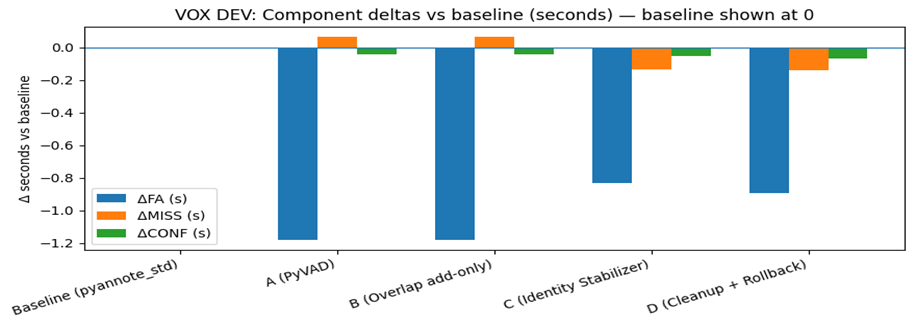

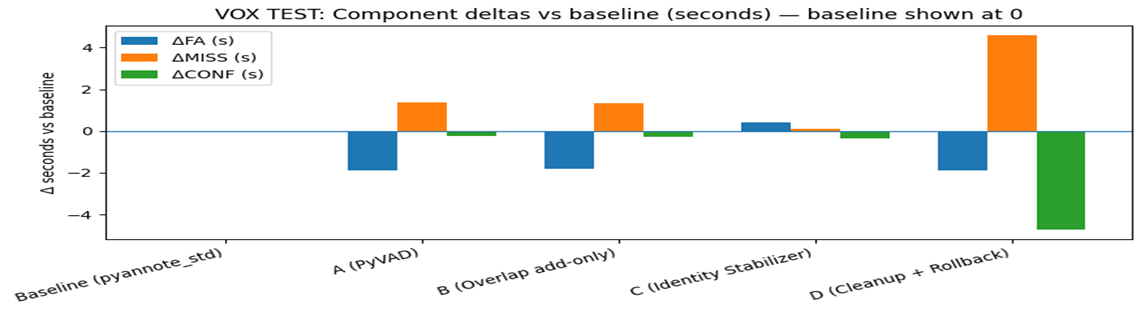

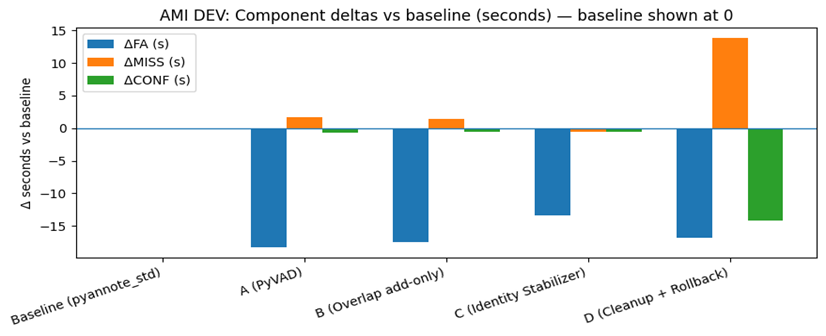

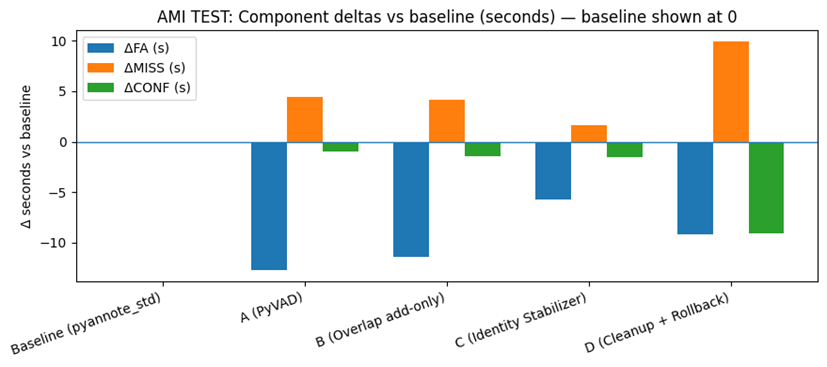


Currently Status :


- We bought down MISS and COnf on VOx Dev , which is great to see . FA can be bought down furthur .
- We Need to imrpove STage C such that we curb COnfusion , and make D less agressive .
- This will allow for improvements on Vox Test (Currently it beats beaseline,PyVAD as well).
- Also Stage D is too agressive  on AMI. As mentioend ,  with a balanced C+D approach for AMI we will get furthur gains.

Stage A = main contributor
Stage B = safe, conservative, correct
Stage C = Needs improvement⚠️
Stage D = Excellent on databases like VoxConverse on too harsh on AMI. Using same configuration for both dataset

Next stages:

- Improve Stage B Overlap gates .
- Improve FA for Stage C  especially penalty in Vertebi HMM where we penalize for short turns which might be from  genuine speakers.Ex: Bargein-short during a speech .
- Stage D is too strong on AMI. Need a balanced C+D approach for AMI .


